# Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.stats import skew
import pylab as p 
import matplotlib.cm as cm
%matplotlib inline
%pylab inline
import re
import warnings
warnings.filterwarnings('ignore')

data=pd.read_excel("C:\\Users\\mba45\\Downloads\\Preprocessed.xlsx")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
bins= [0,30,90,150,210,270,357,540,4000]
label = ['0-30','30-90','90-150','150-210','210-270','270-357','357-540','540-4000']
data['Sober1_group'] = pd.cut(data['Period of Sober1'], bins=bins, labels=label, right=False)

In [4]:
bins= [17,23,29,35,41,47,53,59,65,71]
label = ['17-23','23-29','29-35','35-41','41-47','47-53','53-59','59-65','65-71']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=label, right=False)

<Axes: xlabel='Number of relapses (based on period of treatment)', ylabel='count'>

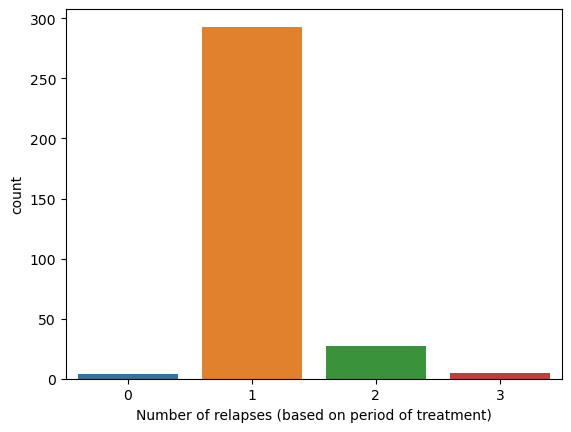

In [3]:
sns.countplot(data = data,x = 'Number of relapses (based on period of treatment)')

In [ ]:
# All patients are relapsed atleast once

<Axes: xlabel='Number of relapses (based on period of sober)', ylabel='count'>

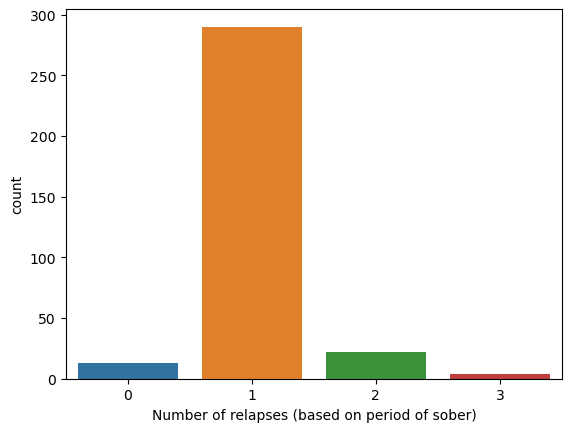

In [4]:
sns.countplot(data = data,x = 'Number of relapses (based on period of sober)')

<Axes: xlabel='Age', ylabel='avarage units used in last 30days'>

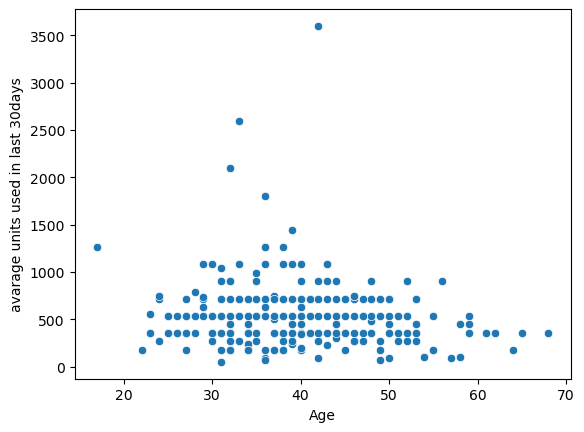

In [5]:
#sns.set(rc = {'figure.figsize':(10,5)})
sns.scatterplot(x = 'Age',y = 'avarage units used in last 30days',data = data)

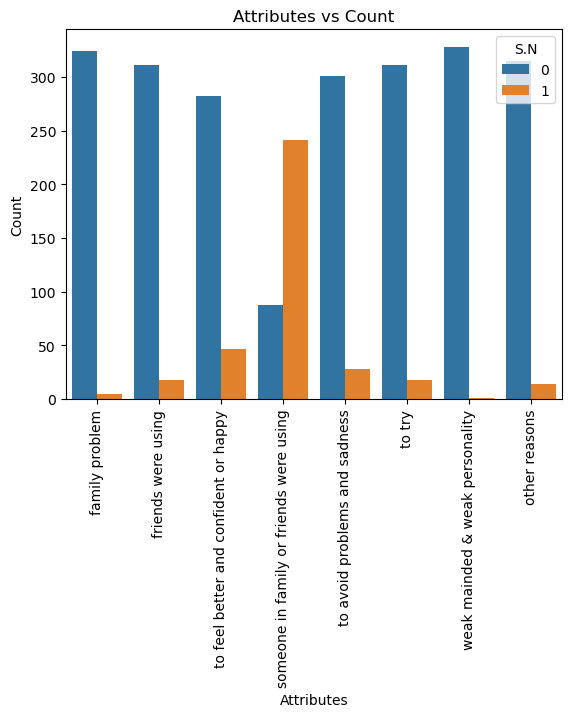

In [6]:

attributes = ['family problem','friends were using','to feel better and confident or happy','someone in family or friends were using','to avoid problems and sadness','to try','weak mainded & weak personality','other reasons'] 
count_column = 'S.N' 
df = pd.melt(data, value_vars=attributes, var_name='Attributes', value_name=count_column)

# Plotting
sns.countplot(data=df, x='Attributes', hue=count_column)
plt.ylabel('Count')
plt.title('Attributes vs Count')
plt.xticks(rotation='vertical')

plt.show()


In [ ]:
# Major reason for starting alcohol is friends were using

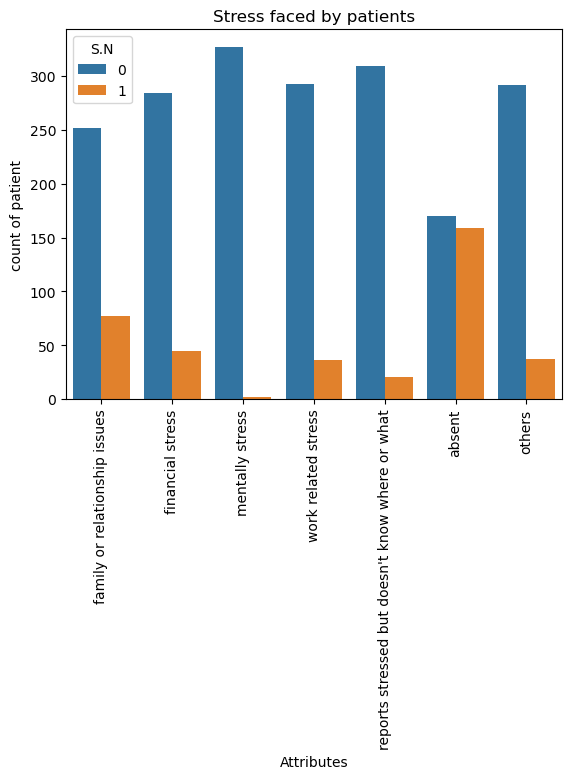

In [7]:
attributes = ['family or relationship issues','financial stress','mentally stress','work related stress',"reports stressed but doesn't know where or what",'absent','others'] 
count_column = 'S.N' 
df = pd.melt(data, value_vars=attributes, var_name='Attributes', value_name=count_column)

# Plotting
sns.countplot(data=df, x='Attributes', hue=count_column)
plt.ylabel('count of patient')
plt.title('Stress faced by patients')
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
#stressors absent

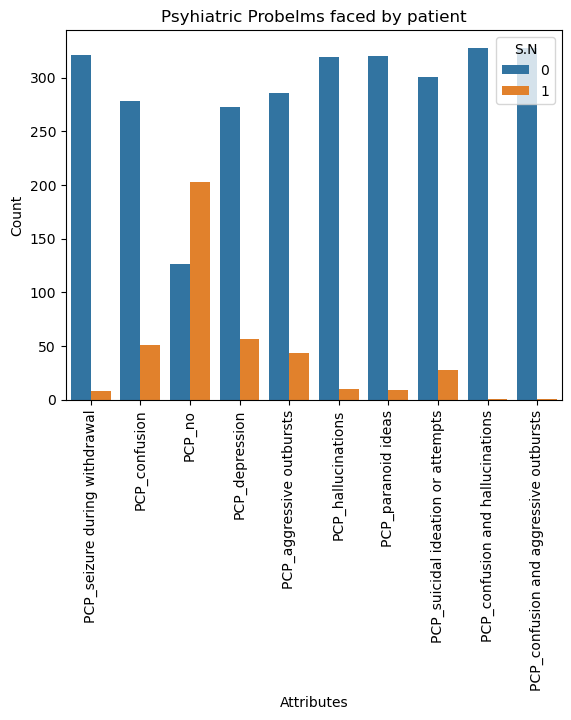

In [8]:
attributes = ['PCP_seizure during withdrawal','PCP_confusion','PCP_no','PCP_depression',"PCP_aggressive outbursts",'PCP_hallucinations','PCP_paranoid ideas','PCP_suicidal ideation or attempts','PCP_confusion and hallucinations','PCP_confusion and aggressive outbursts'] 
count_column = 'S.N' 
df = pd.melt(data, value_vars=attributes, var_name='Attributes', value_name=count_column)

# Plotting
sns.countplot(data=df, x='Attributes', hue=count_column)
plt.ylabel('Count')
plt.title('Psyhiatric Probelms faced by patient')
plt.xticks(rotation='vertical')

plt.show()

## GRAPHS


In [7]:
sns.set_style('whitegrid')

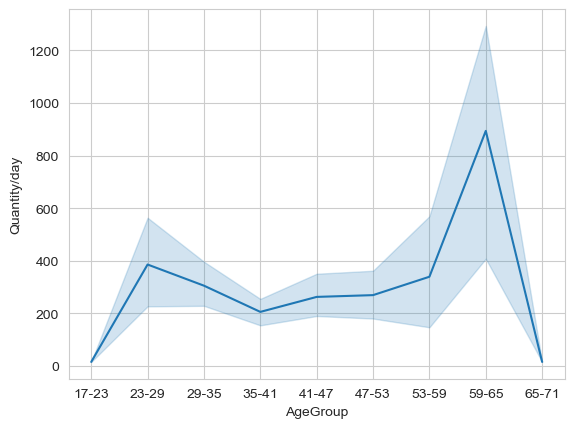

In [12]:
ax=sns.lineplot(x=data['AgeGroup'],y=data['Quantity/day'])

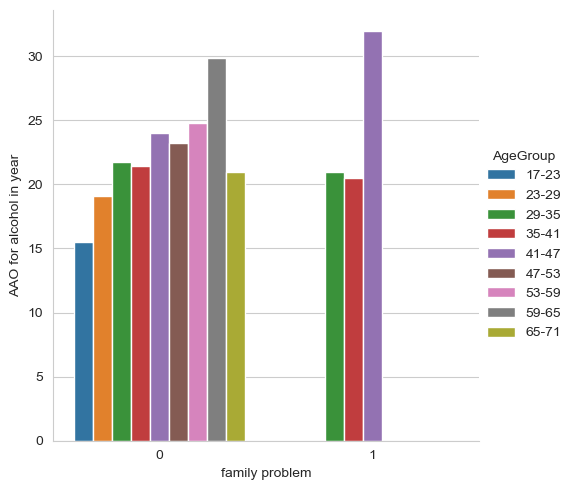

In [13]:
sns.catplot(data=data, x="family problem", y="AAO for alcohol in year", hue="AgeGroup", kind="bar",ci=None)

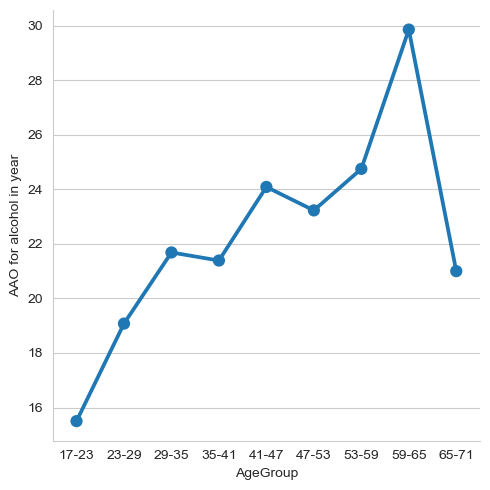

<Figure size 1000x10000 with 0 Axes>

In [14]:
sns.catplot(data=data, x="AgeGroup", y="AAO for alcohol in year",  kind="point",ci=None)
plt.figure(figsize=(10, 100))
palette={"0": "g", "1": "m"}

<Figure size 10000x25000 with 0 Axes>

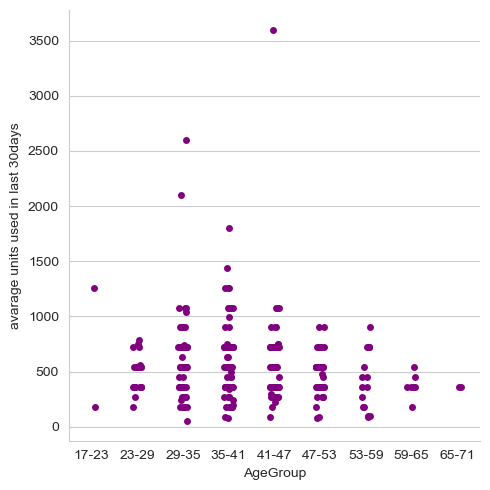

In [15]:
plt.figure(figsize=(100, 250))
sns.catplot(x = 'AgeGroup',y = 'avarage units used in last 30days',data = data, color='purple')

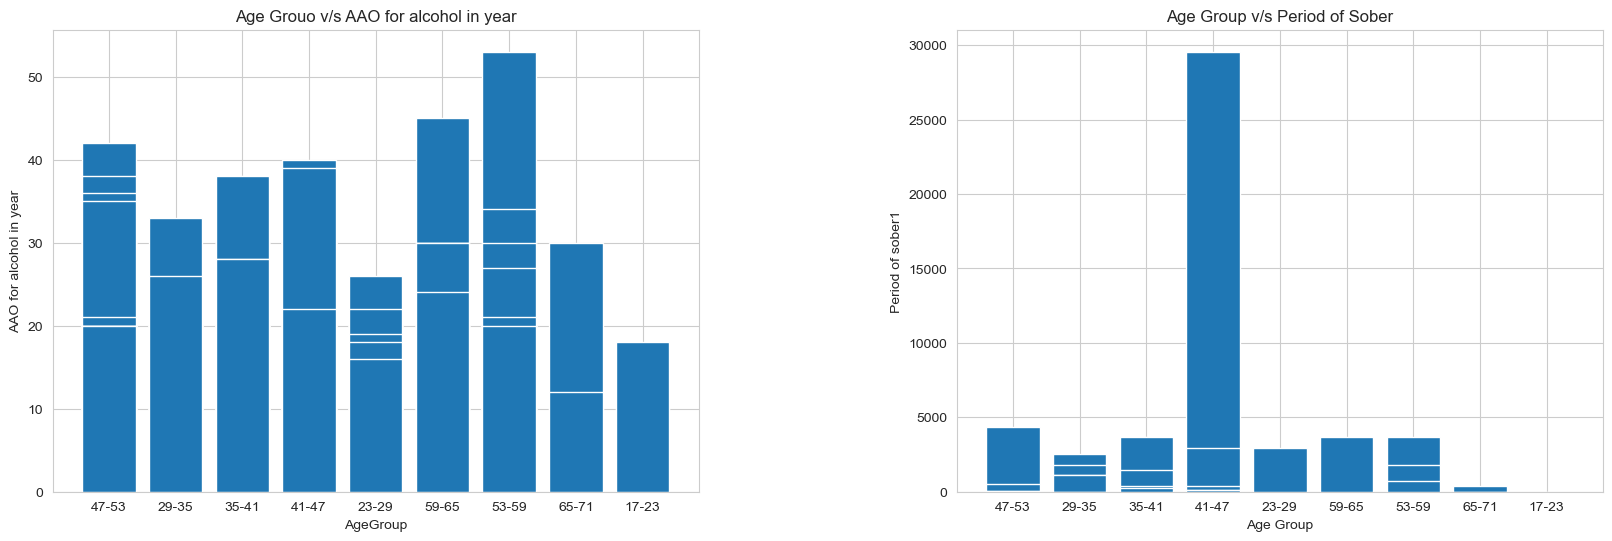

In [16]:
import matplotlib.pyplot as plt
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # Adjust the width and height as needed

bar_width=0.35

# Plotting the first graph
axs[0].bar(data['AgeGroup'],data['AAO for alcohol in year'])
axs[0].set_xlabel('AgeGroup')
axs[0].set_ylabel('AAO for alcohol in year')
axs[0].set_title('Age Grouo v/s AAO for alcohol in year')

# Plotting the second graph
axs[1].bar(data['AgeGroup'], data['Period of Sober1'])
axs[1].set_xlabel('Age Group')
axs[1].set_ylabel('Period of sober1')
axs[1].set_title('Age Group v/s Period of Sober')



# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)  # Adjust the spacing as needed

# Show the plot
plt.show()


Text(0, 0.5, 'Number of Relapse')

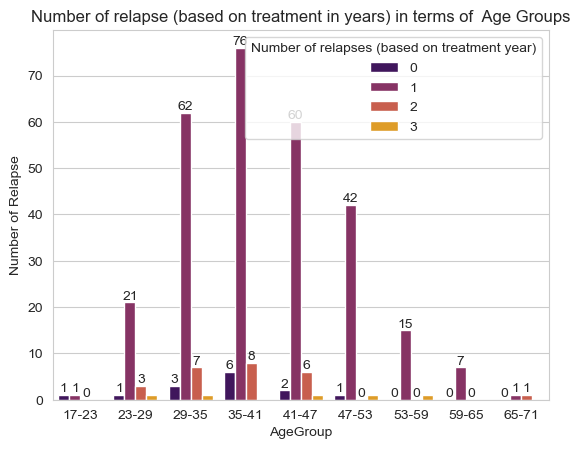

In [17]:

a=sns.countplot(x = 'AgeGroup',hue = 'Number of relapses (based on treatment year)', data = data, palette='inferno')
a.set(title = 'Number of relapse (based on treatment in years) in terms of  Age Groups')
a.bar_label(a.containers[0],size=10)
a.bar_label(a.containers[1],size=10)
a.bar_label(a.containers[2],size=10)
plt.ylabel('Number of Relapse')
#plt.figure(figsize(10,6))


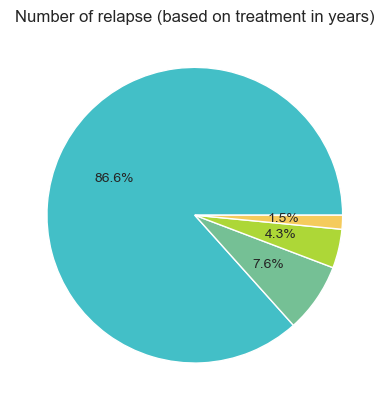

In [18]:
import matplotlib.pyplot as plt

# Define custom colors
colours = ['#43BFC7', '#75C095', '#ADD737', '#F5CB5C', '#FFA11C']

# Get the value counts for the column
value_counts = data['Number of relapses (based on treatment year)'].value_counts()
v=[0,1,2,3]

# Create a pie chart with the custom color palette
plt.pie(value_counts, autopct='%1.1f%%', colors=colours)

# Set the title
plt.title('Number of relapse (based on treatment in years)')

# Display the chart
plt.show()


Text(0, 0.5, 'Number of Relapse')

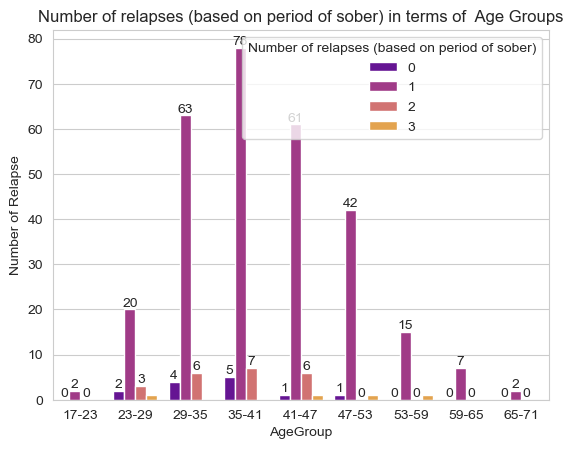

In [19]:
a=sns.countplot(x = 'AgeGroup',hue = 'Number of relapses (based on period of sober)', data = data, palette='plasma')
a.set(title = 'Number of relapses (based on period of sober) in terms of  Age Groups')
a.bar_label(a.containers[0],size=10)
a.bar_label(a.containers[1],size=10)
a.bar_label(a.containers[2],size=10)
plt.ylabel('Number of Relapse')
#plt.figure(figsize(10,6))

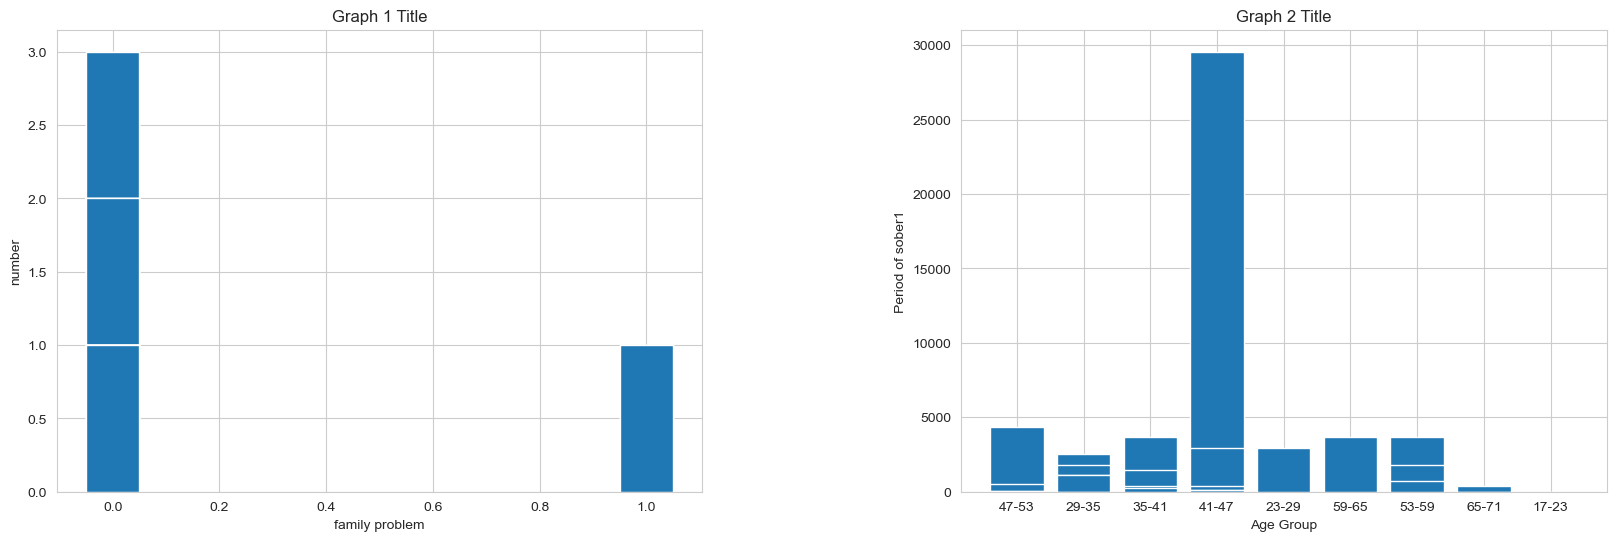

In [20]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # Adjust the width and height as needed

bar_width=0.1

# Plotting the first graph
axs[0].bar(data['family problem'],data['Number of relapses (based on treatment year)'], width=bar_width)
axs[0].set_xlabel('family problem')
axs[0].set_ylabel('number')
axs[0].set_title('Graph 1 Title')

# Plotting the second graph
axs[1].bar(data['AgeGroup'], data['Period of Sober1'])
axs[1].set_xlabel('Age Group')
axs[1].set_ylabel('Period of sober1')
axs[1].set_title('Graph 2 Title')



# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)  # Adjust the spacing as needed

# Show the plot
plt.show()


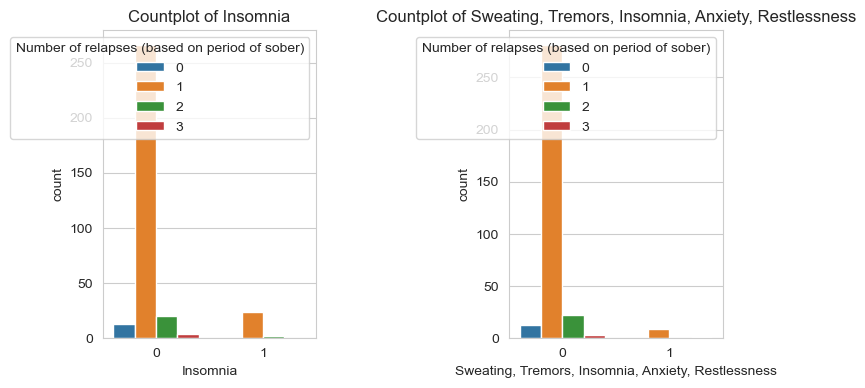

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a list of variables or column names
variables = ['Insomnia','Sweating, Tremors, Insomnia, Anxiety, Restlessness']

# Create subplots for each variable
fig, axs = plt.subplots(nrows=1, ncols=len(variables), figsize=(8,4))

# Iterate over variables and create countplots
for i, variable in enumerate(variables):
    sns.countplot(x=variable,hue = 'Number of relapses (based on period of sober)', data=data, ax=axs[i])
    axs[i].set_title(f'Countplot of {variable}')
    axs[i].set_xlabel(variable)
    

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.9, hspace=0.4)  

# Show the plot
plt.show()


IndexError: index 10 is out of bounds for axis 0 with size 10

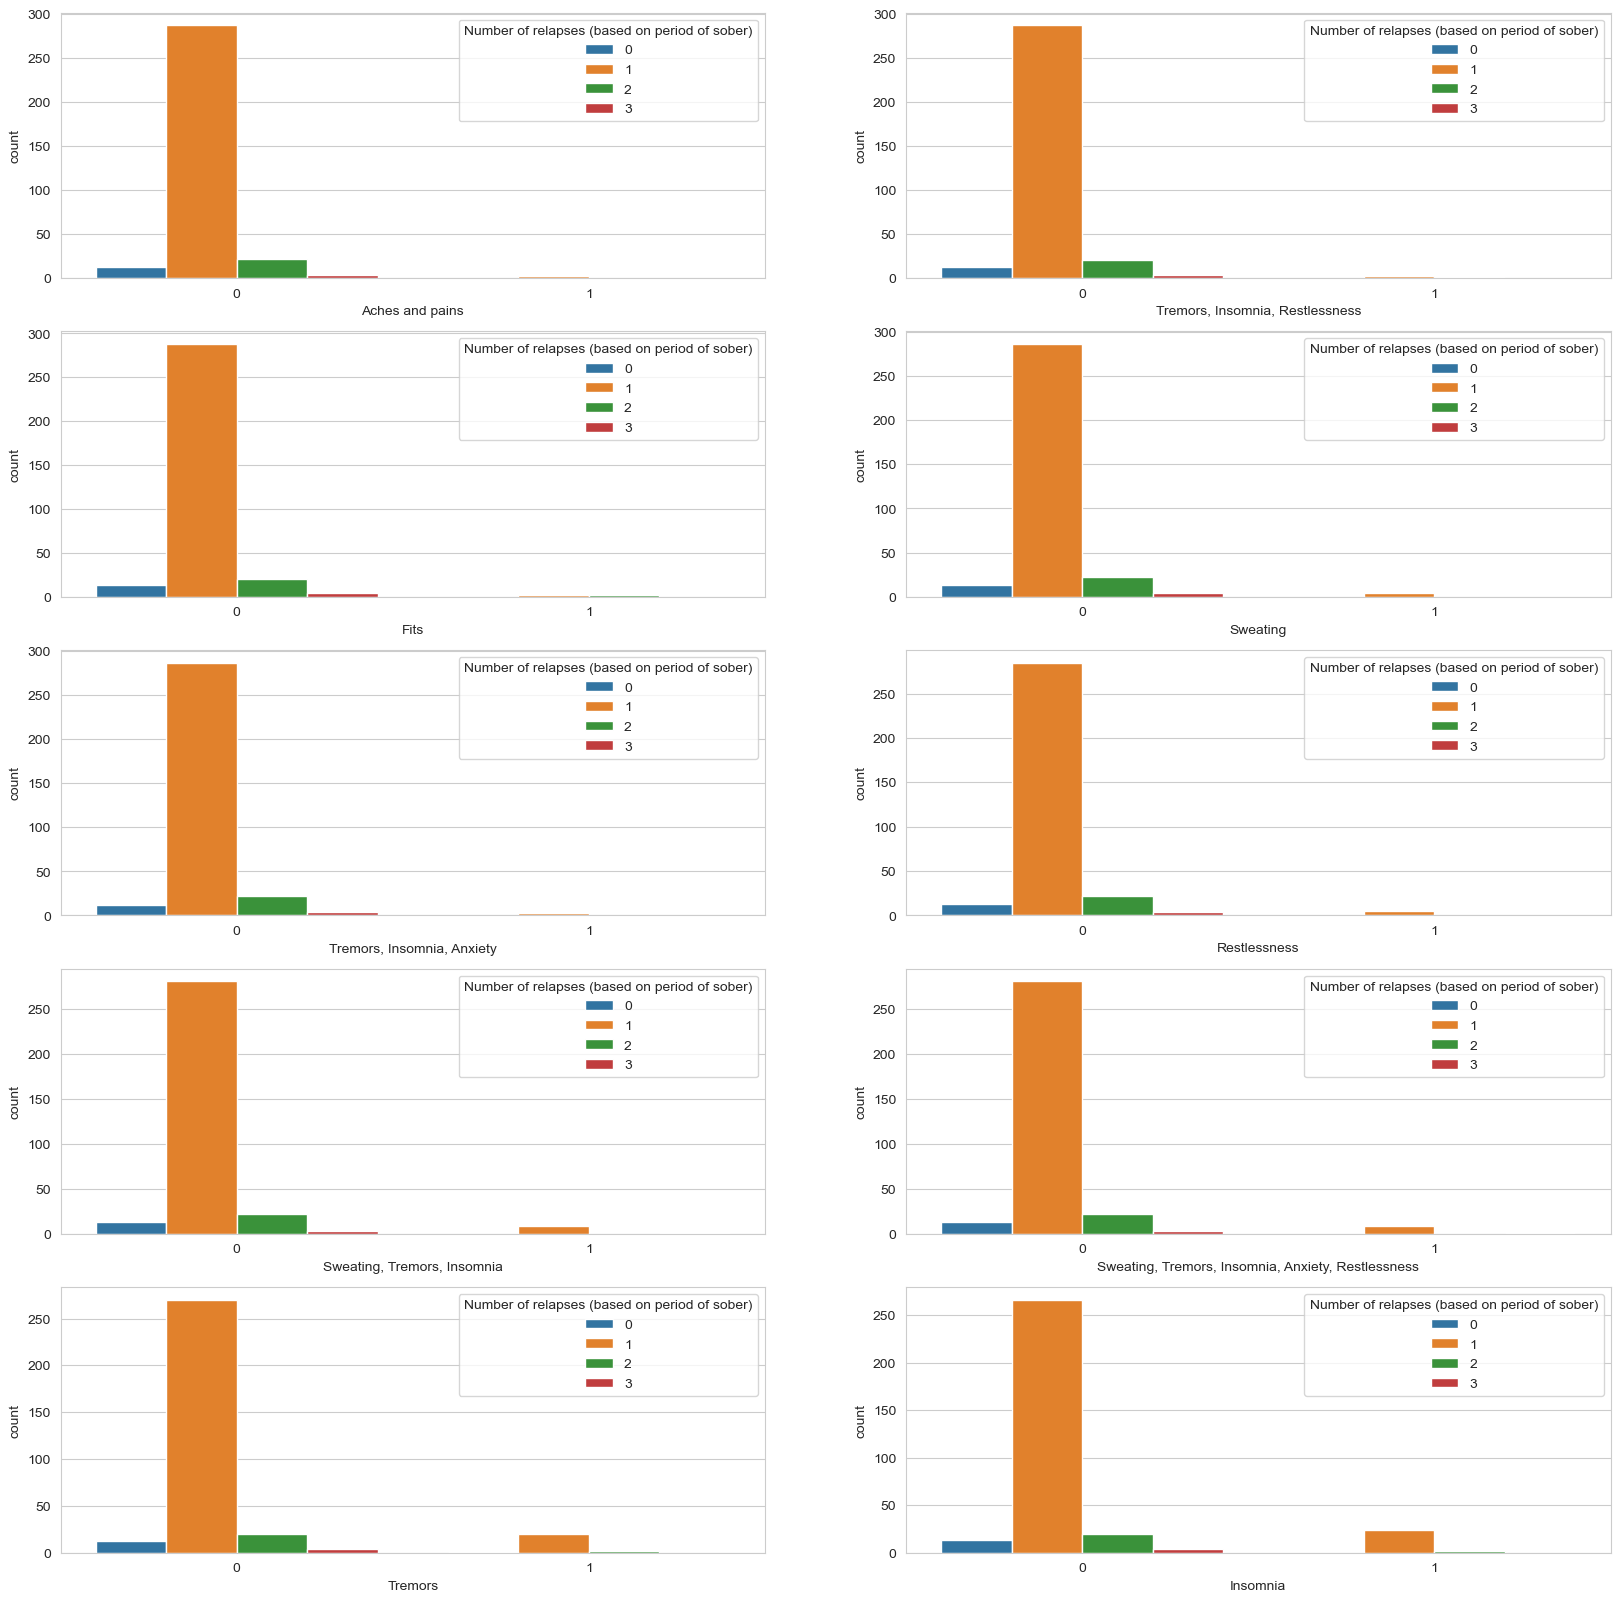

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a list of variables or column names
variables = ['Aches and pains','Tremors, Insomnia, Restlessness','Fits','Sweating','Tremors, Insomnia, Anxiety','Restlessness','Sweating, Tremors, Insomnia','Sweating, Tremors, Insomnia, Anxiety, Restlessness','Tremors','Insomnia','Tremors, Insomnia']

# Calculate the number of rows and columns for the subplots
num_rows = 5
num_cols = 2

# Create subplots for the variables
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))


# Flatten the axs array for easier indexing
axs = axs.flatten()

# Iterate over variables and create countplots
for i, variable in enumerate(variables):
    sns.countplot(x=variable,hue = 'Number of relapses (based on period of sober)', data=data, ax=axs[i])
    #axs[i].set_title(f'Countplot of {variable}')
    axs[i].set_xlabel(variable)
    #ax.bar_label(ax.containers[0],size=10)
    #ax.bar_label(ax.containers[1],size=10)

# Remove any unused subplots
if len(variables) < num_rows * num_cols:
    for j in range(len(variables), num_rows * num_cols):
        fig.delaxes(axs[j])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=3)  

# Show the plot
plt.show()


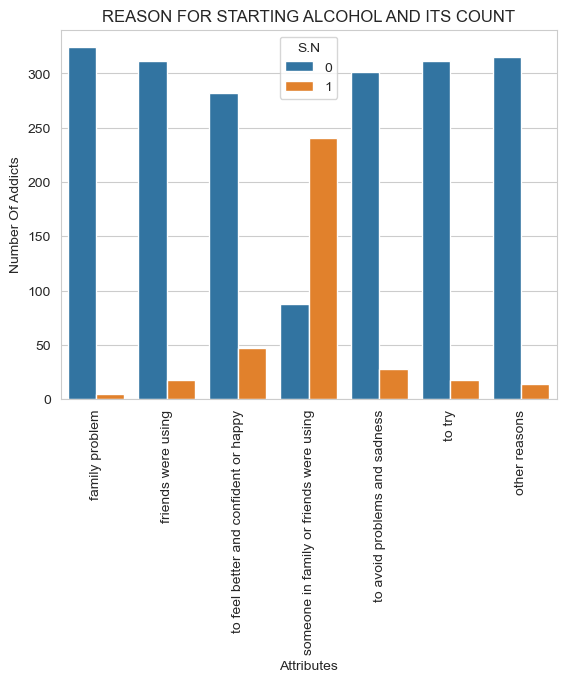

In [23]:

attributes = ['family problem','friends were using','to feel better and confident or happy','someone in family or friends were using','to avoid problems and sadness','to try','other reasons'] 
count_column = 'S.N' 
df = pd.melt(data, value_vars=attributes, var_name='Attributes', value_name=count_column)

# Plotting
sns.countplot(data=df, x='Attributes', hue=count_column)
plt.ylabel('Number Of Addicts')
plt.title('REASON FOR STARTING ALCOHOL AND ITS COUNT')
plt.xticks(rotation='vertical')
#plt.figure(figsize=(1,5))

plt.show()

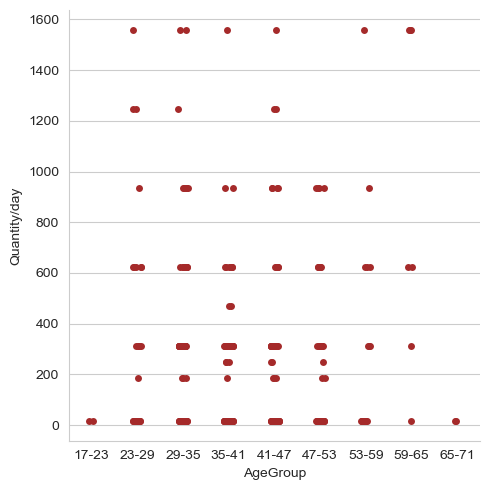

In [24]:
#plt.figure(figsize=(0.3, 0.4))
sns.catplot(x = 'AgeGroup',y = 'Quantity/day',data = data, color='brown')

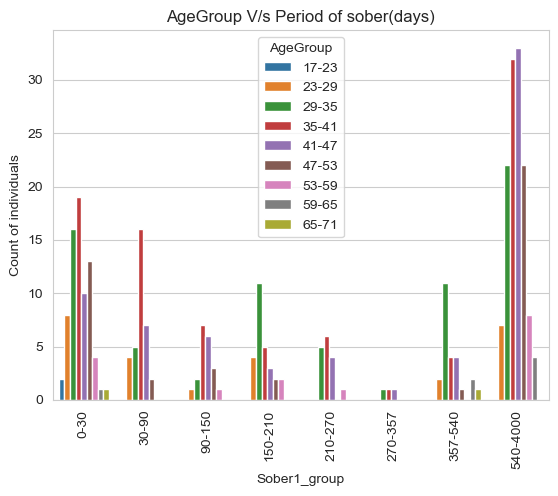

In [25]:
# Plotting
sns.countplot(data=data, hue='AgeGroup', x='Sober1_group')
plt.ylabel('Count of individuals')
plt.title('AgeGroup V/s Period of sober(days)')
plt.xticks(rotation='vertical')
#plt.figure(figsize=(100,200))

plt.show()

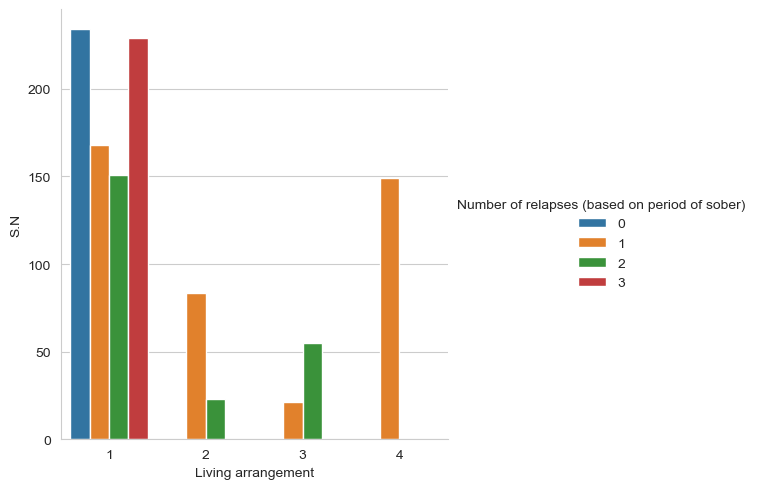

In [26]:
sns.catplot(data=data, x='Living arrangement', y='S.N', hue='Number of relapses (based on period of sober)', kind='bar',ci=None)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '0-30'),
  Text(1, 0, '30-90'),
  Text(2, 0, '90-150'),
  Text(3, 0, '150-210'),
  Text(4, 0, '210-270'),
  Text(5, 0, '270-357'),
  Text(6, 0, '357-540'),
  Text(7, 0, '540-4000')])

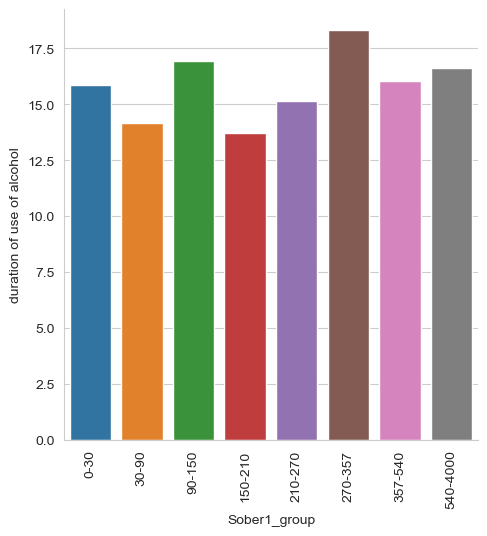

In [27]:
sns.catplot(data=data, y='duration of use of alcohol', x='Sober1_group', kind="bar", ci=None)
plt.xticks(rotation=90)

### 1: family    2:relative  3:friend   4:Single


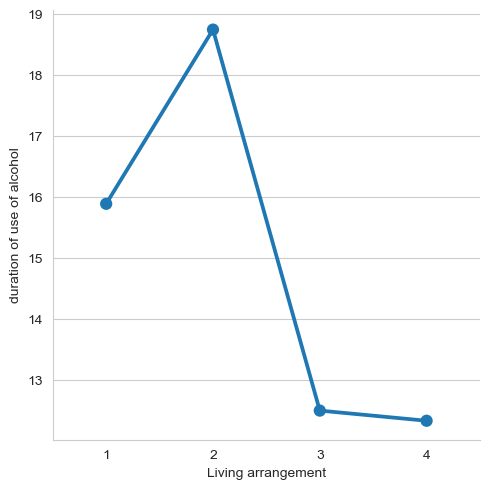

In [28]:
sns.catplot(data=data, y='duration of use of alcohol', x='Living arrangement', kind='point',  ci=None)


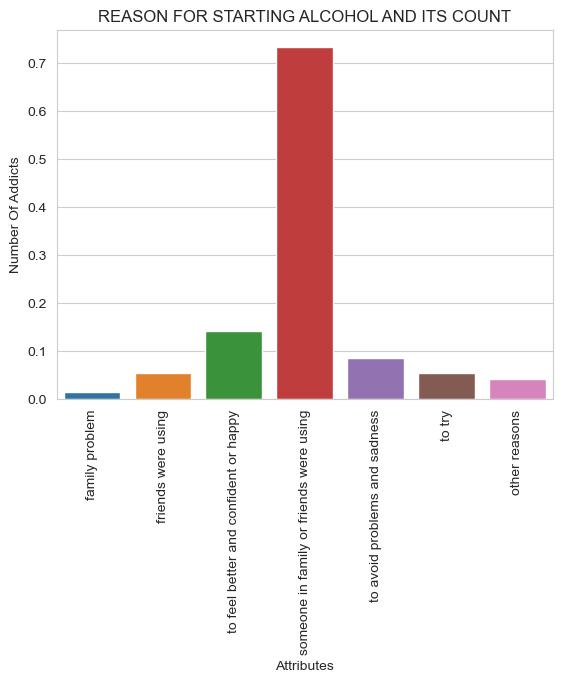

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

attributes = ['family problem', 'friends were using', 'to feel better and confident or happy', 'someone in family or friends were using', 'to avoid problems and sadness', 'to try', 'other reasons']
count_column = 'Sober1_group'
df = pd.melt(data, value_vars=attributes, var_name='Attributes', value_name=count_column)

# Plotting
sns.barplot(data=df, x='Attributes', y=count_column, ci=None)
plt.xlabel('Attributes')
plt.ylabel('Number Of Addicts')
plt.title('REASON FOR STARTING ALCOHOL AND ITS COUNT')
plt.xticks(rotation='vertical')

plt.show()

IndexError: index 10 is out of bounds for axis 0 with size 10

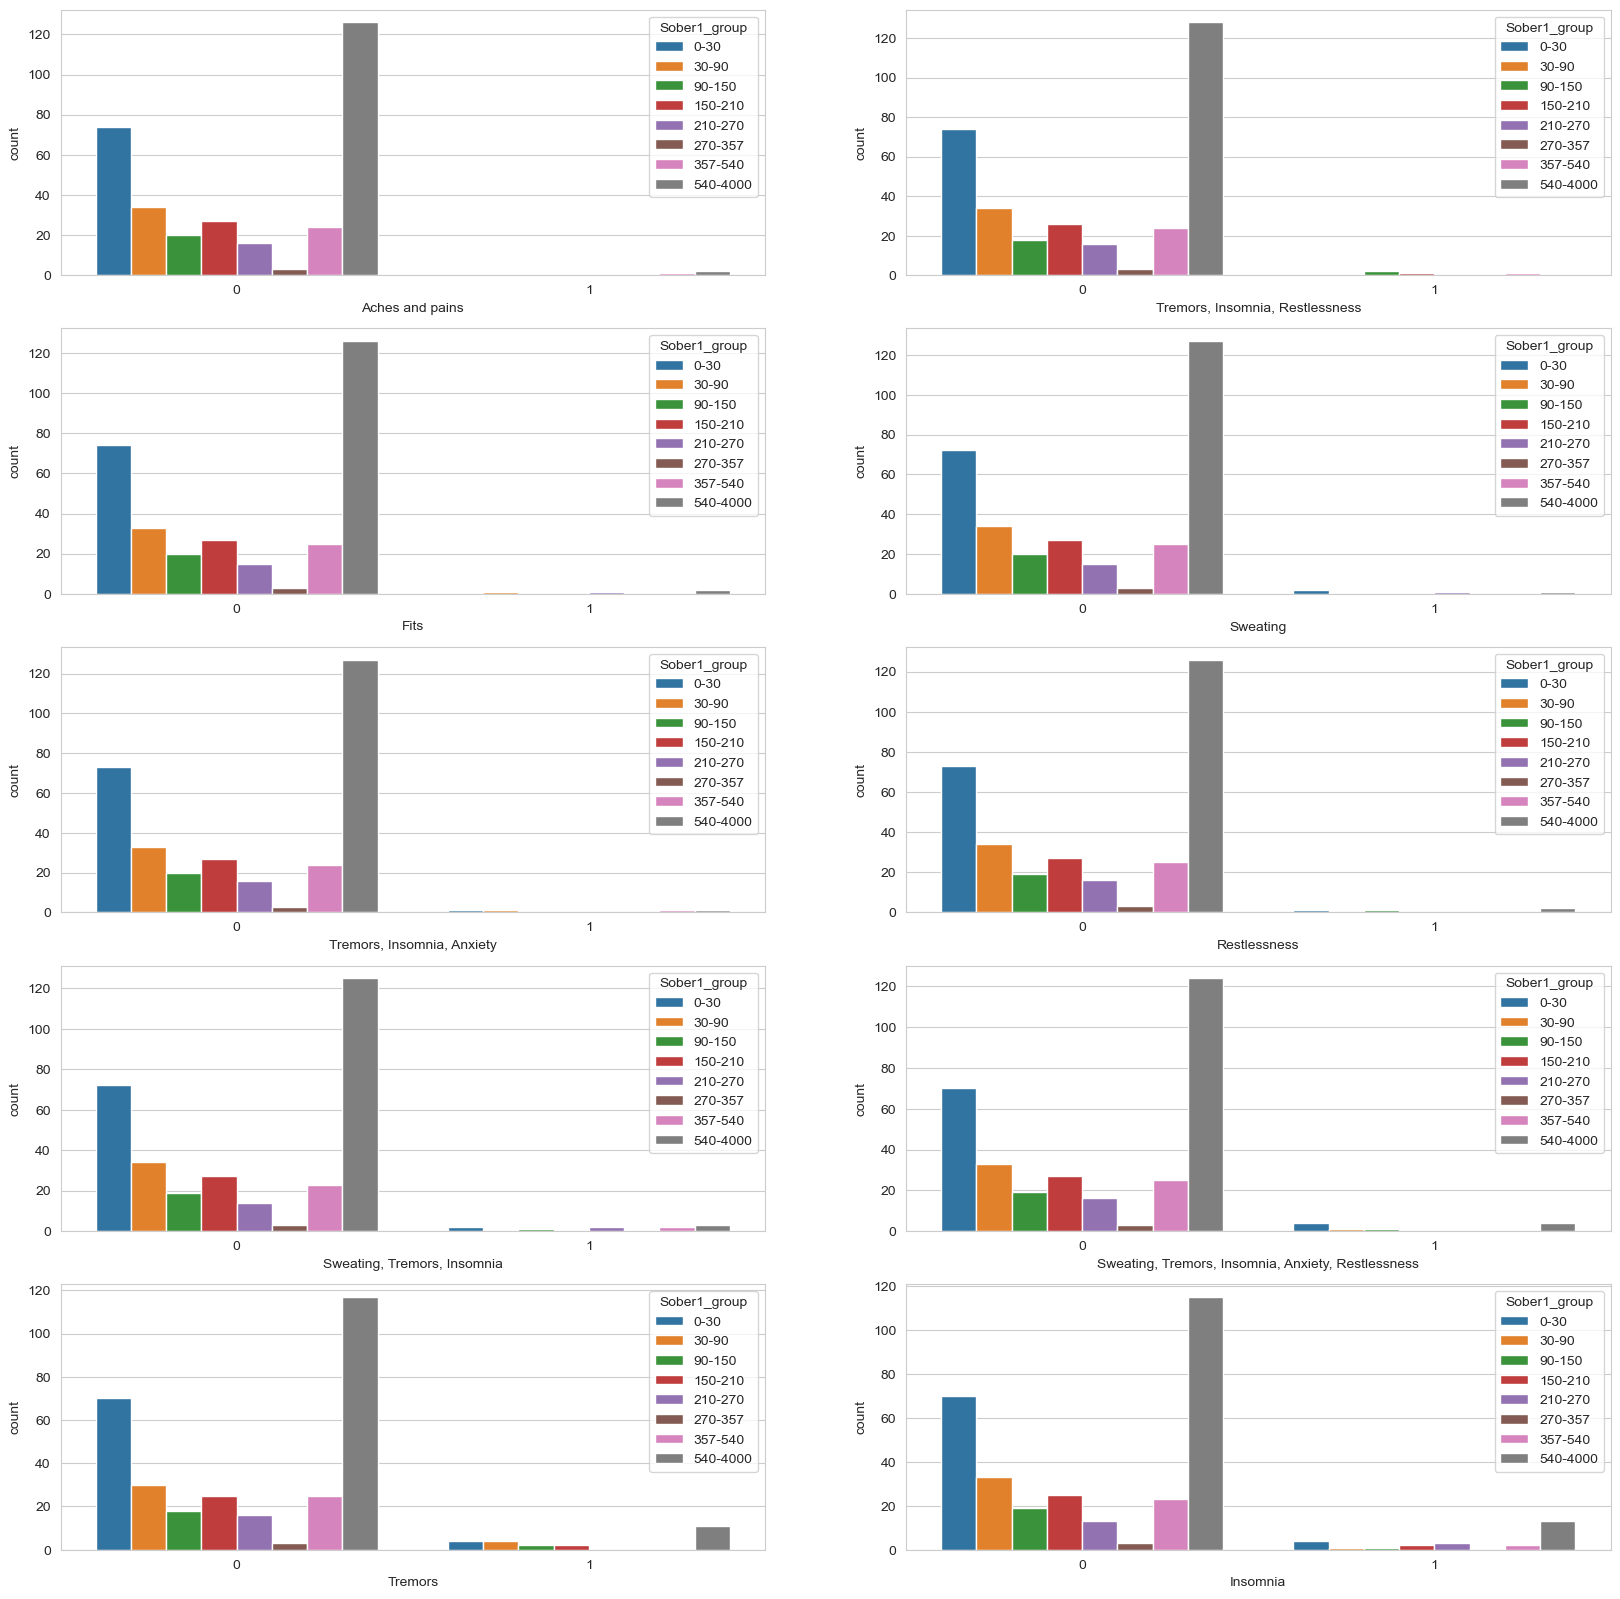

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a list of variables or column names
variables = ['Aches and pains','Tremors, Insomnia, Restlessness','Fits','Sweating','Tremors, Insomnia, Anxiety','Restlessness','Sweating, Tremors, Insomnia','Sweating, Tremors, Insomnia, Anxiety, Restlessness','Tremors','Insomnia','Tremors, Insomnia']

# Calculate the number of rows and columns for the subplots
num_rows = 5
num_cols = 2

# Create subplots for the variables
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))


# Flatten the axs array for easier indexing
axs = axs.flatten()

# Iterate over variables and create countplots
for i, variable in enumerate(variables):
    sns.countplot(x=variable,hue = 'Sober1_group', data=data, ax=axs[i])
    #axs[i].set_title(f'Countplot of {variable}')
    axs[i].set_xlabel(variable)
    #ax.bar_label(ax.containers[0],size=10)
    #ax.bar_label(ax.containers[1],size=10)

# Remove any unused subplots
if len(variables) < num_rows * num_cols:
    for j in range(len(variables), num_rows * num_cols):
        fig.delaxes(axs[j])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=3)  

# Show the plot
plt.show()


IndexError: index 10 is out of bounds for axis 0 with size 10

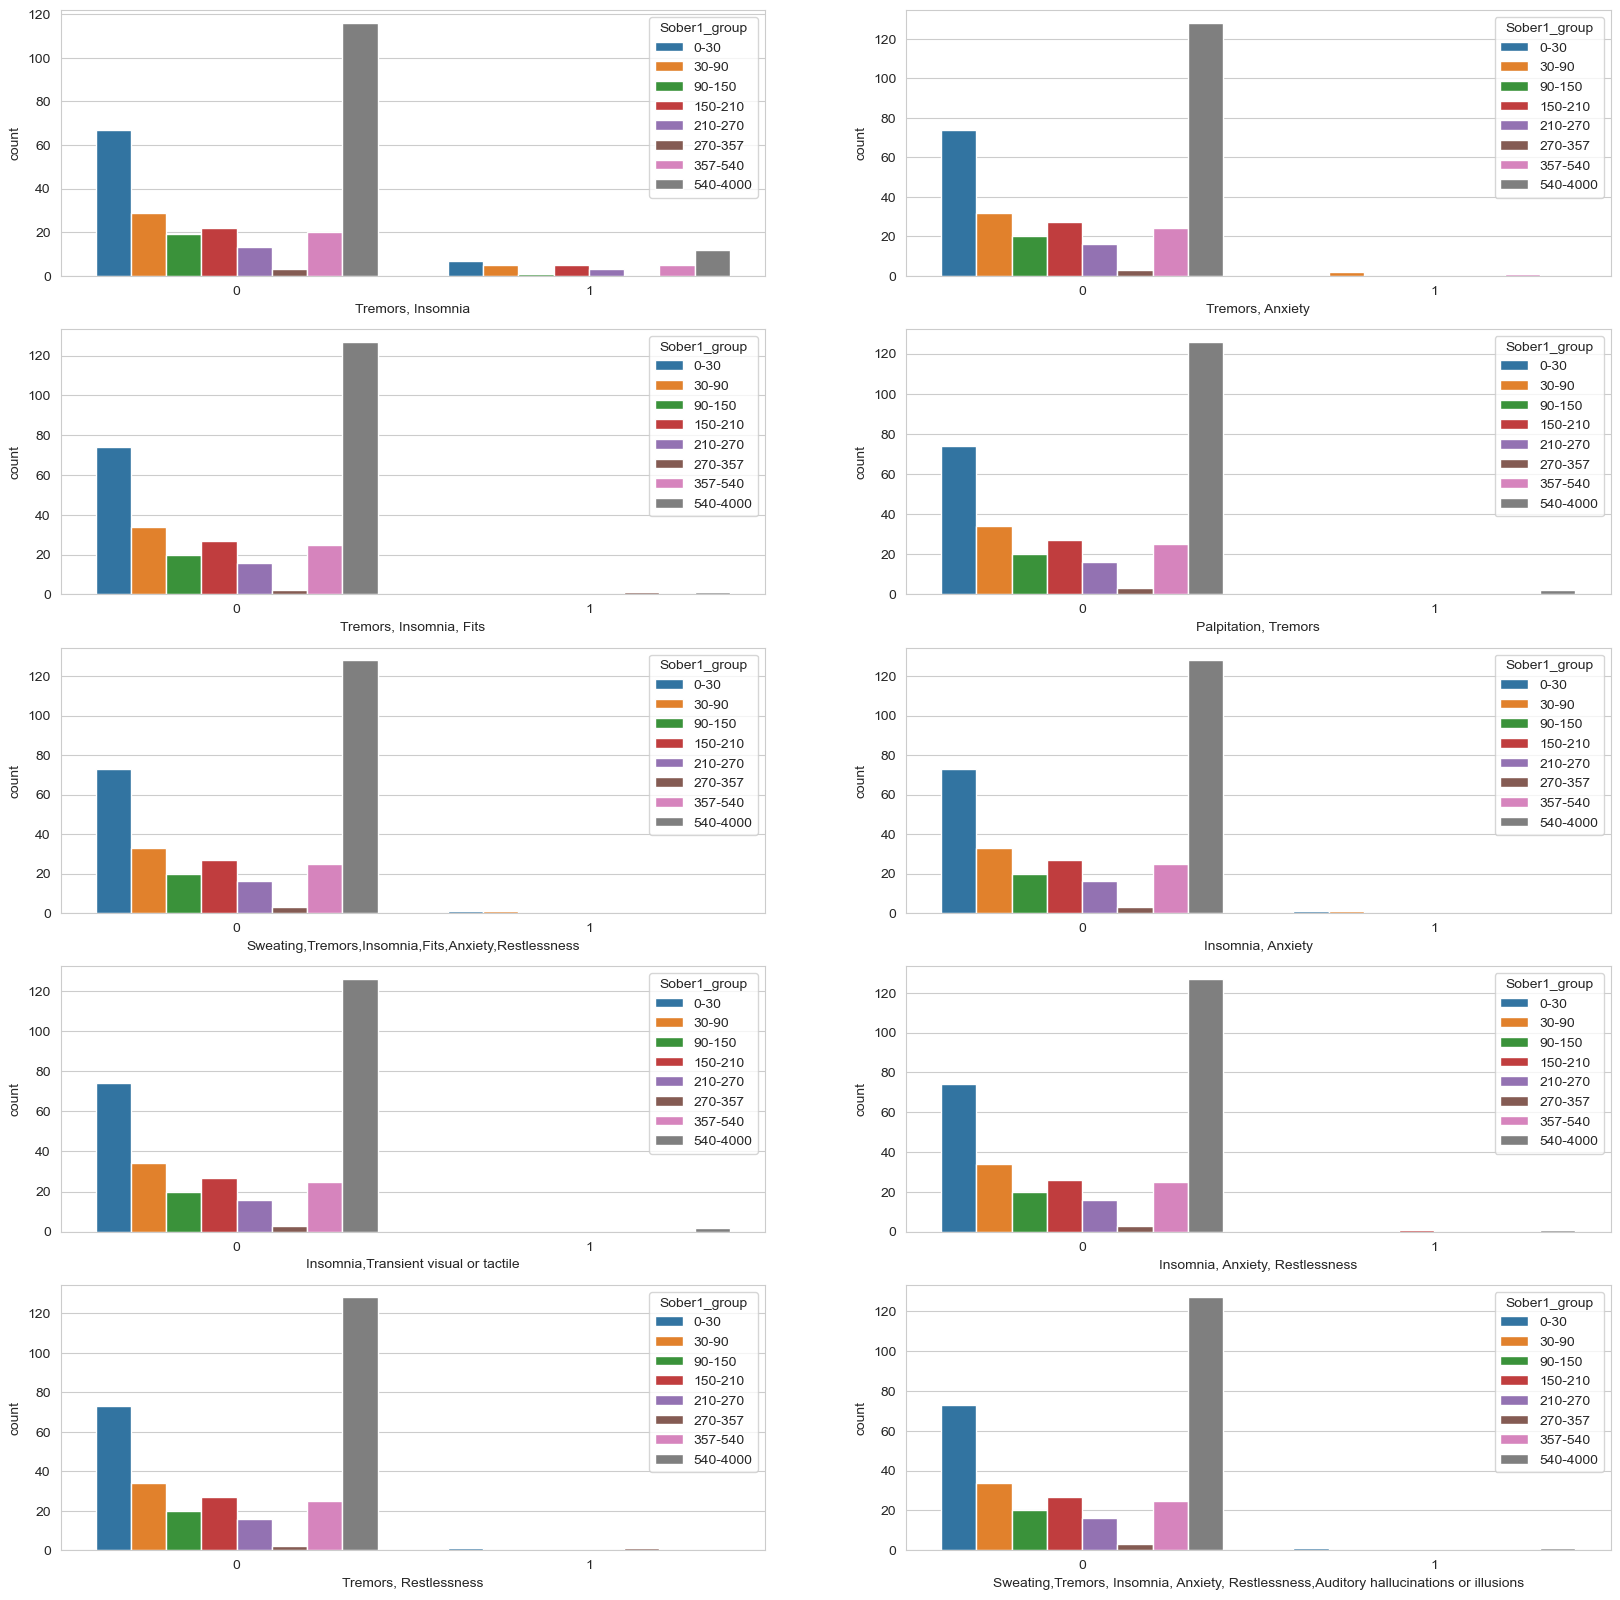

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a list of variables or column names
variables = ['Tremors, Insomnia','Tremors, Anxiety','Tremors, Insomnia, Fits','Palpitation, Tremors','Sweating,Tremors,Insomnia,Fits,Anxiety,Restlessness','Insomnia, Anxiety','Insomnia,Transient visual or tactile','Insomnia, Anxiety, Restlessness','Tremors, Restlessness','Sweating,Tremors, Insomnia, Anxiety, Restlessness,Auditory hallucinations or illusions','Tremors, Insomnia']

# Calculate the number of rows and columns for the subplots
num_rows = 5
num_cols = 2

# Create subplots for the variables
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))


# Flatten the axs array for easier indexing
axs = axs.flatten()

# Iterate over variables and create countplots
for i, variable in enumerate(variables):
    sns.countplot(x=variable,hue = 'Sober1_group', data=data, ax=axs[i])
    #axs[i].set_title(f'Countplot of {variable}')
    axs[i].set_xlabel(variable)
    #ax.bar_label(ax.containers[0],size=10)
    #ax.bar_label(ax.containers[1],size=10)

# Remove any unused subplots
if len(variables) < num_rows * num_cols:
    for j in range(len(variables), num_rows * num_cols):
        fig.delaxes(axs[j])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=3)  

# Show the plot
plt.show()


In [32]:
TI=0
for index, row in data.iterrows():
    if row['Tremors, Insomnia'] == 1 and row['Sober1_group'] == '0-30':
        TI += 1

print(TI)


TA=0
for index, row in data.iterrows():
    if row['Sweating,Tremors,Insomnia,Fits,Anxiety,Restlessness'] == 1 and row['Sober1_group'] == '0-30':
        TA += 1
print(TA)


IA=0
for index, row in data.iterrows():
    if row['Insomnia, Anxiety'] == 1 and row['Sober1_group'] == '0-30':
        IA += 1

print(IA)


TR=0
for index, row in data.iterrows():
    if row['Tremors, Restlessness'] == 1 and row['Sober1_group'] == '0-30':
        TR += 1

print(TR)



s=0
for index, row in data.iterrows():
    if row['Sweating'] == 1 and row['Sober1_group'] == '0-30':
        s += 1

print(s)



STI=0
x = 0
for index, row in data.iterrows():
    if row['Sweating, Tremors, Insomnia'] == 1 and row['Sober1_group'] == '0-30':
        STI=STI+1
print(STI)


STIAR=0
x = 0
for index, row in data.iterrows():
    if row['Sweating, Tremors, Insomnia, Anxiety, Restlessness'] == 1 and row['Sober1_group'] == '0-30':
        STIAR=STIAR+1
print(STIAR)


T=0
x = 0
for index, row in data.iterrows():
    if row['Tremors'] == 1 and row['Sober1_group'] == '0-30':
         T=T+1
print(T)

I=0
for index, row in data.iterrows():
    if row['Insomnia'] == 1 and row['Sober1_group'] == '0-30':
        I += 1

print(I)



r=0
for index, row in data.iterrows():
    if row['Restlessness'] == 1 and row['Sober1_group'] == '0-30':
        r += 1

print(r)

7
1
1
1
2
2
4
4
4
1


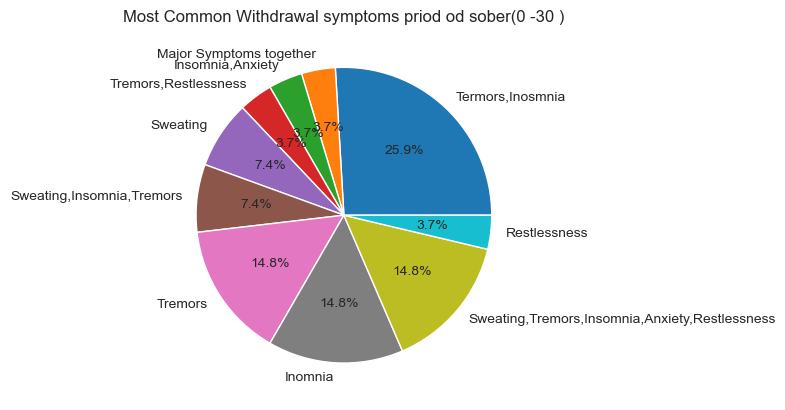

In [33]:
import matplotlib.pyplot as plt

values = [TI, TA, IA, TR, s, STI, T, I, STIAR, r]  # Replace with your variable values
labels = ['Termors,Inosmnia', 'Major Symptoms together', 'Insomnia,Anxiety', 'Tremors,Restlessness','Sweating','Sweating,Insomnia,Tremors', 'Tremors', 'Inomnia', 'Sweating,Tremors,Insomnia,Anxiety,Restlessness', 'Restlessness']

plt.pie(values, labels=labels, autopct='%1.1f%%')

# Set the title
plt.title('Most Common Withdrawal symptoms priod od sober(0 -30 )')

# Display the chart
plt.show()


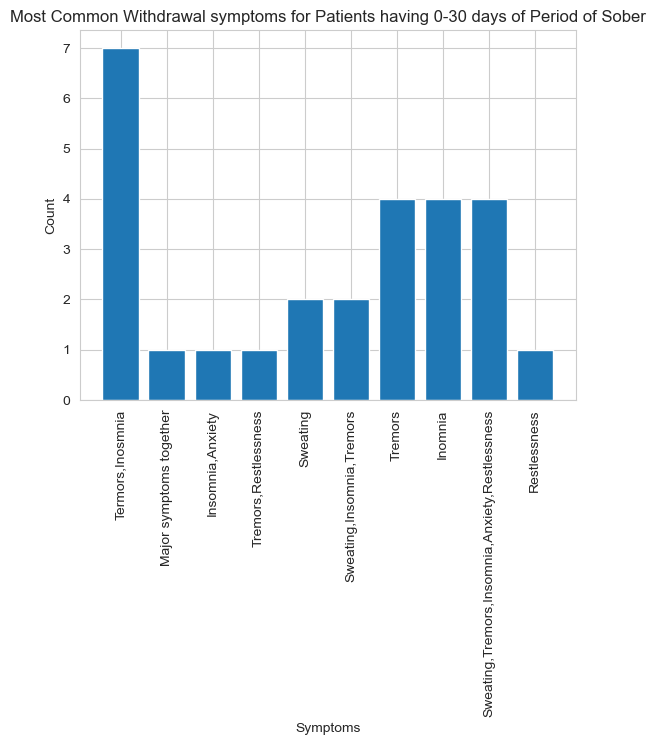

In [34]:
import matplotlib.pyplot as plt

values = [TI, TA, IA, TR, s, STI, T, I, STIAR, r]  # Replace with your variable values
labels = ['Termors,Inosmnia', 'Major symptoms together', 'Insomnia,Anxiety', 'Tremors,Restlessness','Sweating','Sweating,Insomnia,Tremors', 'Tremors', 'Inomnia', 'Sweating,Tremors,Insomnia,Anxiety,Restlessness', 'Restlessness']
# Create a bar graph
plt.bar(labels, values)

# Set the title and axis labels
plt.title('Most Common Withdrawal symptoms for Patients having 0-30 days of Period of Sober')
plt.xlabel('Symptoms')
plt.ylabel('Count')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the graph
plt.show()

In [5]:
TI=0
for index, row in data.iterrows():
    if row['Tremors, Insomnia'] == 1 and row['Sober1_group'] == '30-90':
        TI += 1

print(TI)


TA=0
for index, row in data.iterrows():
    if row['Sweating,Tremors,Insomnia,Fits,Anxiety,Restlessness'] == 1 and row['Sober1_group'] == '30-90':
        TA += 1
print(TA)


IA=0
for index, row in data.iterrows():
    if row['Insomnia, Anxiety'] == 1 and row['Sober1_group'] == '30-90':
        IA += 1

print(IA)


TR=0
for index, row in data.iterrows():
    if row['Tremors, Restlessness'] == 1 and row['Sober1_group'] == '30-90':
        TR += 1

print(TR)



s=0
for index, row in data.iterrows():
    if row['Sweating'] == 1 and row['Sober1_group'] == '30-90':
        s += 1

print(s)



STI=0
x = 0
for index, row in data.iterrows():
    if row['Sweating, Tremors, Insomnia'] == 1 and row['Sober1_group'] == '30-90':
        STI=STI+1
print(STI)


STIAR=0
x = 0
for index, row in data.iterrows():
    if row['Sweating, Tremors, Insomnia, Anxiety, Restlessness'] == 1 and row['Sober1_group'] == '30-90':
        STIAR=STIAR+1
print(STIAR)


T=0
x = 0
for index, row in data.iterrows():
    if row['Tremors'] == 1 and row['Sober1_group'] == '30-90':
         T=T+1
print(T)

I=0
for index, row in data.iterrows():
    if row['Insomnia'] == 1 and row['Sober1_group'] == '30-90':
        I += 1

print(I)



r=0
for index, row in data.iterrows():
    if row['Restlessness'] == 1 and row['Sober1_group'] == '30-90':
        r += 1

print(r)

5
1
1
0
0
0
1
4
1
0


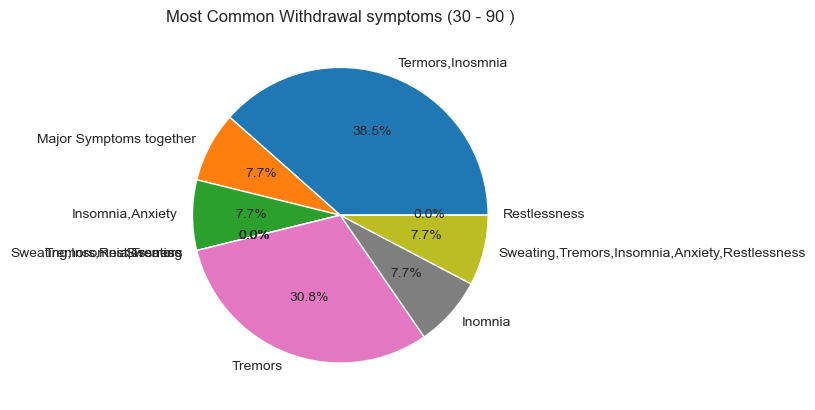

In [8]:
import matplotlib.pyplot as plt

values = [TI, TA, IA, TR, s, STI, T, I, STIAR, r]  # Replace with your variable values
labels = ['Termors,Inosmnia', 'Major Symptoms together', 'Insomnia,Anxiety', 'Tremors,Restlessness','Sweating','Sweating,Insomnia,Tremors', 'Tremors', 'Inomnia', 'Sweating,Tremors,Insomnia,Anxiety,Restlessness', 'Restlessness']

plt.pie(values, labels=labels, autopct='%1.1f%%')

# Set the title
plt.title('Most Common Withdrawal symptoms (30 - 90 )')

# Display the chart
plt.show()


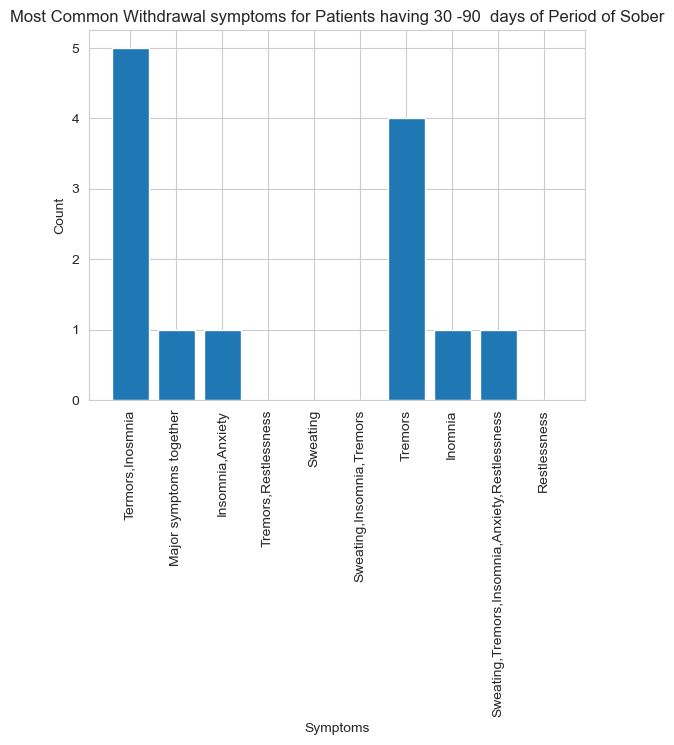

In [9]:
import matplotlib.pyplot as plt

values = [TI, TA, IA, TR, s, STI, T, I, STIAR, r]  # Replace with your variable values
labels = ['Termors,Inosmnia', 'Major symptoms together', 'Insomnia,Anxiety', 'Tremors,Restlessness','Sweating','Sweating,Insomnia,Tremors', 'Tremors', 'Inomnia', 'Sweating,Tremors,Insomnia,Anxiety,Restlessness', 'Restlessness']
# Create a bar graph
plt.bar(labels, values)

# Set the title and axis labels
plt.title('Most Common Withdrawal symptoms for Patients having 30 -90  days of Period of Sober')
plt.xlabel('Symptoms')
plt.ylabel('Count')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the graph
plt.show()


IndexError: index 10 is out of bounds for axis 0 with size 10

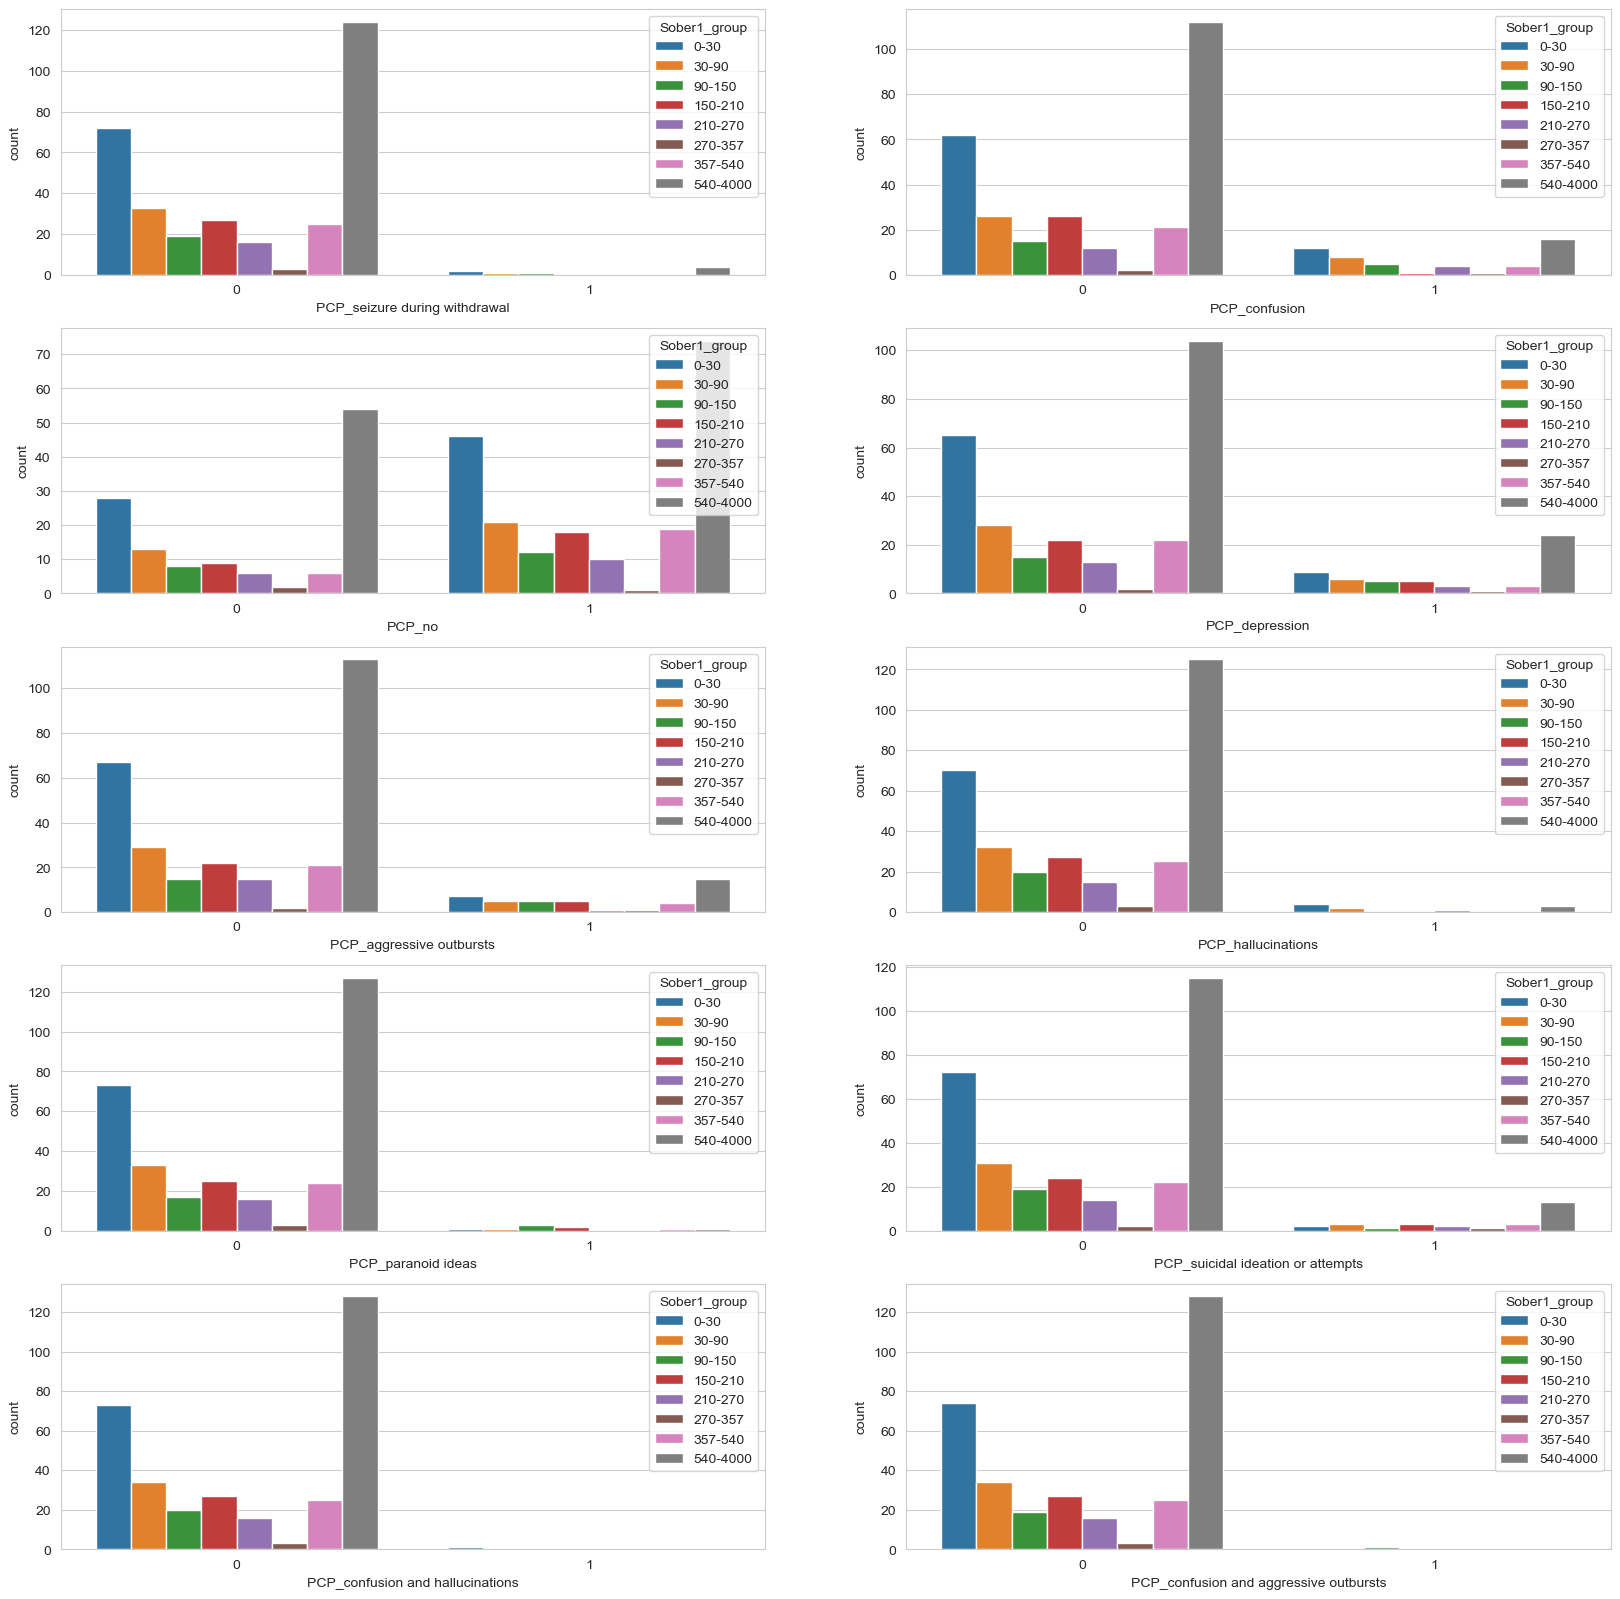

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a list of variables or column names
variables = ['PCP_seizure during withdrawal','PCP_confusion','PCP_no','PCP_depression','PCP_aggressive outbursts','PCP_hallucinations','PCP_paranoid ideas','PCP_suicidal ideation or attempts','PCP_confusion and hallucinations','PCP_confusion and aggressive outbursts','PCP_tension']

# Calculate the number of rows and columns for the subplots
num_rows = 5
num_cols = 2

# Create subplots for the variables
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))


# Flatten the axs array for easier indexing
axs = axs.flatten()

# Iterate over variables and create countplots
for i, variable in enumerate(variables):
    sns.countplot(x=variable,hue = 'Sober1_group', data=data, ax=axs[i])
    #axs[i].set_title(f'Countplot of {variable}')
    axs[i].set_xlabel(variable)
    #ax.bar_label(ax.containers[0],size=10)
    #ax.bar_label(ax.containers[1],size=10)

# Remove any unused subplots
if len(variables) < num_rows * num_cols:
    for j in range(len(variables), num_rows * num_cols):
        fig.delaxes(axs[j])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=3)  

# Show the plot
plt.show()


In [39]:
sdw=0
for index, row in data.iterrows():
    if row['PCP_seizure during withdrawal'] == 1 and row['Sober1_group'] == '0-30':
        sdw += 1
print(sdw)


c=0
for index, row in data.iterrows():
    if row['PCP_confusion'] == 1 and row['Sober1_group'] == '0-30':
        c += 1
print(c)


d=0
for index, row in data.iterrows():
    if row['PCP_depression'] == 1 and row['Sober1_group'] == '0-30':
        d += 1
print(d)


h=0
for index, row in data.iterrows():
    if row['PCP_hallucinations'] == 1 and row['Sober1_group'] == '0-30':
        h += 1
print(h)



p=0
for index, row in data.iterrows():
    if row['PCP_paranoid ideas'] == 1 and row['Sober1_group'] == '0-30':
        p += 1
print(p)


si=0
for index, row in data.iterrows():
    if row['PCP_suicidal ideation or attempts'] == 1 and row['Sober1_group'] == '0-30':
        si += 1
print(si)


ar=0
for index, row in data.iterrows():
    if row['PCP_aggressive outbursts'] == 1 and row['Sober1_group'] == '0-30':
        ar += 1
print(ar)



2
12
9
4
1
2
7


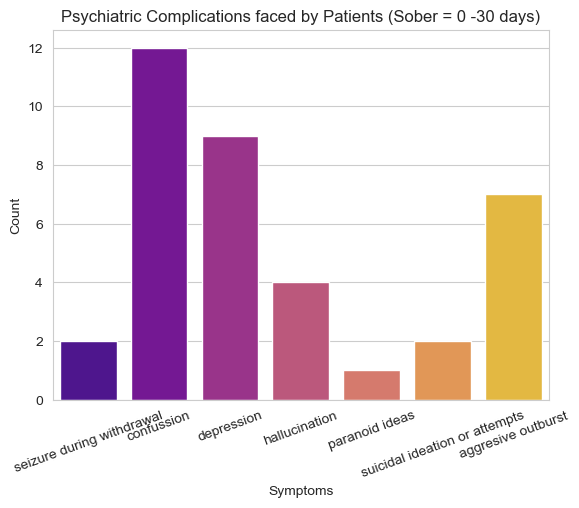

In [40]:
import matplotlib.pyplot as plt

values = [sdw, c, d, h, p, si, ar]  # Replace with your variable values
labels = ['seizure during withdrawal', 'confussion', 'depression', 'hallucination', 'paranoid ideas', 'suicidal ideation or attempts', 'aggresive outburst']

# Create a bar graph
sns.barplot(x=labels, y=values, palette='plasma')

# Set the title and axis labels
plt.title('Psychiatric Complications faced by Patients (Sober = 0 -30 days)')
plt.xlabel('Symptoms')
plt.ylabel('Count')

# Rotate x-axis labels if needed
plt.xticks(rotation=20)

# Display the graph
plt.show()

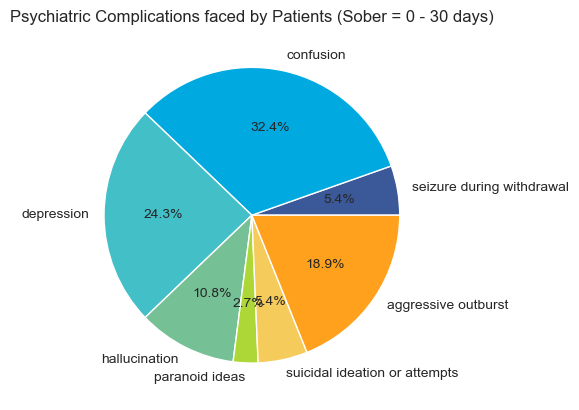

In [41]:
import matplotlib.pyplot as plt

values = [sdw, c, d, h, p, si, ar]  # Replace with your variable values
labels = ['seizure during withdrawal', 'confusion', 'depression', 'hallucination', 'paranoid ideas', 'suicidal ideation or attempts', 'aggressive outburst']

# Define a custom color palette
colours = ['#3B5998', '#00A9E0', '#43BFC7', '#75C095', '#ADD737', '#F5CB5C', '#FFA11C']

# Create a pie chart with the custom color palette
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colours)

# Set the title
plt.title('Psychiatric Complications faced by Patients (Sober = 0 - 30 days)')

# Display the chart
plt.show()

In [10]:
sdw=0
for index, row in data.iterrows():
    if row['PCP_seizure during withdrawal'] == 1 and row['Sober1_group'] == '30-90':
        sdw += 1
print(sdw)


c=0
for index, row in data.iterrows():
    if row['PCP_confusion'] == 1 and row['Sober1_group'] == '30-90':
        c += 1
print(c)


d=0
for index, row in data.iterrows():
    if row['PCP_depression'] == 1 and row['Sober1_group'] == '30-90':
        d += 1
print(d)


h=0
for index, row in data.iterrows():
    if row['PCP_hallucinations'] == 1 and row['Sober1_group'] == '30-90':
        h += 1
print(h)



p=0
for index, row in data.iterrows():
    if row['PCP_paranoid ideas'] == 1 and row['Sober1_group'] == '30-90':
        p += 1
print(p)


si=0
for index, row in data.iterrows():
    if row['PCP_suicidal ideation or attempts'] == 1 and row['Sober1_group'] == '30-90':
        si += 1
print(si)


ar=0
for index, row in data.iterrows():
    if row['PCP_aggressive outbursts'] == 1 and row['Sober1_group'] == '30-90':
        ar += 1
print(ar)




1
8
6
2
1
3
5


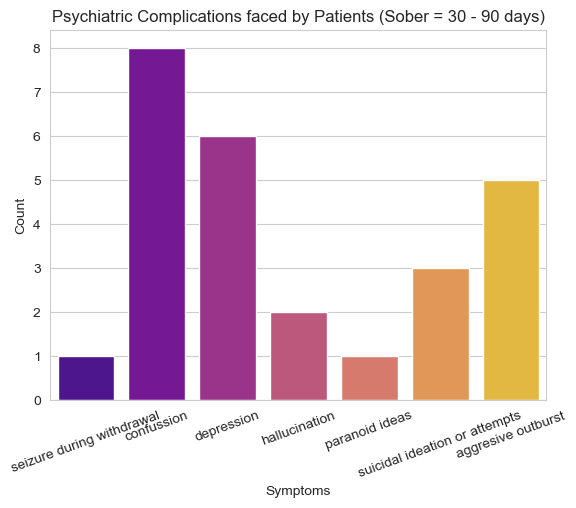

In [11]:
import matplotlib.pyplot as plt

values = [sdw, c, d, h, p, si, ar]  # Replace with your variable values
labels = ['seizure during withdrawal', 'confussion', 'depression', 'hallucination', 'paranoid ideas', 'suicidal ideation or attempts', 'aggresive outburst']

# Create a bar graph
sns.barplot(x=labels, y=values, palette='plasma')

# Set the title and axis labels
plt.title('Psychiatric Complications faced by Patients (Sober = 30 - 90 days)')
plt.xlabel('Symptoms')
plt.ylabel('Count')

# Rotate x-axis labels if needed
plt.xticks(rotation=20)

# Display the graph
plt.show()

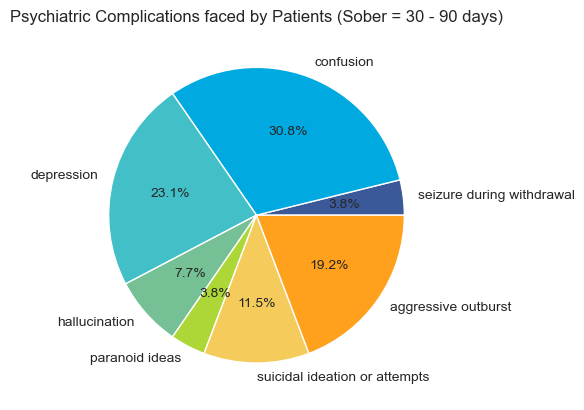

In [12]:
import matplotlib.pyplot as plt

values = [sdw, c, d, h, p, si, ar]  # Replace with your variable values
labels = ['seizure during withdrawal', 'confusion', 'depression', 'hallucination', 'paranoid ideas', 'suicidal ideation or attempts', 'aggressive outburst']

# Define a custom color palette
colours = ['#3B5998', '#00A9E0', '#43BFC7', '#75C095', '#ADD737', '#F5CB5C', '#FFA11C']

# Create a pie chart with the custom color palette
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colours)

# Set the title
plt.title('Psychiatric Complications faced by Patients (Sober = 30 - 90 days)')

# Display the ch
plt.show()


# living arrangemnt v/s sober

In [ ]:
data['Sober1_group'].value_counts()

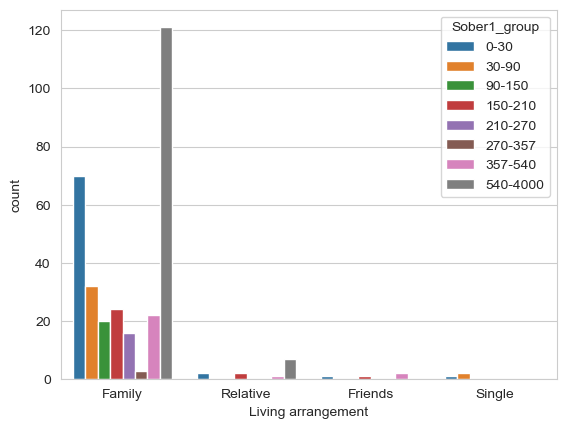

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' and want to create a catplot

# Create the catplot
cat_plot = sns.countplot(data=data, x='Living arrangement', hue='Sober1_group')

# Customize the x-axis labels
cat_plot.set_xticklabels(['Family', 'Relative','Friends', 'Single'])

# Set the axis labels


# Show the plot
plt.show()


In [46]:
# Assuming you have a DataFrame named 'data' with two attributes 'Attribute1' and 'Attribute2'

# Check the value counts of two attributes together
counts = data.groupby(['Sober1_group', 'Living arrangement']).size().reset_index(name='Count')

# Display the value counts
print(counts)


   Sober1_group  Living arrangement  Count
0          0-30                   1     70
1          0-30                   2      2
2          0-30                   3      1
3          0-30                   4      1
4         30-90                   1     32
5         30-90                   2      0
6         30-90                   3      0
7         30-90                   4      2
8        90-150                   1     20
9        90-150                   2      0
10       90-150                   3      0
11       90-150                   4      0
12      150-210                   1     24
13      150-210                   2      2
14      150-210                   3      1
15      150-210                   4      0
16      210-270                   1     16
17      210-270                   2      0
18      210-270                   3      0
19      210-270                   4      0
20      270-357                   1      3
21      270-357                   2      0
22      270

# sober v/v occupation

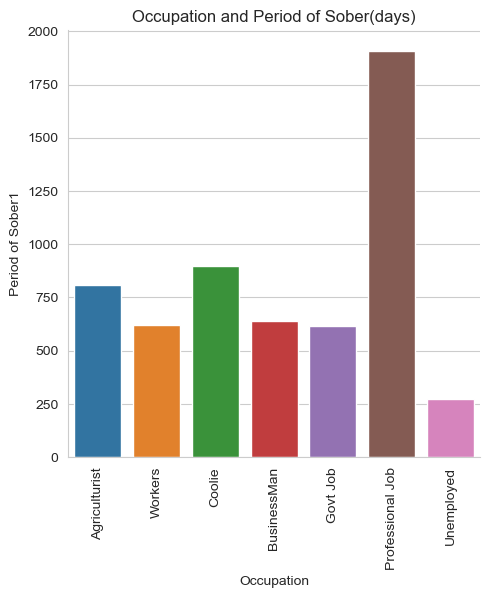

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Agriculturist', 'Workers', 'Coolie', 'BusinessMan', 'Govt Job', 'Professional Job', 'Unemployed']

sns.catplot(data=data, y='Period of Sober1', x='Occupation', kind='bar', ci=None)
plt.title('Occupation and Period of Sober(days)')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)  # Specify x-axis tick labels

plt.show()


In [48]:
counts = data.groupby(['Sober1_group', 'AgeGroup']).size().reset_index(name='Count')
print(counts)

   Sober1_group AgeGroup  Count
0          0-30    17-23      2
1          0-30    23-29      8
2          0-30    29-35     16
3          0-30    35-41     19
4          0-30    41-47     10
5          0-30    47-53     13
6          0-30    53-59      4
7          0-30    59-65      1
8          0-30    65-71      1
9         30-90    17-23      0
10        30-90    23-29      4
11        30-90    29-35      5
12        30-90    35-41     16
13        30-90    41-47      7
14        30-90    47-53      2
15        30-90    53-59      0
16        30-90    59-65      0
17        30-90    65-71      0
18       90-150    17-23      0
19       90-150    23-29      1
20       90-150    29-35      2
21       90-150    35-41      7
22       90-150    41-47      6
23       90-150    47-53      3
24       90-150    53-59      1
25       90-150    59-65      0
26       90-150    65-71      0
27      150-210    17-23      0
28      150-210    23-29      4
29      150-210    29-35     11
30      

# reason for starting Alcohol v/s Period of Sober

IndexError: index 10 is out of bounds for axis 0 with size 10

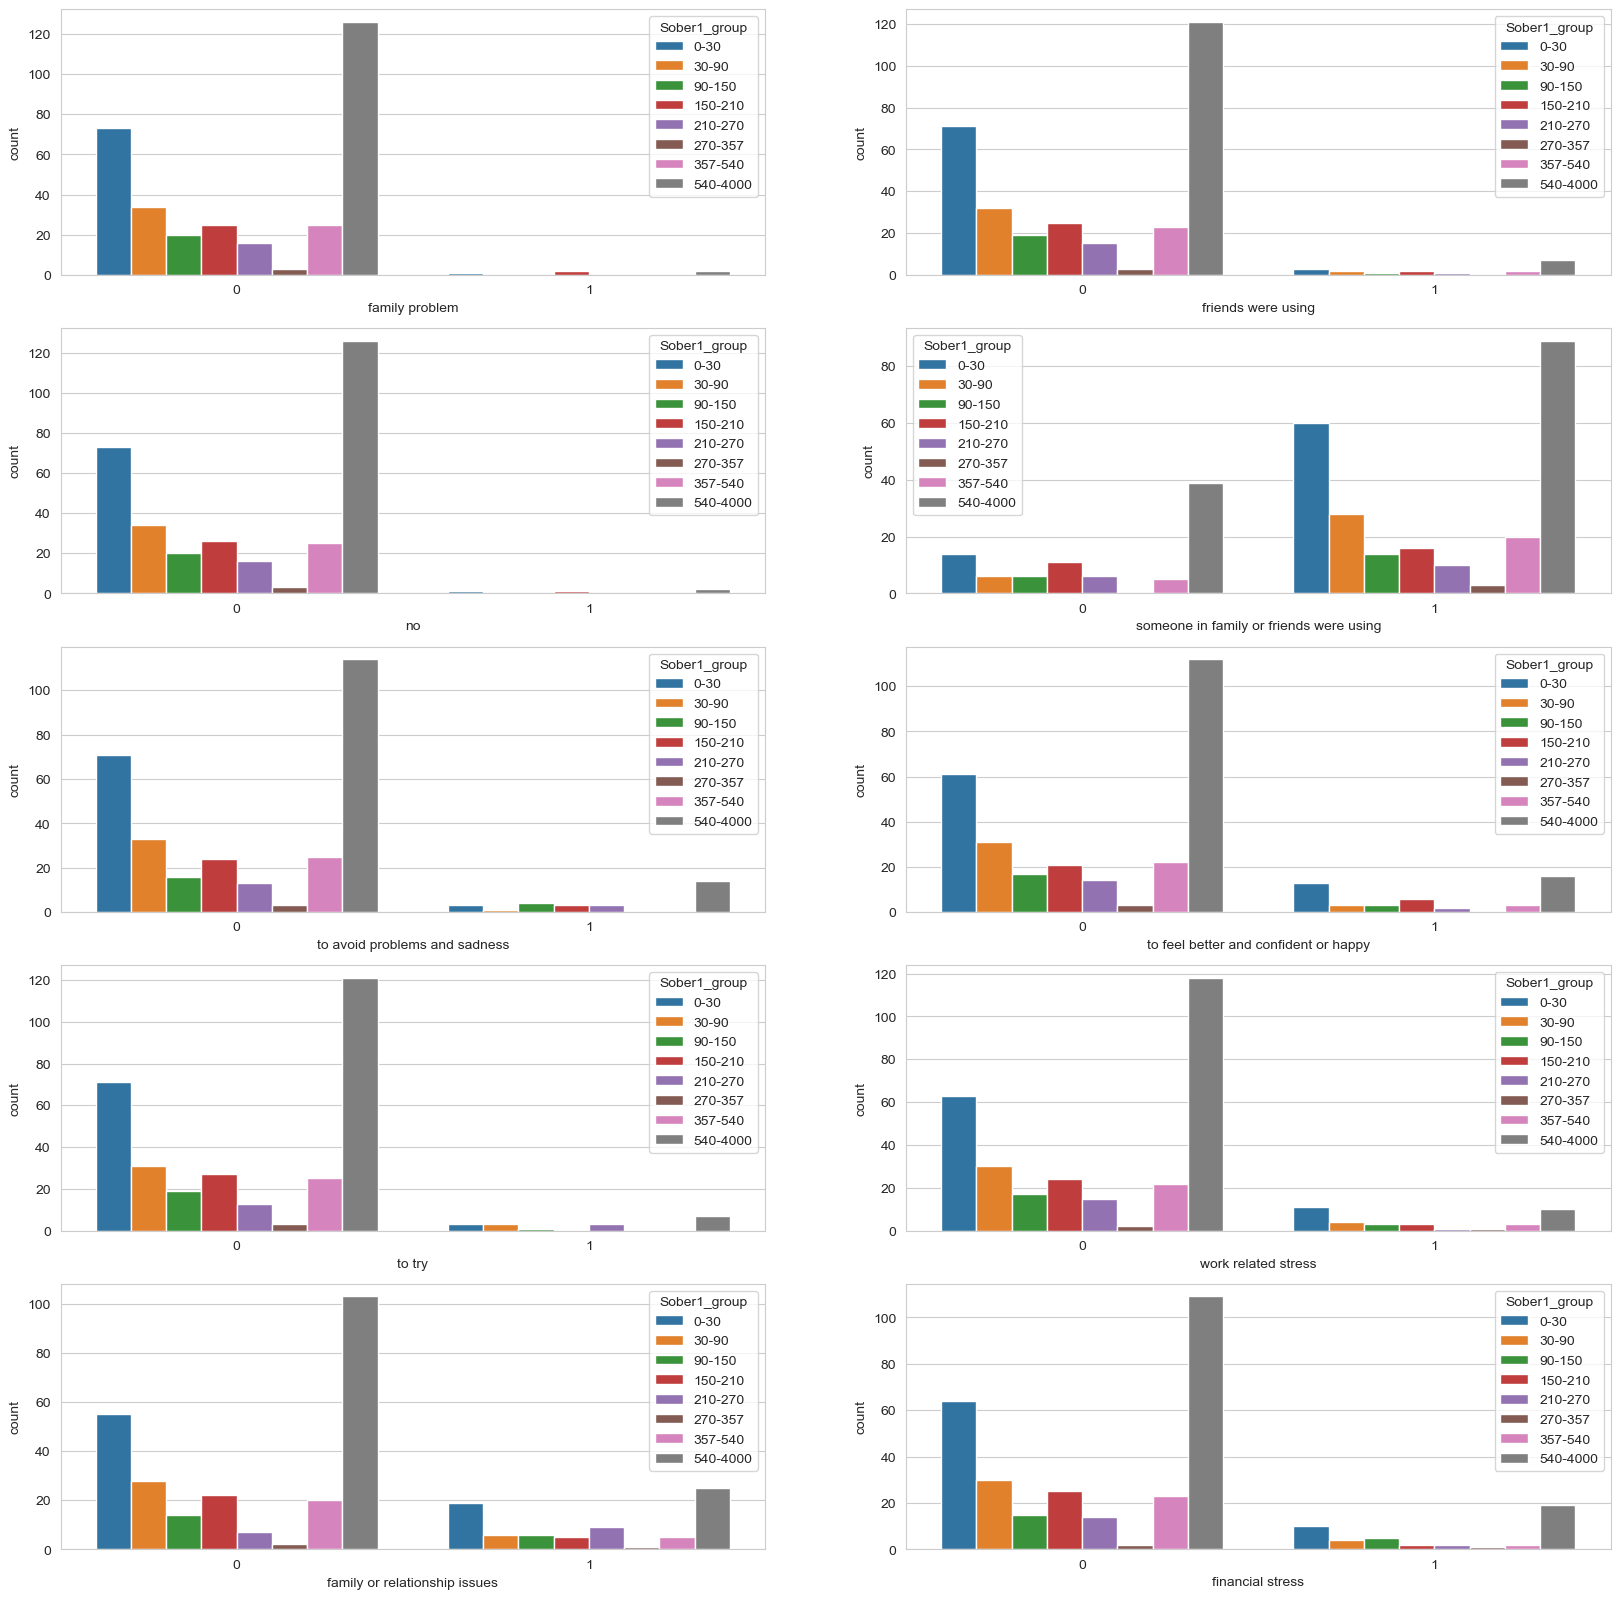

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a list of variables or column names
variables = ['family problem','friends were using','no','someone in family or friends were using','to avoid problems and sadness','to feel better and confident or happy','to try','work related stress','family or relationship issues','financial stress','weak mainded & weak personality']

# Calculate the number of rows and columns for the subplots
num_rows = 5
num_cols = 2

# Create subplots for the variables
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))


# Flatten the axs array for easier indexing
axs = axs.flatten()

# Iterate over variables and create countplots
for i, variable in enumerate(variables):
    sns.countplot(x=variable,hue = 'Sober1_group', data=data, ax=axs[i])
    axs[i].set_xlabel(variable)
    

# Remove any unused subplots
if len(variables) < num_rows * num_cols:
    for j in range(len(variables), num_rows * num_cols):
        fig.delaxes(axs[j])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=3)  

# Show the plot
plt.show()


In [50]:
fp=0
for index, row in data.iterrows():
    if row['family problem'] == 1 and row['Sober1_group'] == '0-30':
        fp += 1
print(fp)


f=0
for index, row in data.iterrows():
    if row['friends were using'] == 1 and row['Sober1_group'] == '0-30':
        f += 1
print(f)



siff=0
for index, row in data.iterrows():
    if row['someone in family or friends were using'] == 1 and row['Sober1_group'] == '0-30':
        siff += 1
print(siff)



ap=0
for index, row in data.iterrows():
    if row['to avoid problems and sadness'] == 1 and row['Sober1_group'] == '0-30':
        ap += 1
print(ap)


fb=0
for index, row in data.iterrows():
    if row['to feel better and confident or happy'] == 1 and row['Sober1_group'] == '0-30':
        fb += 1
print(fb)


to=0
for index, row in data.iterrows():
    if row['to try'] == 1 and row['Sober1_group'] == '0-30':
        to += 1
print(to)


ws=0
for index, row in data.iterrows():
    if row['work related stress'] == 1 and row['Sober1_group'] == '0-30':
        ws += 1
print(ws)



fs=0
for index, row in data.iterrows():
    if row['financial stress'] == 1 and row['Sober1_group'] == '0-30':
        fs += 1
print(fs)


ri=0
for index, row in data.iterrows():
    if row['family or relationship issues'] == 1 and row['Sober1_group'] == '0-30':
        ri += 1
print(ri)


1
3
60
3
13
3
11
10
19


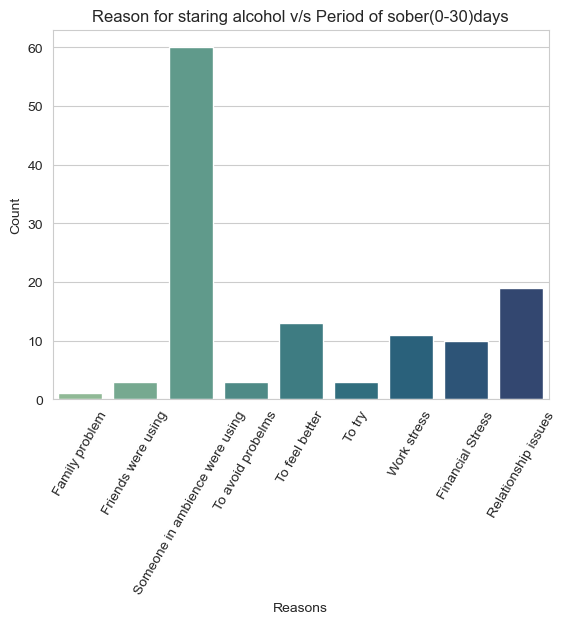

In [51]:
import matplotlib.pyplot as plt

values = [fp,f,siff,ap,fb,to,ws,fs,ri]  # Replace with your variable values
labels = ['Family problem','Friends were using','Someone in ambience were using','To avoid probelms','To feel better','To try','Work stress','Financial Stress','Relationship issues']

# Create a bar graph
sns.barplot(x=labels, y=values, palette='crest')

# Set the title and axis labels
plt.title('Reason for staring alcohol v/s Period of sober(0-30)days')
plt.xlabel('Reasons')
plt.ylabel('Count')

# Rotate x-axis labels if needed
plt.xticks(rotation=60)

# Display the graph
plt.show()

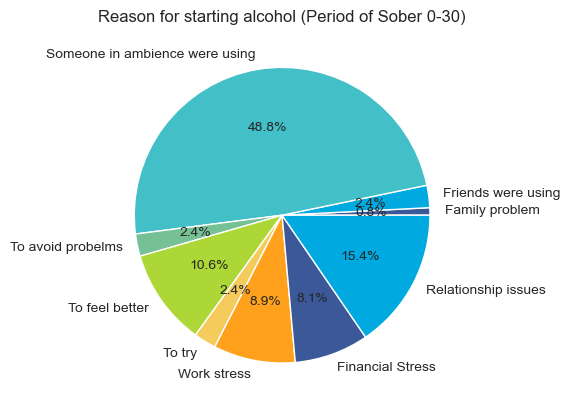

In [52]:
import matplotlib.pyplot as plt

values = [fp,f,siff,ap,fb,to,ws,fs,ri]  # Replace with your variable values
labels = ['Family problem','Friends were using','Someone in ambience were using','To avoid probelms','To feel better','To try','Work stress','Financial Stress','Relationship issues']


# Create a bar graph
colours = ['#3B5998', '#00A9E0', '#43BFC7', '#75C095', '#ADD737', '#F5CB5C', '#FFA11C']

# Create a pie chart with the custom color palette
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colours)

# Set the title
plt.title('Reason for starting alcohol (Period of Sober 0-30)')

# Display the chart
plt.show()

In [14]:
fp=0
for index, row in data.iterrows():
    if row['family problem'] == 1 and row['Sober1_group'] == '30-90':
        fp += 1
print(fp)


f=0
for index, row in data.iterrows():
    if row['friends were using'] == 1 and row['Sober1_group'] == '30-90':
        f += 1
print(f)



siff=0
for index, row in data.iterrows():
    if row['someone in family or friends were using'] == 1 and row['Sober1_group'] == '30-90':
        siff += 1
print(siff)



ap=0
for index, row in data.iterrows():
    if row['to avoid problems and sadness'] == 1 and row['Sober1_group'] == '30-90':
        ap += 1
print(ap)


fb=0
for index, row in data.iterrows():
    if row['to feel better and confident or happy'] == 1 and row['Sober1_group'] == '30-90':
        fb += 1
print(fb)


to=0
for index, row in data.iterrows():
    if row['to try'] == 1 and row['Sober1_group'] == '30-90':
        to += 1
print(to)


ws=0
for index, row in data.iterrows():
    if row['work related stress'] == 1 and row['Sober1_group'] == '30-90':
        ws += 1
print(ws)



fs=0
for index, row in data.iterrows():
    if row['financial stress'] == 1 and row['Sober1_group'] == '30-90':
        fs += 1
print(fs)


ri=0
for index, row in data.iterrows():
    if row['family or relationship issues'] == 1 and row['Sober1_group'] == '30-90':
        ri += 1
print(ri)


0
2
28
1
3
3
4
4
6


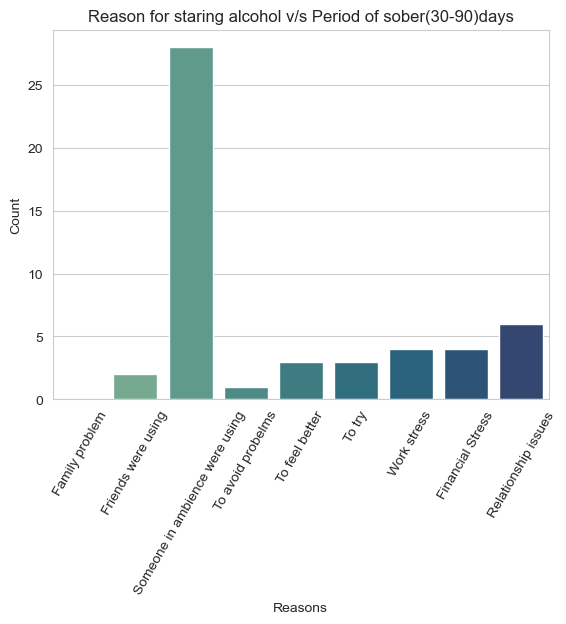

In [15]:
import matplotlib.pyplot as plt

values = [fp,f,siff,ap,fb,to,ws,fs,ri]  # Replace with your variable values
labels = ['Family problem','Friends were using','Someone in ambience were using','To avoid probelms','To feel better','To try','Work stress','Financial Stress','Relationship issues']

# Create a bar graph
sns.barplot(x=labels, y=values, palette='crest')

# Set the title and axis labels
plt.title('Reason for staring alcohol v/s Period of sober(30-90)days')
plt.xlabel('Reasons')
plt.ylabel('Count')

# Rotate x-axis labels if needed
plt.xticks(rotation=60)

# Display the graph
plt.show()

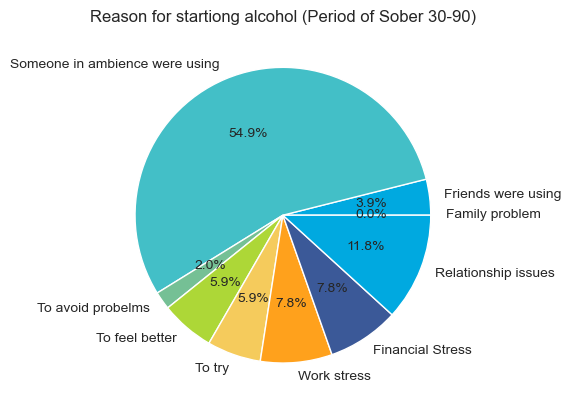

In [16]:
import matplotlib.pyplot as plt

values = [fp,f,siff,ap,fb,to,ws,fs,ri]  # Replace with your variable values
labels = ['Family problem','Friends were using','Someone in ambience were using','To avoid probelms','To feel better','To try','Work stress','Financial Stress','Relationship issues']


# Create a bar graph
colours = ['#3B5998', '#00A9E0', '#43BFC7', '#75C095', '#ADD737', '#F5CB5C', '#FFA11C']

# Create a pie chart with the custom color palette
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colours)

# Set the title
plt.title('Reason for startiong alcohol (Period of Sober 30-90)')

# Display the chart
plt.show()

# Reason for starting alcohol v/s AgeGroup

IndexError: index 10 is out of bounds for axis 0 with size 10

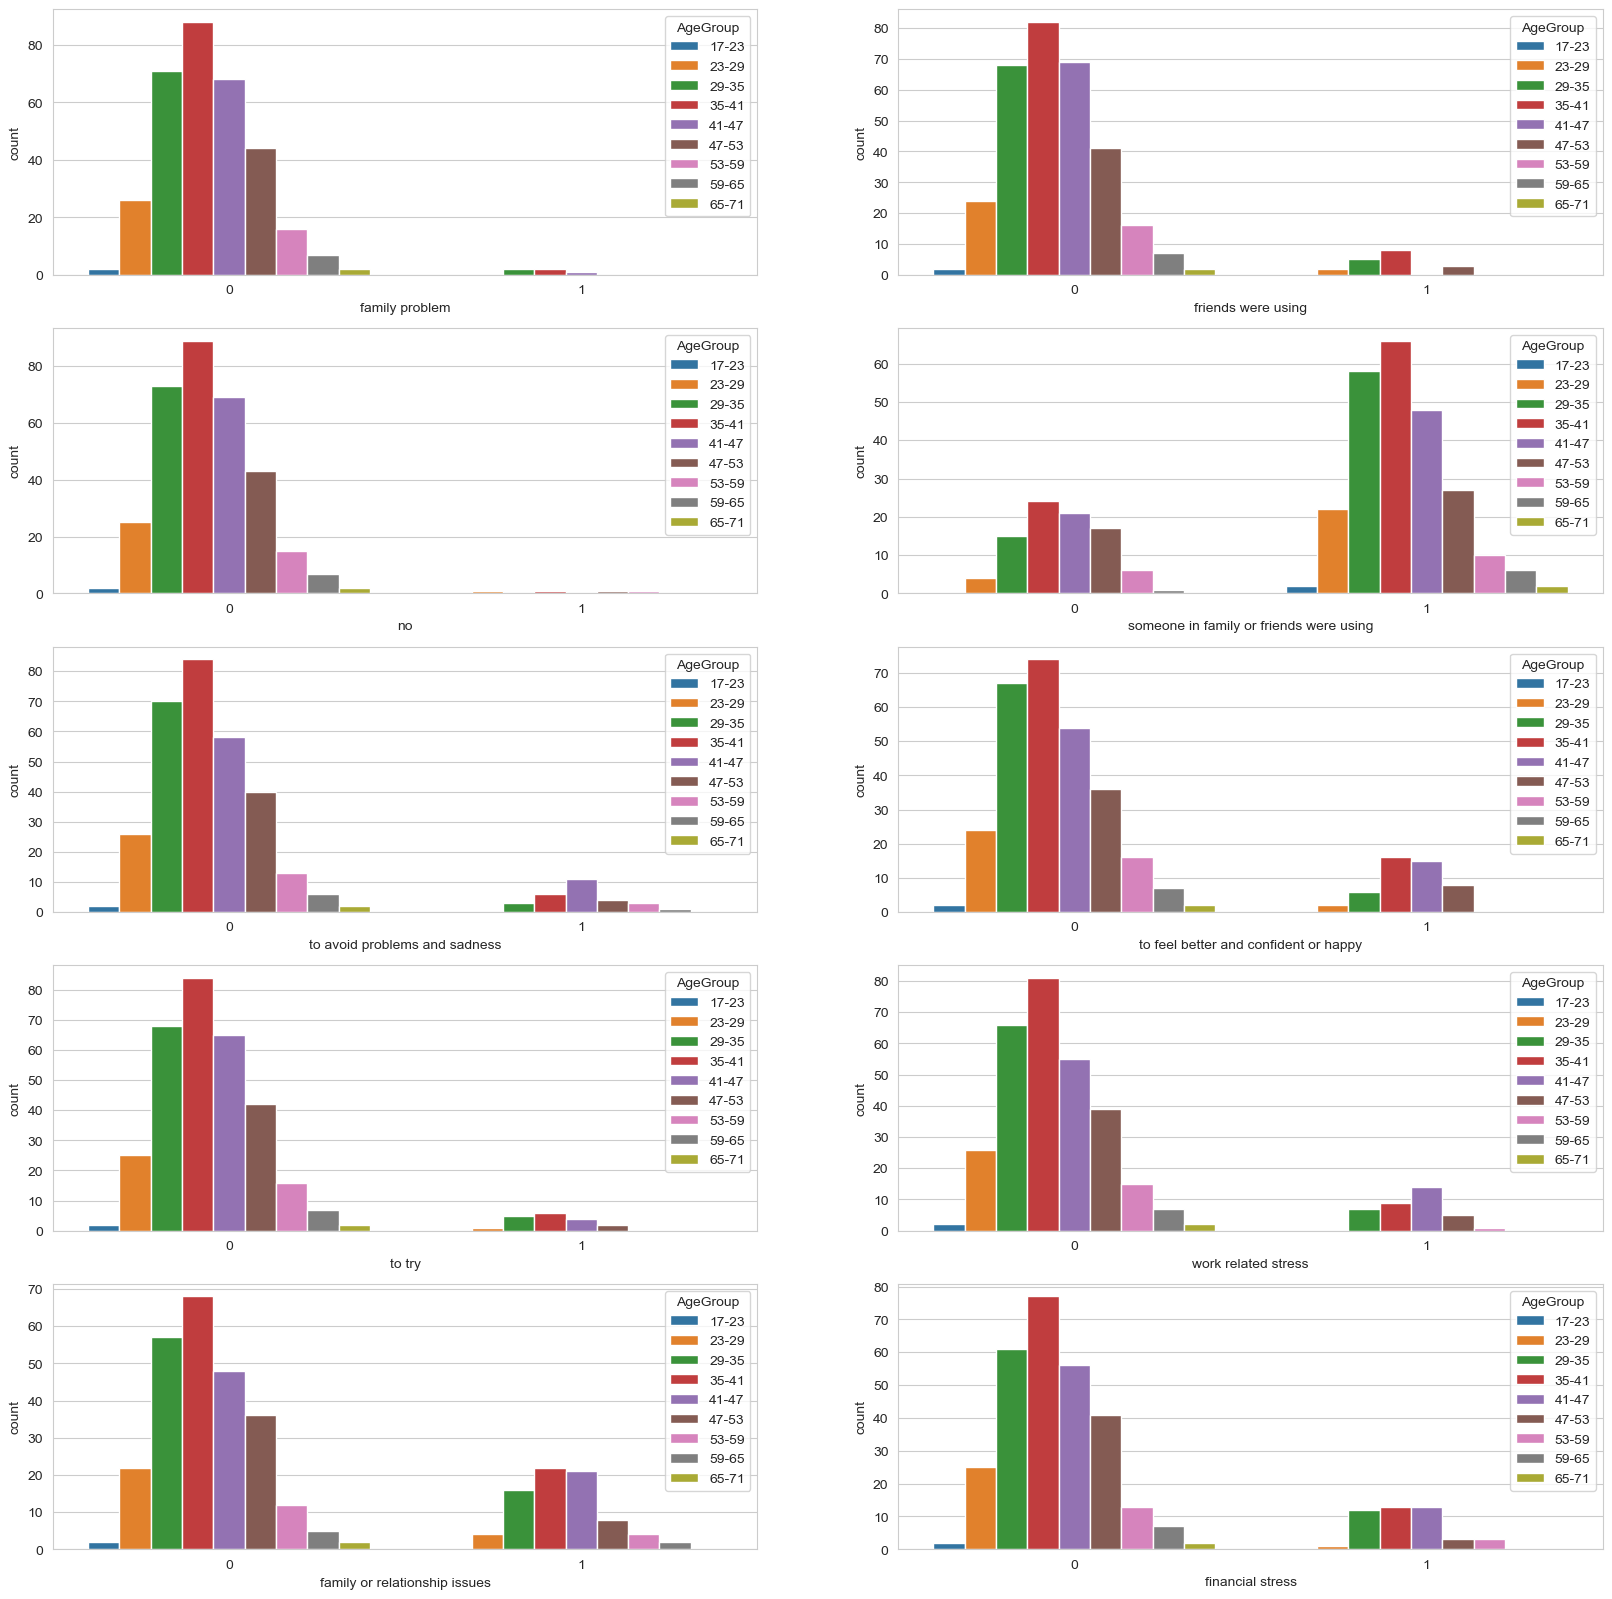

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a list of variables or column names
variables = ['family problem','friends were using','no','someone in family or friends were using','to avoid problems and sadness','to feel better and confident or happy','to try','work related stress','family or relationship issues','financial stress','weak mainded & weak personality']

# Calculate the number of rows and columns for the subplots
num_rows = 5
num_cols = 2

# Create subplots for the variables
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))


# Flatten the axs array for easier indexing
axs = axs.flatten()

# Iterate over variables and create countplots
for i, variable in enumerate(variables):
    sns.countplot(x=variable,hue = 'AgeGroup', data=data, ax=axs[i])
    #axs[i].set_title(f'Countplot of {variable}')
    axs[i].set_xlabel(variable)
    #ax.bar_label(ax.containers[0],size=10)
    #ax.bar_label(ax.containers[1],size=10)

# Remove any unused subplots
if len(variables) < num_rows * num_cols:
    for j in range(len(variables), num_rows * num_cols):
        fig.delaxes(axs[j])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=3)  

# Show the plot
plt.show()

In [57]:
fp=0
for index, row in data.iterrows():
    if row['family problem'] == 1 and row['AgeGroup'] == '35-41':
        fp += 1
print(fp)


f=0
for index, row in data.iterrows():
    if row['friends were using'] == 1 and row['AgeGroup'] == '35-41':
        f += 1
print(f)



siff=0
for index, row in data.iterrows():
    if row['someone in family or friends were using'] == 1 and row['AgeGroup'] == '35-41':
        siff += 1
print(siff)



ap=0
for index, row in data.iterrows():
    if row['to avoid problems and sadness'] == 1 and row['AgeGroup'] == '35-41':
        ap += 1
print(ap)


fb=0
for index, row in data.iterrows():
    if row['to feel better and confident or happy'] == 1 and row['AgeGroup'] == '35-41':
        fb += 1
print(fb)


to=0
for index, row in data.iterrows():
    if row['to try'] == 1 and row['AgeGroup'] == '35-41':
        to += 1
print(to)


ws=0
for index, row in data.iterrows():
    if row['work related stress'] == 1 and row['AgeGroup'] == '35-41':
        ws += 1
print(ws)



fs=0
for index, row in data.iterrows():
    if row['financial stress'] == 1 and row['AgeGroup'] == '35-41':
        fs += 1
print(fs)


ri=0
for index, row in data.iterrows():
    if row['family or relationship issues'] == 1 and row['AgeGroup'] == '35-41':
        ri += 1
print(ri)


2
8
66
6
16
6
9
13
22


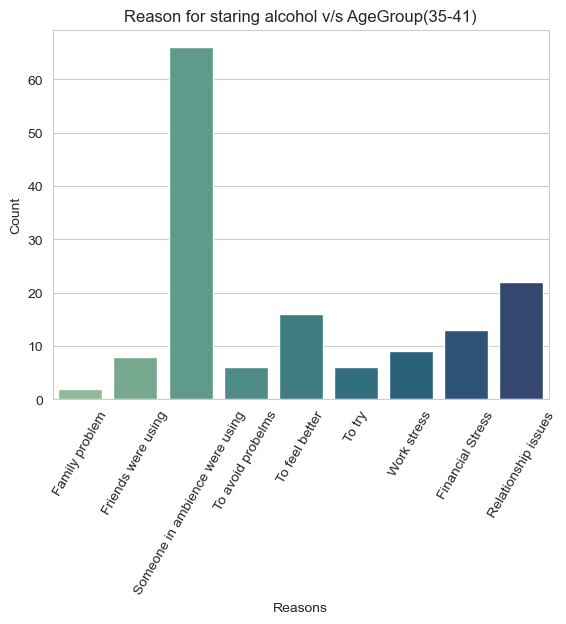

In [58]:
import matplotlib.pyplot as plt

values = [fp,f,siff,ap,fb,to,ws,fs,ri]  # Replace with your variable values
labels = ['Family problem','Friends were using','Someone in ambience were using','To avoid probelms','To feel better','To try','Work stress','Financial Stress','Relationship issues']

# Create a bar graph
sns.barplot(x=labels, y=values, palette='crest')

# Set the title and axis labels
plt.title('Reason for staring alcohol v/s AgeGroup(35-41)')
plt.xlabel('Reasons')
plt.ylabel('Count')

# Rotate x-axis labels if needed
plt.xticks(rotation=60)

# Display the graph
plt.show()

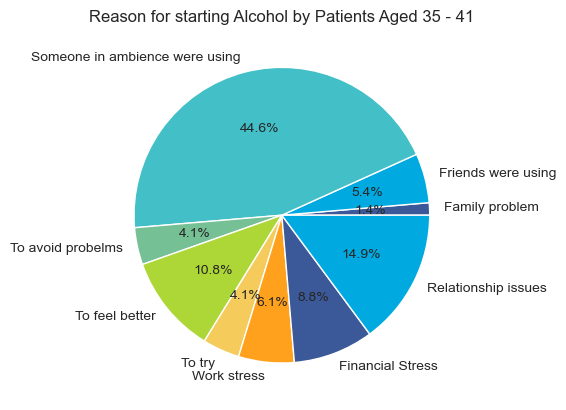

In [59]:
import matplotlib.pyplot as plt

values = [fp,f,siff,ap,fb,to,ws,fs,ri]  # Replace with your variable values
labels = ['Family problem','Friends were using','Someone in ambience were using','To avoid probelms','To feel better','To try','Work stress','Financial Stress','Relationship issues']


# Create a bar graph
colours = ['#3B5998', '#00A9E0', '#43BFC7', '#75C095', '#ADD737', '#F5CB5C', '#FFA11C']

# Create a pie chart with the custom color palette
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colours)

# Set the title
plt.title('Reason for starting Alcohol by Patients Aged 35 - 41')

# Display the chart
plt.show()

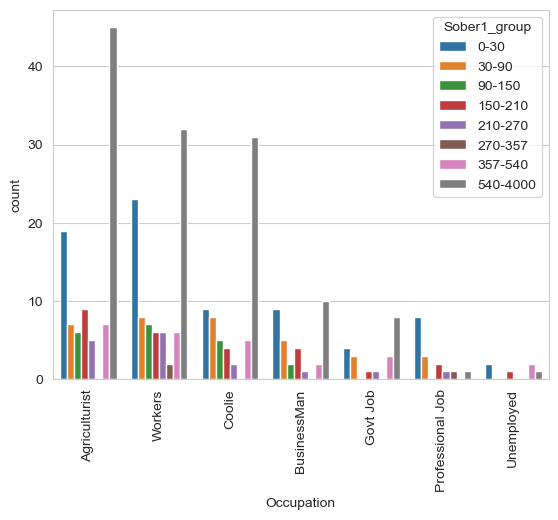

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' and want to create a catplot

# Create the catplot
cat_plot = sns.countplot(data=data, x='Occupation', hue='Sober1_group')

# Customize the x-axis labels
cat_plot.set_xticklabels(['Agriculturist', 'Workers', 'Coolie', 'BusinessMan', 'Govt Job', 'Professional Job', 'Unemployed'])

# Set the axis labels

plt.xticks(rotation=90)

# Show the plot
plt.show()

# Period of Sober v/s AgeGroup

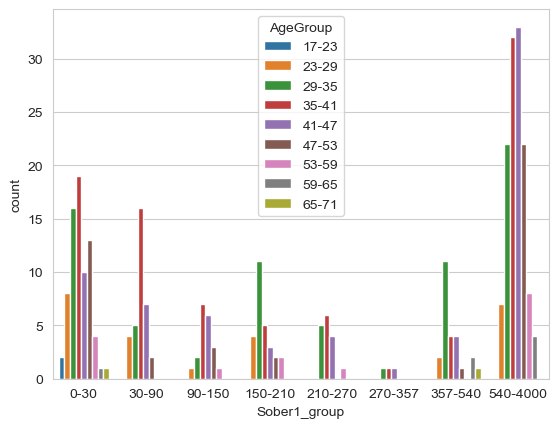

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' and want to create a catplot

# Create the catplot
cat_plot = sns.countplot(data=data, x='Sober1_group', hue='AgeGroup')

# Customize the x-axis labels


# Show the plot
plt.show()

# living arrangment v/s AgeGroup

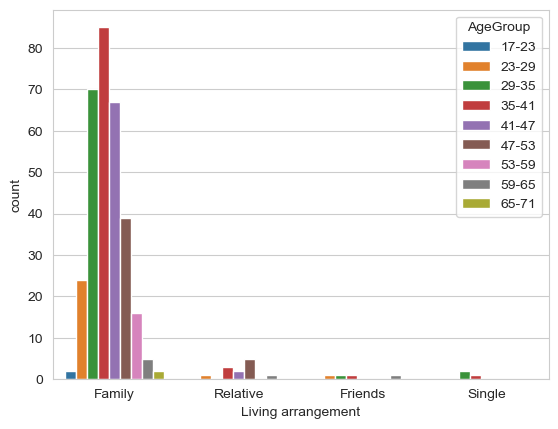

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' and want to create a catplot

# Create the catplot
cat_plot = sns.countplot(data=data, x='Living arrangement', hue='AgeGroup')

# Customize the x-axis labels
cat_plot.set_xticklabels(['Family', 'Relative','Friends', 'Single'])


# Show the plot
plt.show()

# Occupation v/s Living Arrangment

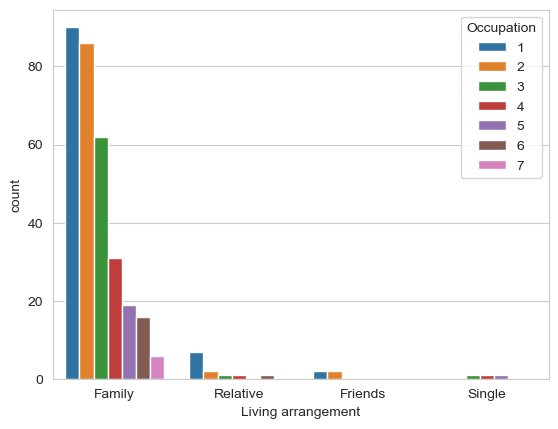

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt



variables = ['family problem','friends were using','someone in family or friends were using','to avoid problems and sadness','to feel better and confident or happy','to try','work related stress','family or relationship issues','financial stress','weak mainded & weak personality']
# Assuming you have a DataFrame named 'data' and want to create a catplot

# Create the catplot
cat_plot = sns.countplot(data=data, x='Living arrangement', hue= 'Occupation')

# Customize the x-axis labels
cat_plot.set_xticklabels(['Family', 'Relative','Friends', 'Single'])



# Show the plot
plt.show()

# occupation v/s  Period of sober

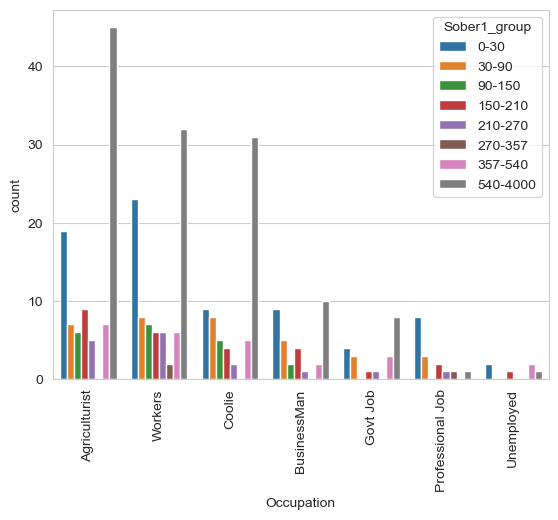

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' and want to create a catplot

# Create the catplot
cat_plot = sns.countplot(data=data, x='Occupation', hue='Sober1_group')

# Customize the x-axis labels
cat_plot.set_xticklabels(['Agriculturist', 'Workers', 'Coolie', 'BusinessMan', 'Govt Job', 'Professional Job', 'Unemployed'])
plt.xticks(rotation=90)

# Show the plot
plt.show()

# Occupation v/s Age Group

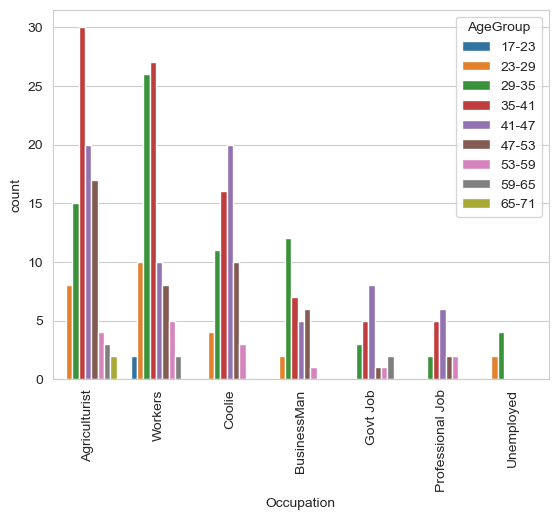

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' and want to create a catplot

# Create the catplot
cat_plot = sns.countplot(data=data, x='Occupation', hue='AgeGroup')

# Customize the x-axis labels
cat_plot.set_xticklabels(['Agriculturist', 'Workers', 'Coolie', 'BusinessMan', 'Govt Job', 'Professional Job', 'Unemployed'])
plt.xticks(rotation=90)

# Show the plot
plt.show()

# Psychiatric Complication v/s AgeGroup

IndexError: index 10 is out of bounds for axis 0 with size 10

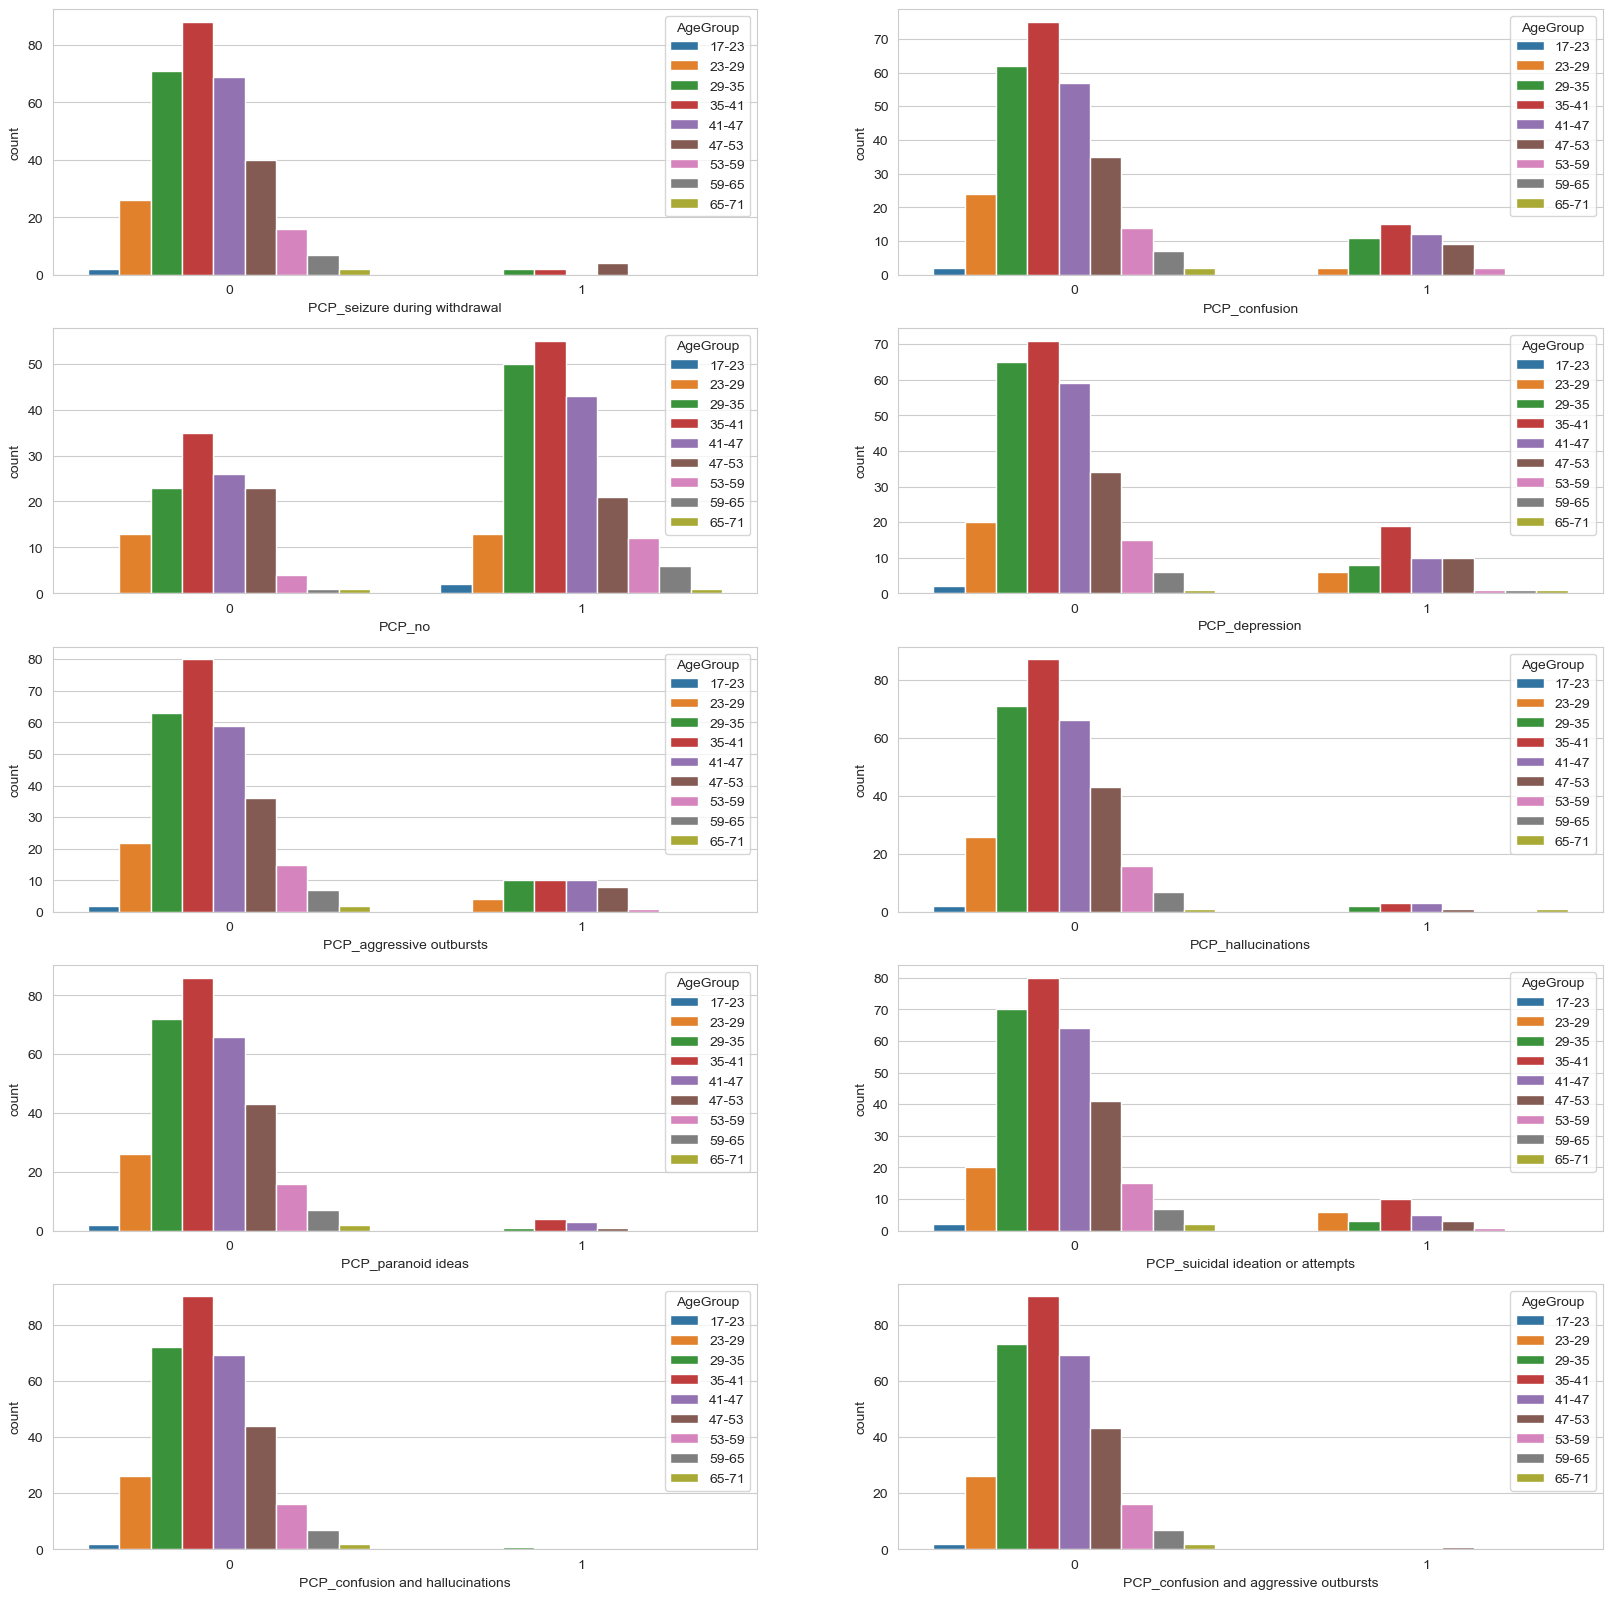

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a list of variables or column names
variables = ['PCP_seizure during withdrawal','PCP_confusion','PCP_no','PCP_depression','PCP_aggressive outbursts','PCP_hallucinations','PCP_paranoid ideas','PCP_suicidal ideation or attempts','PCP_confusion and hallucinations','PCP_confusion and aggressive outbursts','PCP_tension']

# Calculate the number of rows and columns for the subplots
num_rows = 5
num_cols = 2

# Create subplots for the variables
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))


# Flatten the axs array for easier indexing
axs = axs.flatten()

# Iterate over variables and create countplots
for i, variable in enumerate(variables):
    sns.countplot(x=variable,hue = 'AgeGroup', data=data, ax=axs[i])
    #axs[i].set_title(f'Countplot of {variable}')
    axs[i].set_xlabel(variable)
    #ax.bar_label(ax.containers[0],size=10)
    #ax.bar_label(ax.containers[1],size=10)

# Remove any unused subplots
if len(variables) < num_rows * num_cols:
    for j in range(len(variables), num_rows * num_cols):
        fig.delaxes(axs[j])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=3)  

# Show the plot
plt.show()

In [67]:
sdw=0
for index, row in data.iterrows():
    if row['PCP_seizure during withdrawal'] == 1 and row['AgeGroup'] == '35-41':
        sdw += 1
print(sdw)


c=0
for index, row in data.iterrows():
    if row['PCP_confusion'] == 1 and row['AgeGroup'] == '35-41':
        c += 1
print(c)


d=0
for index, row in data.iterrows():
    if row['PCP_depression'] == 1 and row['AgeGroup'] == '35-41':
        d += 1
print(d)


h=0
for index, row in data.iterrows():
    if row['PCP_hallucinations'] == 1 and row['AgeGroup'] == '35-41':
        h += 1
print(h)



p=0
for index, row in data.iterrows():
    if row['PCP_paranoid ideas'] == 1 and row['AgeGroup'] == '35-41':
        p += 1
print(p)


si=0
for index, row in data.iterrows():
    if row['PCP_suicidal ideation or attempts'] == 1 and row['AgeGroup'] == '35-41':
        si += 1
print(si)


ar=0
for index, row in data.iterrows():
    if row['PCP_aggressive outbursts'] == 1 and row['AgeGroup'] == '35-41':
        ar += 1
print(ar)




2
15
19
3
4
10
10


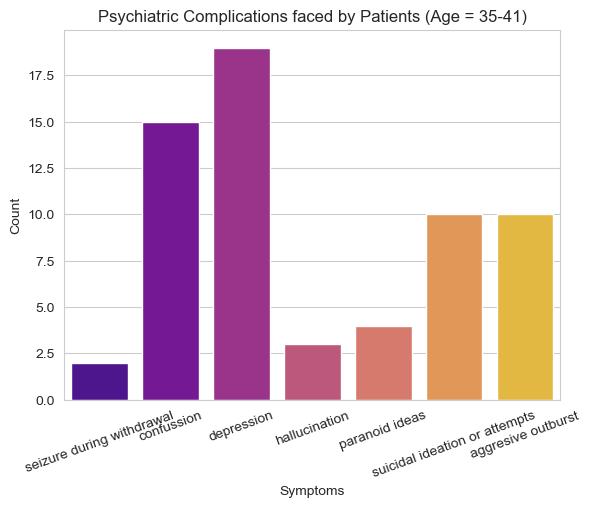

In [68]:
import matplotlib.pyplot as plt

values = [sdw, c, d, h, p, si, ar]  # Replace with your variable values
labels = ['seizure during withdrawal', 'confussion', 'depression', 'hallucination', 'paranoid ideas', 'suicidal ideation or attempts', 'aggresive outburst']

# Create a bar graph
sns.barplot(x=labels, y=values, palette='plasma')

# Set the title and axis labels
plt.title('Psychiatric Complications faced by Patients (Age = 35-41)')
plt.xlabel('Symptoms')
plt.ylabel('Count')

# Rotate x-axis labels if needed
plt.xticks(rotation=20)

# Display the graph
plt.show()

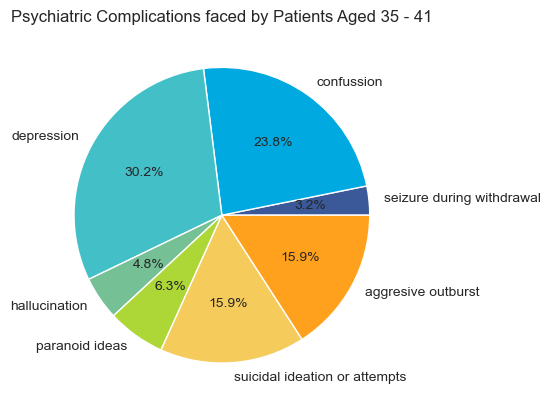

In [69]:
import matplotlib.pyplot as plt

values = [sdw, c, d, h, p, si, ar]  # Replace with your variable values
labels = ['seizure during withdrawal', 'confussion', 'depression', 'hallucination', 'paranoid ideas', 'suicidal ideation or attempts', 'aggresive outburst']

# Create a bar graph
colours = ['#3B5998', '#00A9E0', '#43BFC7', '#75C095', '#ADD737', '#F5CB5C', '#FFA11C']

# Create a pie chart with the custom color palette
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colours)

# Set the title
plt.title('Psychiatric Complications faced by Patients Aged 35 - 41')

# Display the chart
plt.show()

# AgeGroup v/s Withdrawal Symptoms

IndexError: index 10 is out of bounds for axis 0 with size 10

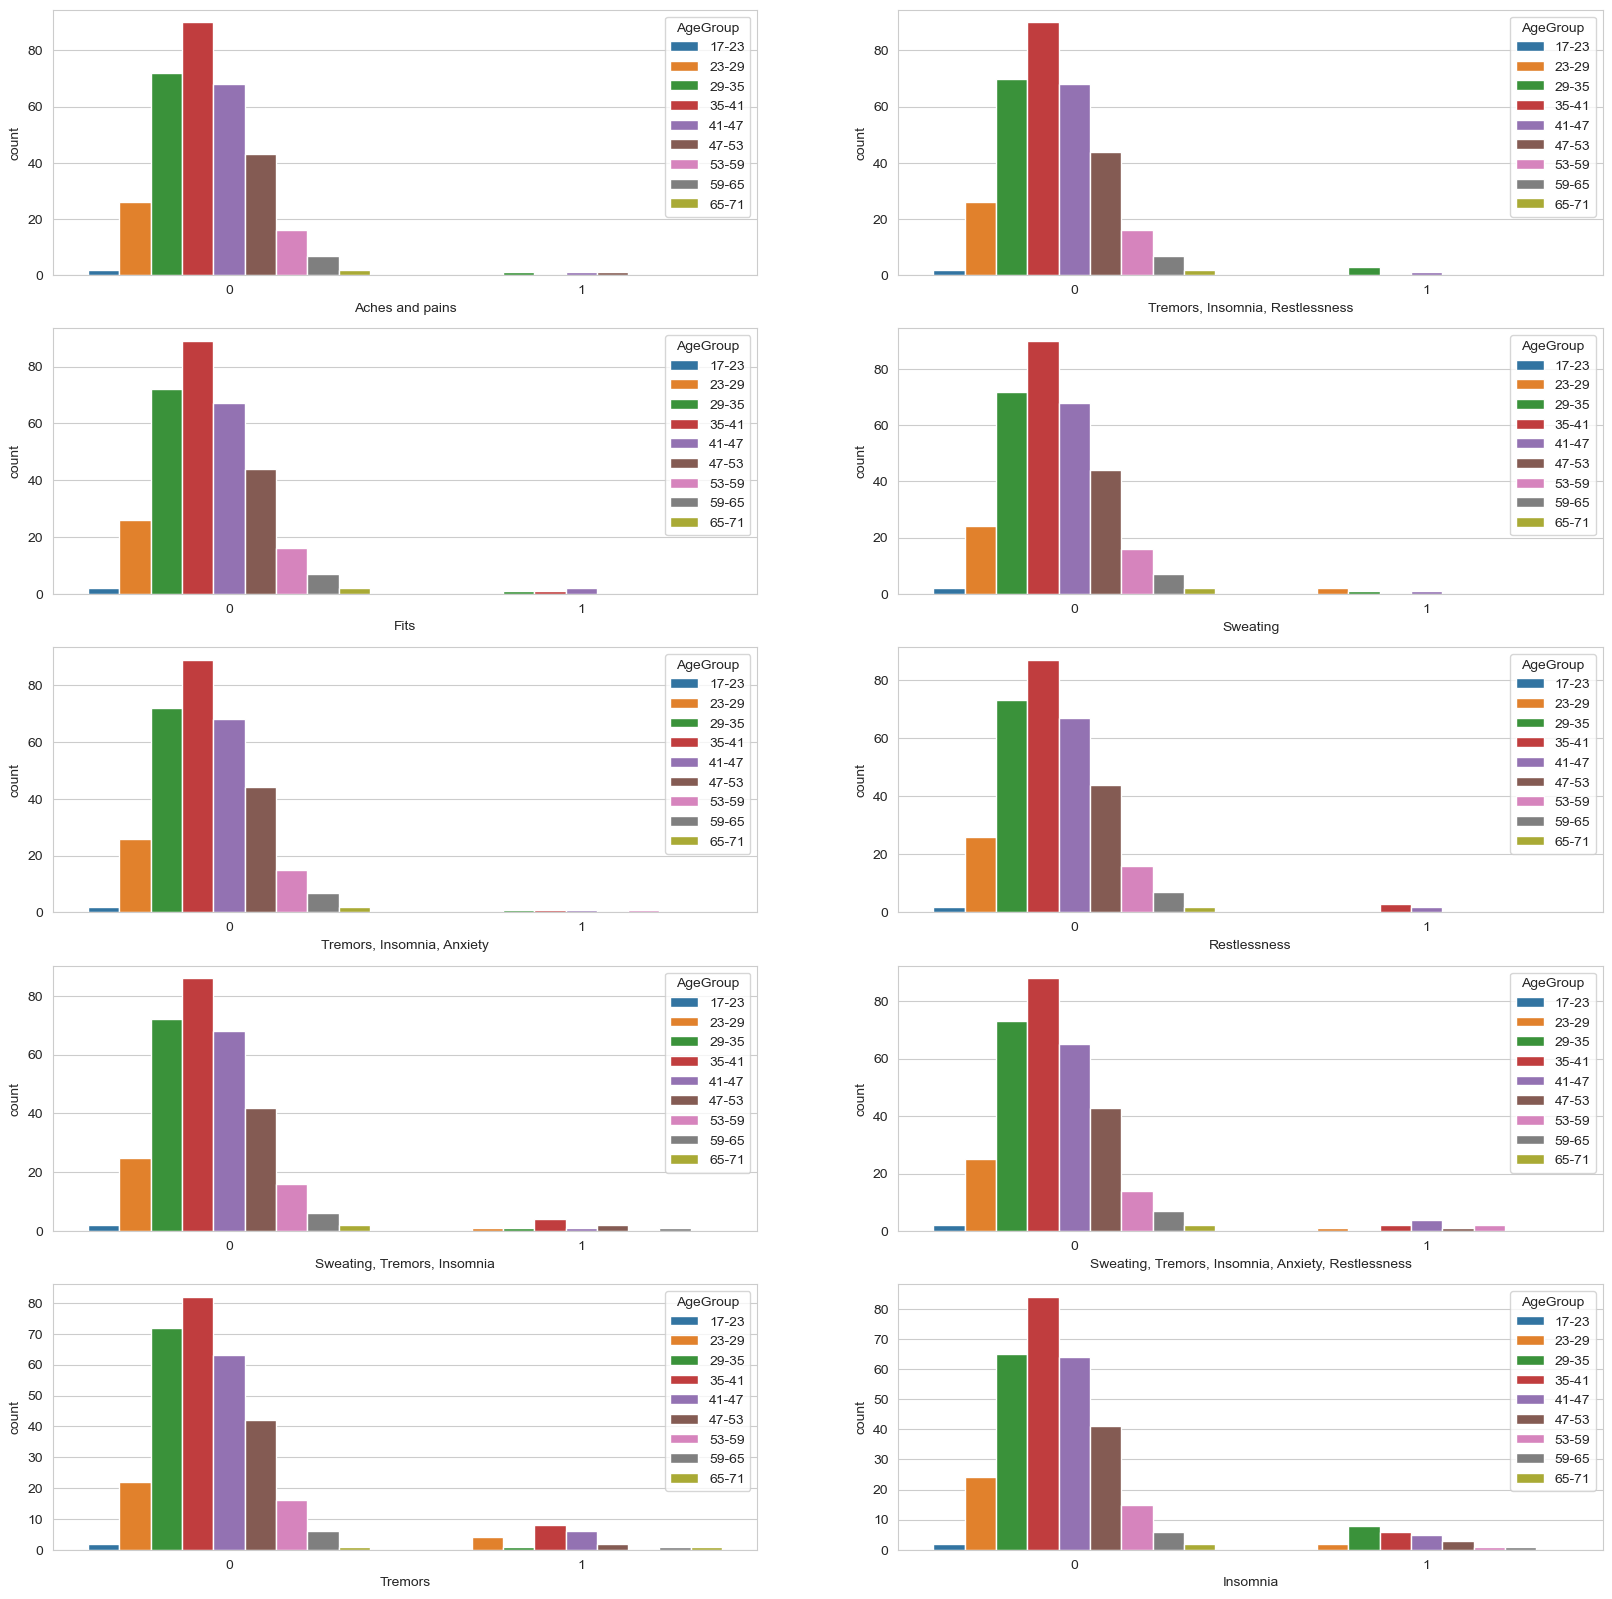

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a list of variables or column names
variables = ['Aches and pains','Tremors, Insomnia, Restlessness','Fits','Sweating','Tremors, Insomnia, Anxiety','Restlessness','Sweating, Tremors, Insomnia','Sweating, Tremors, Insomnia, Anxiety, Restlessness','Tremors','Insomnia','Tremors, Insomnia']

# Calculate the number of rows and columns for the subplots
num_rows = 5
num_cols = 2

# Create subplots for the variables
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))


# Flatten the axs array for easier indexing
axs = axs.flatten()

# Iterate over variables and create countplots
for i, variable in enumerate(variables):
    sns.countplot(x=variable,hue = 'AgeGroup', data=data, ax=axs[i])
    #axs[i].set_title(f'Countplot of {variable}')
    axs[i].set_xlabel(variable)
    #ax.bar_label(ax.containers[0],size=10)
    #ax.bar_label(ax.containers[1],size=10)

# Remove any unused subplots
if len(variables) < num_rows * num_cols:
    for j in range(len(variables), num_rows * num_cols):
        fig.delaxes(axs[j])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=3)  

# Show the plot
plt.show()

IndexError: index 10 is out of bounds for axis 0 with size 10

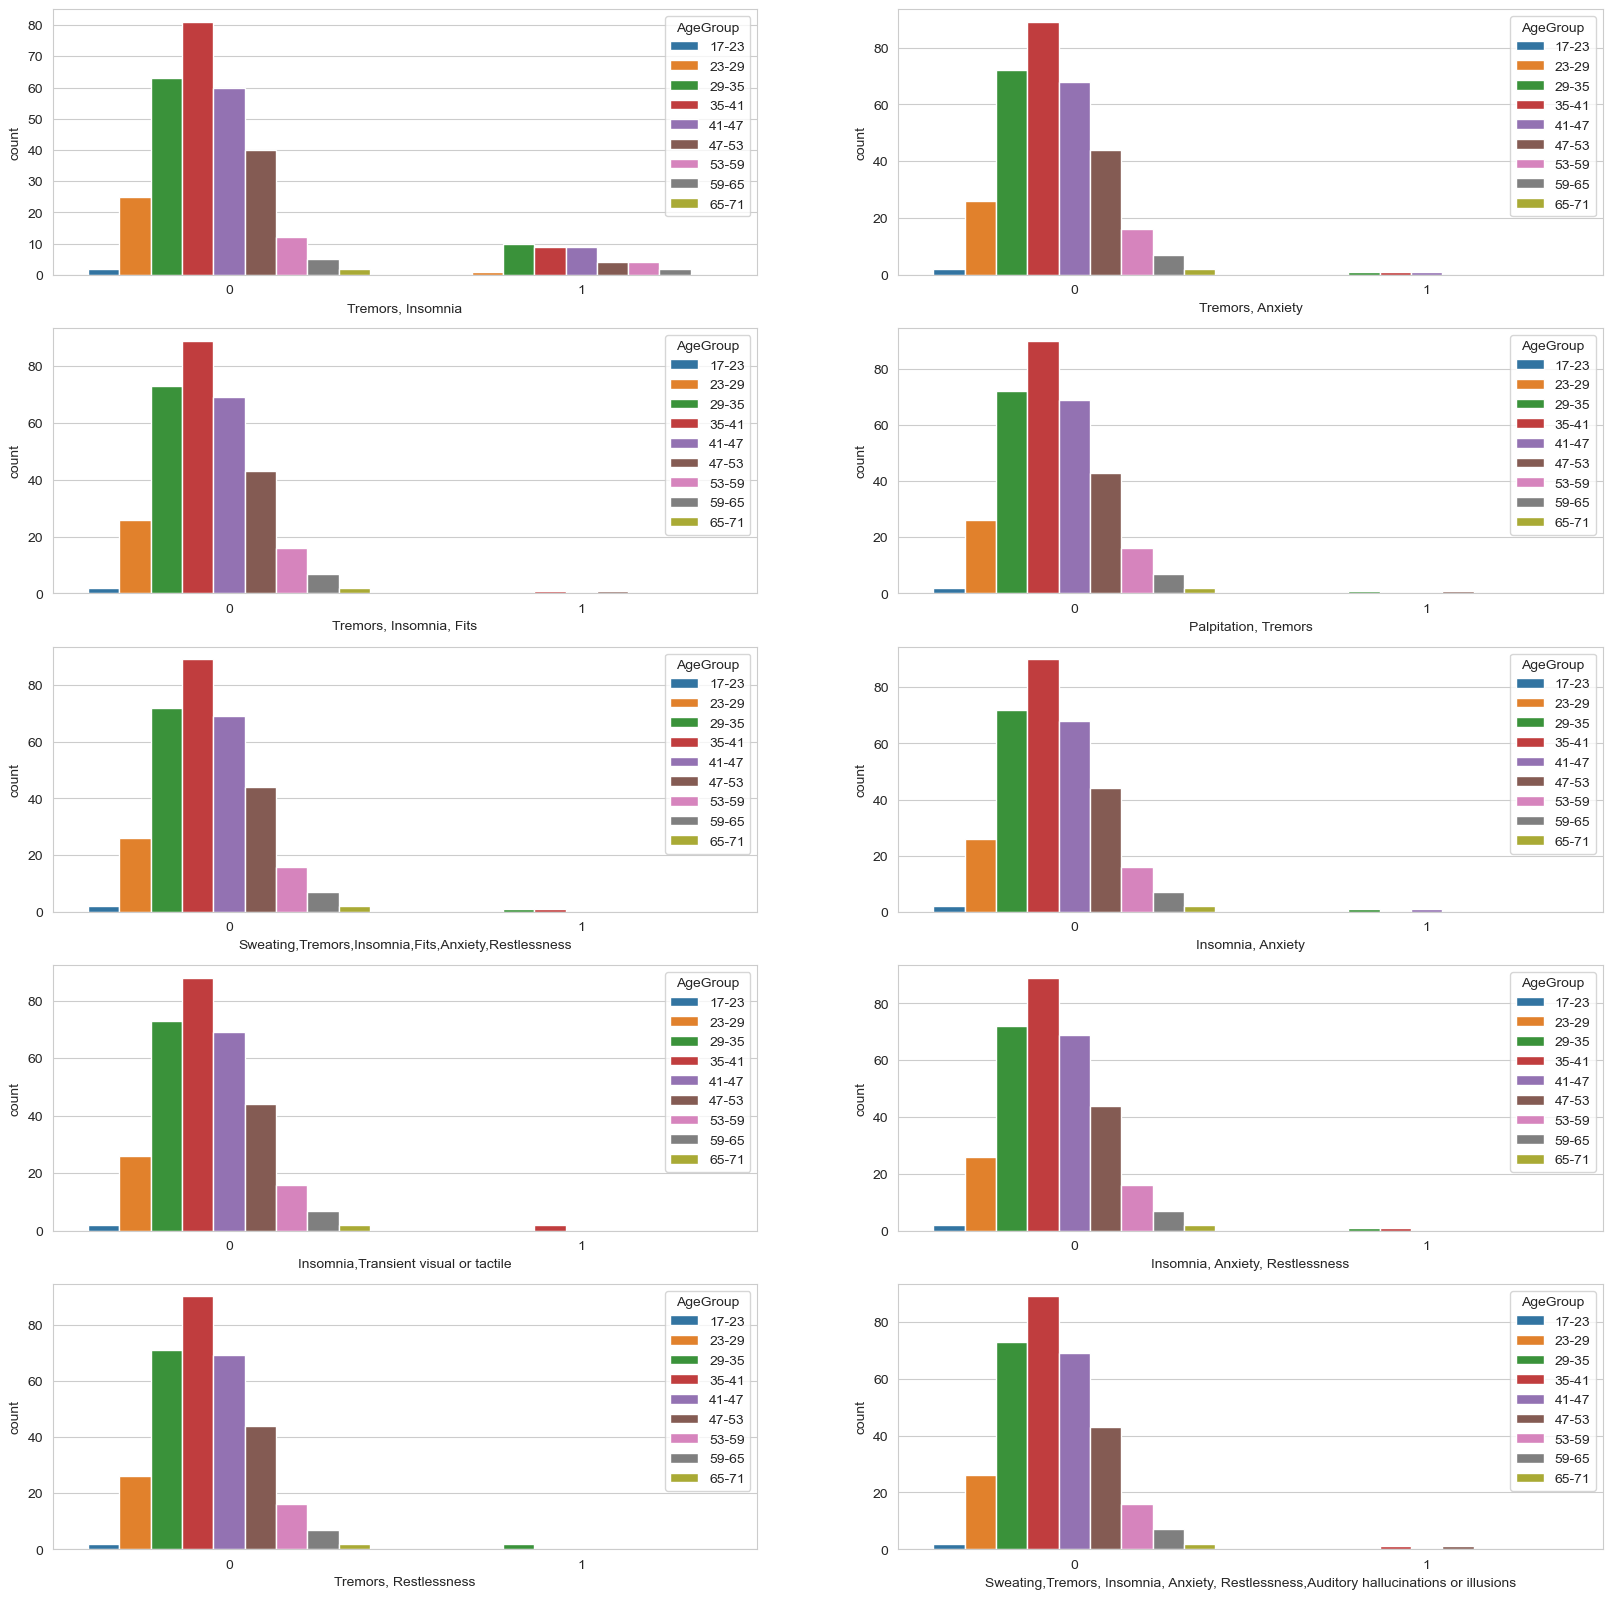

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a list of variables or column names
variables = ['Tremors, Insomnia','Tremors, Anxiety','Tremors, Insomnia, Fits','Palpitation, Tremors','Sweating,Tremors,Insomnia,Fits,Anxiety,Restlessness','Insomnia, Anxiety','Insomnia,Transient visual or tactile','Insomnia, Anxiety, Restlessness','Tremors, Restlessness','Sweating,Tremors, Insomnia, Anxiety, Restlessness,Auditory hallucinations or illusions','Tremors, Insomnia']

# Calculate the number of rows and columns for the subplots
num_rows = 5
num_cols = 2

# Create subplots for the variables
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))


# Flatten the axs array for easier indexing
axs = axs.flatten()

# Iterate over variables and create countplots
for i, variable in enumerate(variables):
    sns.countplot(x=variable,hue = 'AgeGroup', data=data, ax=axs[i])
    #axs[i].set_title(f'Countplot of {variable}')
    axs[i].set_xlabel(variable)
    #ax.bar_label(ax.containers[0],size=10)
    #ax.bar_label(ax.containers[1],size=10)

# Remove any unused subplots
if len(variables) < num_rows * num_cols:
    for j in range(len(variables), num_rows * num_cols):
        fig.delaxes(axs[j])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=3)  

# Show the plot
plt.show()

In [73]:
TI=0
for index, row in data.iterrows():
    if row['Tremors, Insomnia'] == 1 and row['AgeGroup'] == '35-41':
        TI += 1

print(TI)


TA=0
for index, row in data.iterrows():
    if row['Sweating,Tremors,Insomnia,Fits,Anxiety,Restlessness'] == 1 and row['AgeGroup'] == '35-41':
        TA += 1
print(TA)


IA=0
for index, row in data.iterrows():
    if row['Insomnia, Anxiety'] == 1 and row['AgeGroup'] == '35-41':
        IA += 1

print(IA)


TR=0
for index, row in data.iterrows():
    if row['Tremors, Restlessness'] == 1 and row['AgeGroup'] == '35-41':
        TR += 1

print(TR)



s=0
for index, row in data.iterrows():
    if row['Sweating'] == 1 and row['AgeGroup'] == '35-41':
        s += 1

print(s)



STI=0
x = 0
for index, row in data.iterrows():
    if row['Sweating, Tremors, Insomnia'] == 1 and row['AgeGroup'] == '35-41':
        STI=STI+1
print(STI)


STIAR=0
x = 0
for index, row in data.iterrows():
    if row['Sweating, Tremors, Insomnia, Anxiety, Restlessness'] == 1 and row['AgeGroup'] == '35-41':
        STIAR=STIAR+1
print(STIAR)


T=0
x = 0
for index, row in data.iterrows():
    if row['Tremors'] == 1 and row['AgeGroup'] == '35-41':
         T=T+1
print(T)

I=0
for index, row in data.iterrows():
    if row['Insomnia'] == 1 and row['AgeGroup'] == '35-41':
        I += 1

print(I)



r=0
for index, row in data.iterrows():
    if row['Restlessness'] == 1 and row['AgeGroup'] == '35-41':
        r += 1

print(r)

9
1
0
0
0
4
2
8
6
3


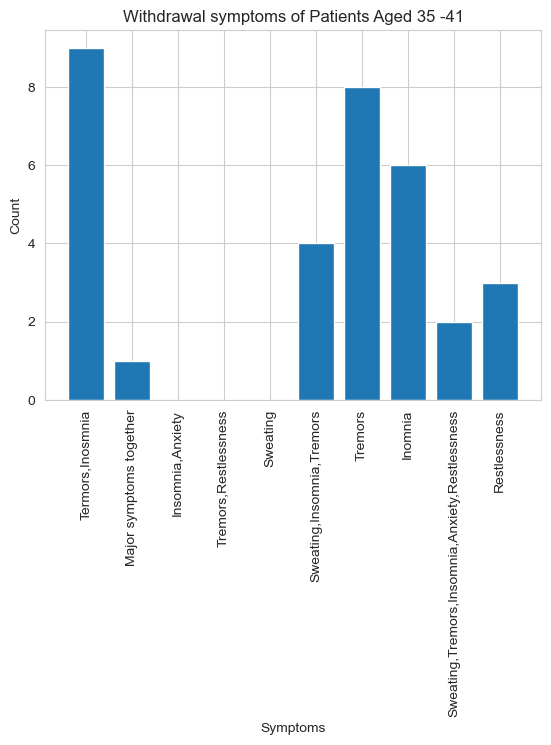

In [74]:
import matplotlib.pyplot as plt

values = [TI, TA, IA, TR, s, STI, T, I, STIAR, r]  # Replace with your variable values
labels = ['Termors,Inosmnia', 'Major symptoms together', 'Insomnia,Anxiety', 'Tremors,Restlessness','Sweating','Sweating,Insomnia,Tremors', 'Tremors', 'Inomnia', 'Sweating,Tremors,Insomnia,Anxiety,Restlessness', 'Restlessness']
# Create a bar graph
plt.bar(labels, values)

# Set the title and axis labels
plt.title('Withdrawal symptoms of Patients Aged 35 -41')
plt.xlabel('Symptoms')
plt.ylabel('Count')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the graph
plt.show()

# Duration of use of alcohol v/s Period of Sober

Text(0.5, 1.0, 'Count of Patients in a particular Period of sober and their Duration of use of alcohol')

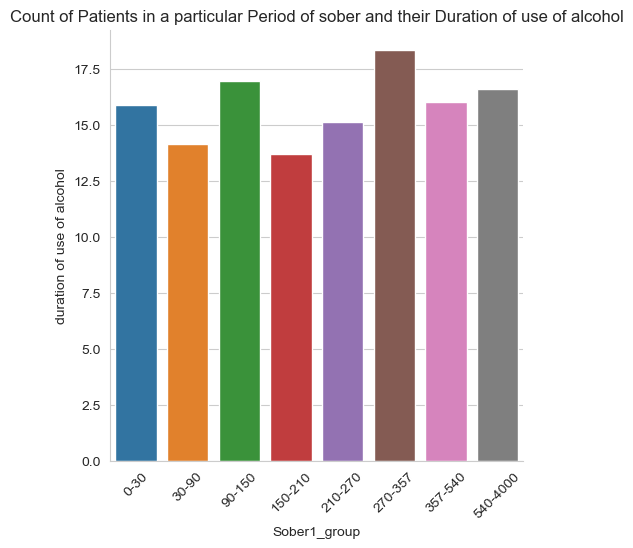

In [75]:
sns.catplot(data=data, y='duration of use of alcohol', x='Sober1_group', kind='bar', ci=None)
plt.xticks(rotation=45)
plt.title('Count of Patients in a particular Period of sober and their Duration of use of alcohol')

# Duartion of use of Alcohol v/s AgeGroup

Text(0.5, 1.0, 'Count of Patients in a particular AgeGroup and their Duration of use of alcohol')

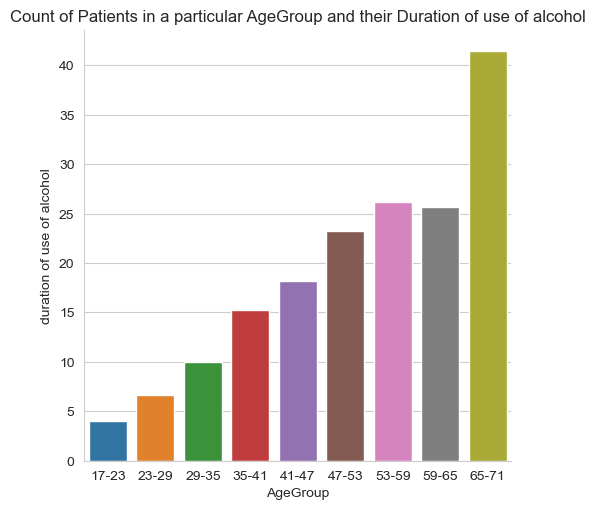

In [76]:
sns.catplot(data=data, y='duration of use of alcohol', x='AgeGroup', kind='bar', ci=None)
plt.title('Count of Patients in a particular AgeGroup and their Duration of use of alcohol')

# Nicotine Consumption v/s Period of Sober

Text(0.5, 1.0, 'Nicotine Consumption based on Period Of Sober')

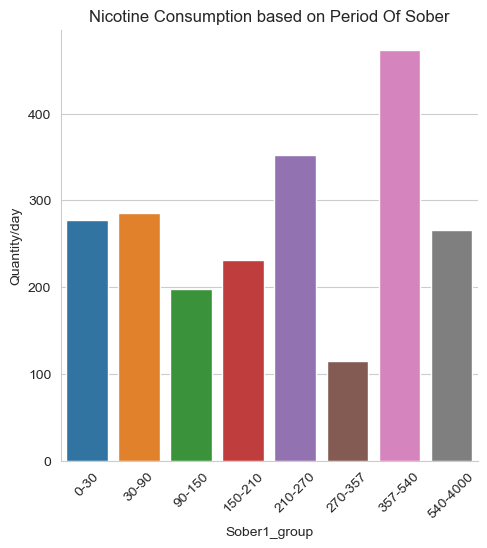

In [77]:
sns.catplot(data=data, x='Sober1_group', y='Quantity/day', kind='bar', ci=None)
plt.xticks(rotation=45)
plt.title('Nicotine Consumption based on Period Of Sober')

# Nicotine Consumption v/s AgeGroup

Text(0.5, 1.0, 'Nicotin Consumption Based on Age Group')

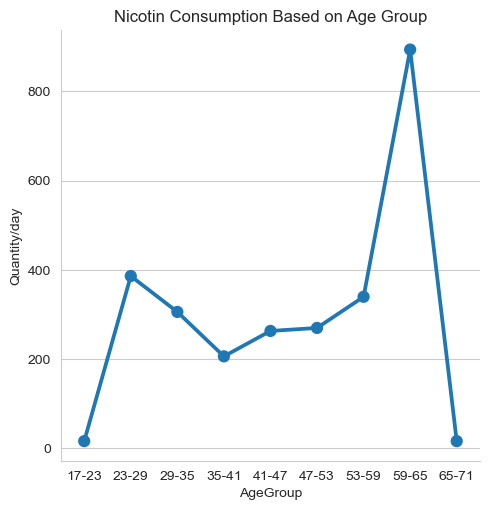

In [78]:
sns.catplot(data=data, x = 'AgeGroup', y = 'Quantity/day', kind='point', ci=None)
plt.title('Nicotin Consumption Based on Age Group')

# Count of Patients in a particular Period of sober and their Chronic Probelms

[Text(0.5, 1.0, 'Count of Patients in a particular Period of sober and their Chronic Probelms')]

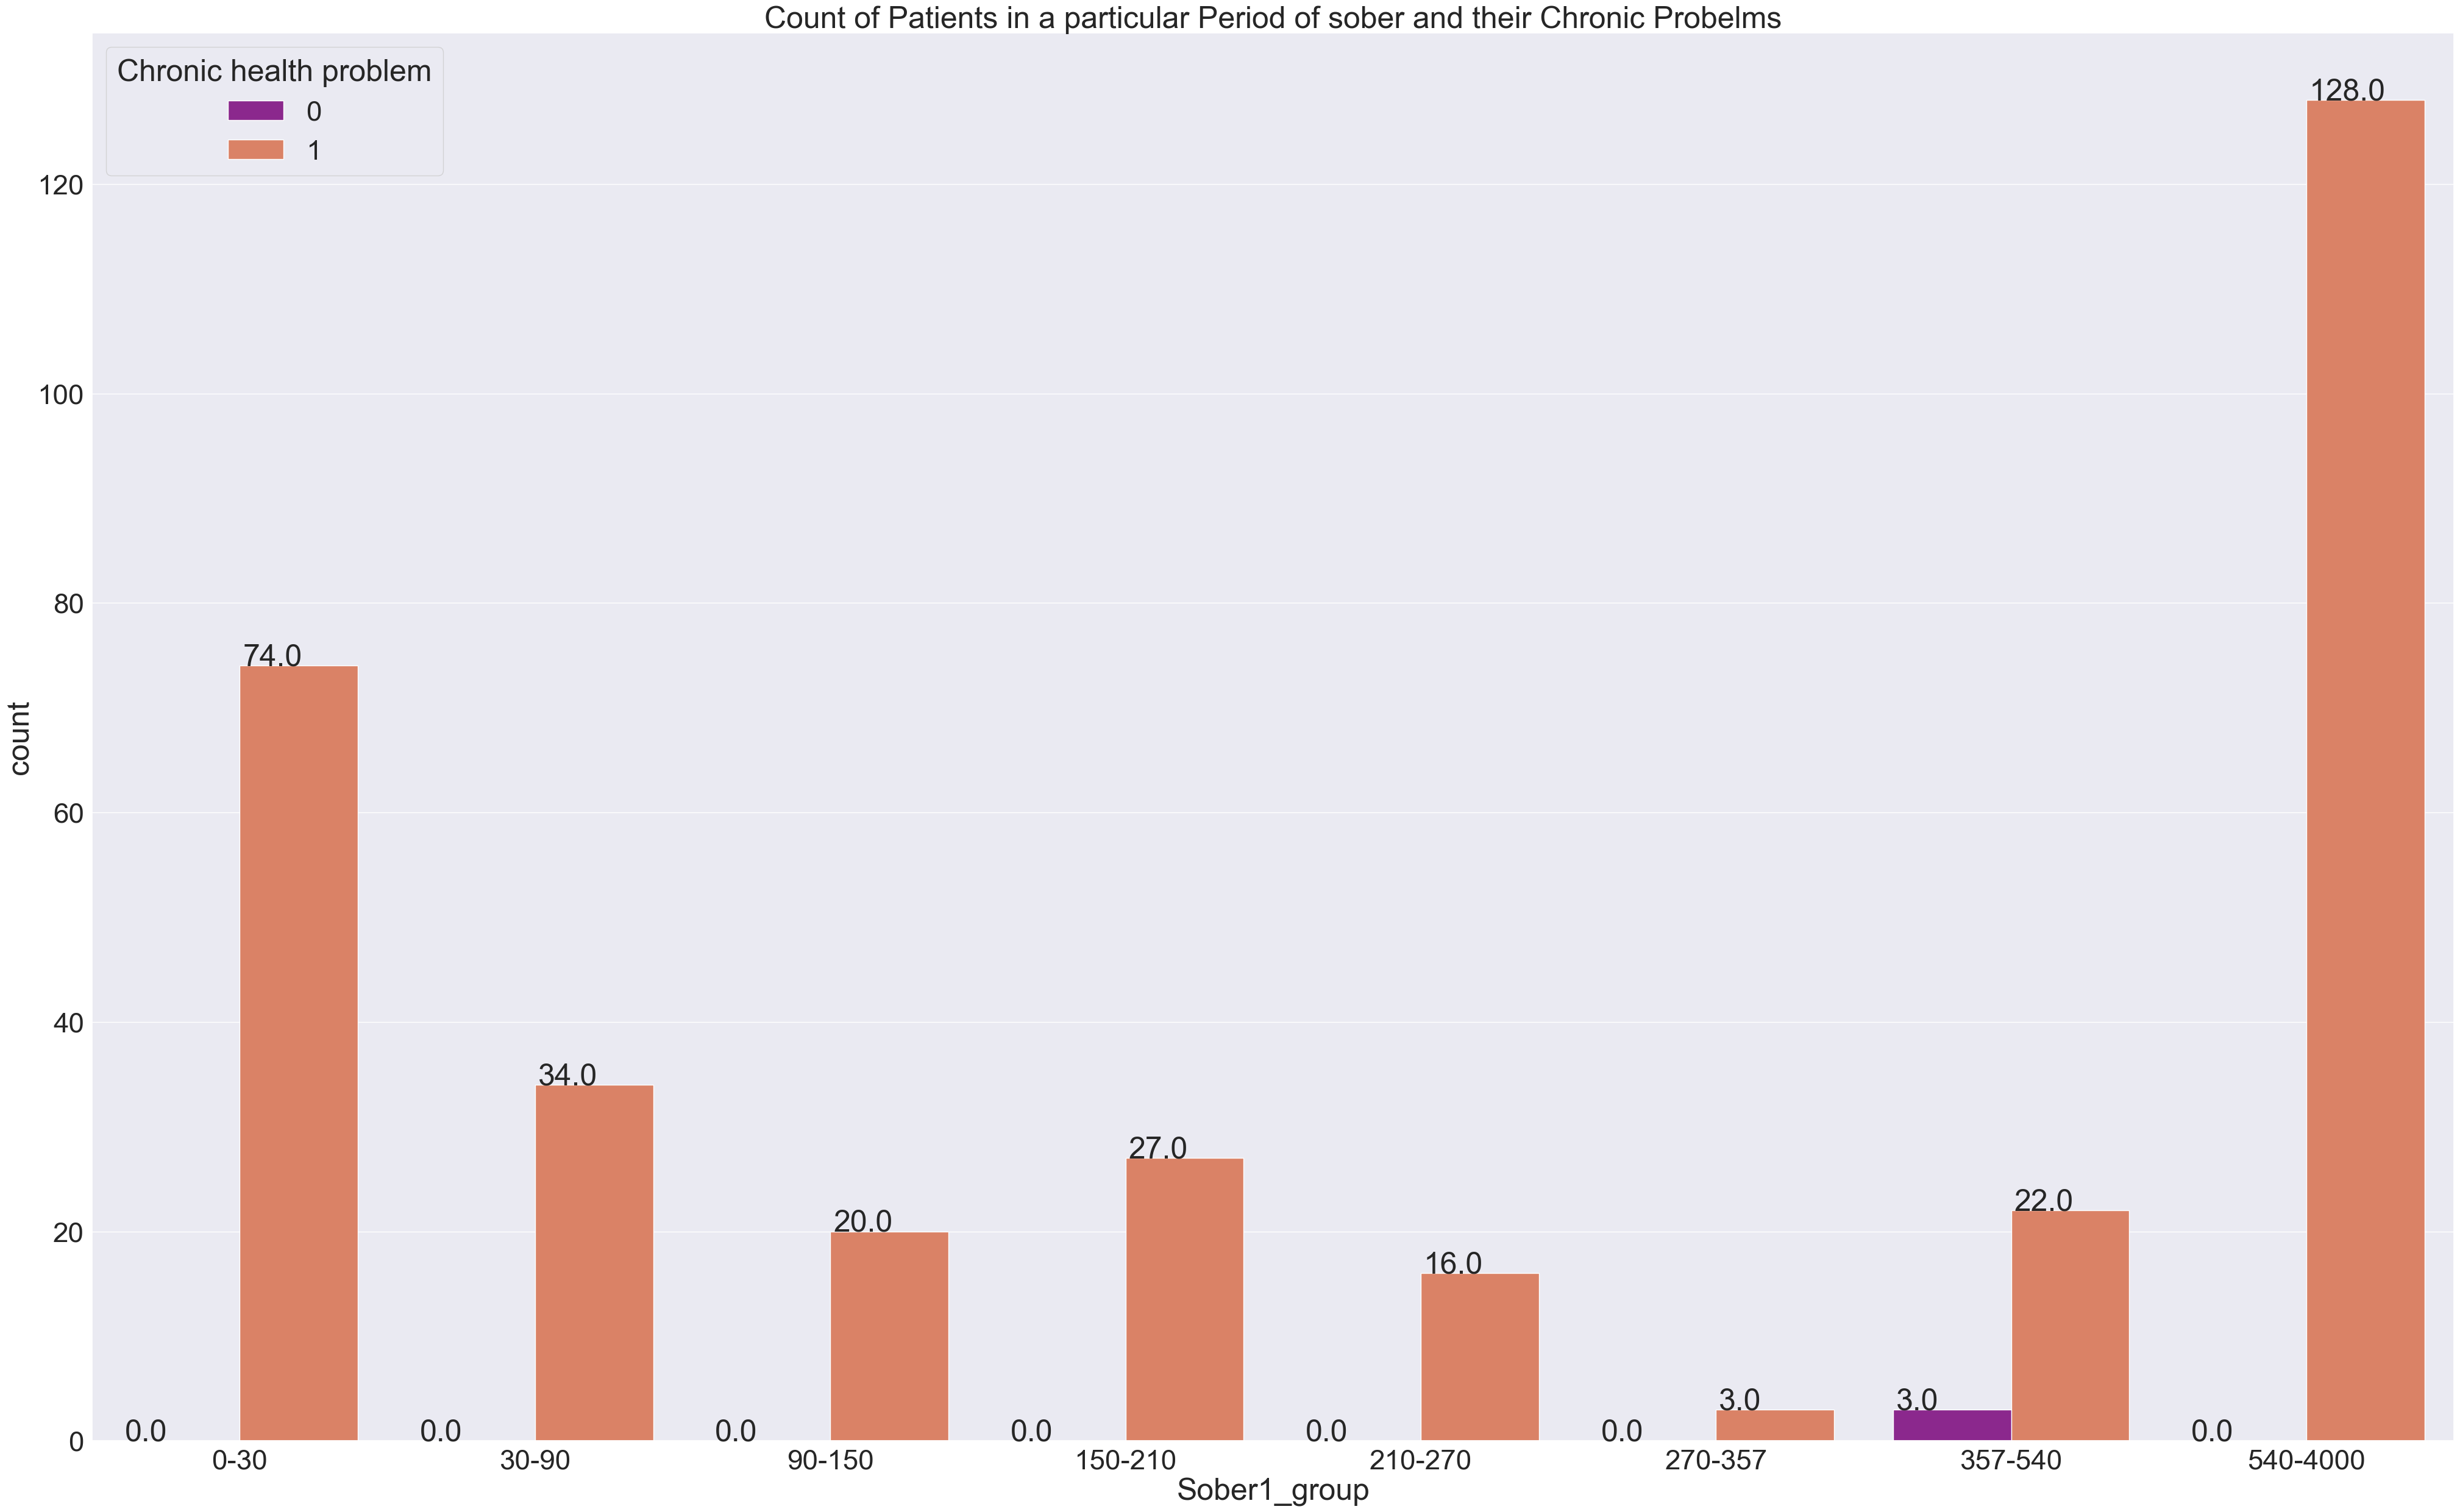

In [96]:
sns.set(rc = {'figure.figsize':(50,30)},font_scale = 3)
ax2 = sns.countplot(data = data,x = 'Sober1_group',hue = 'Chronic health problem', palette='plasma')
for p in ax2.patches:
    ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.01))
ax2.set(title = 'Count of Patients in a particular Period of sober and their Chronic Probelms')

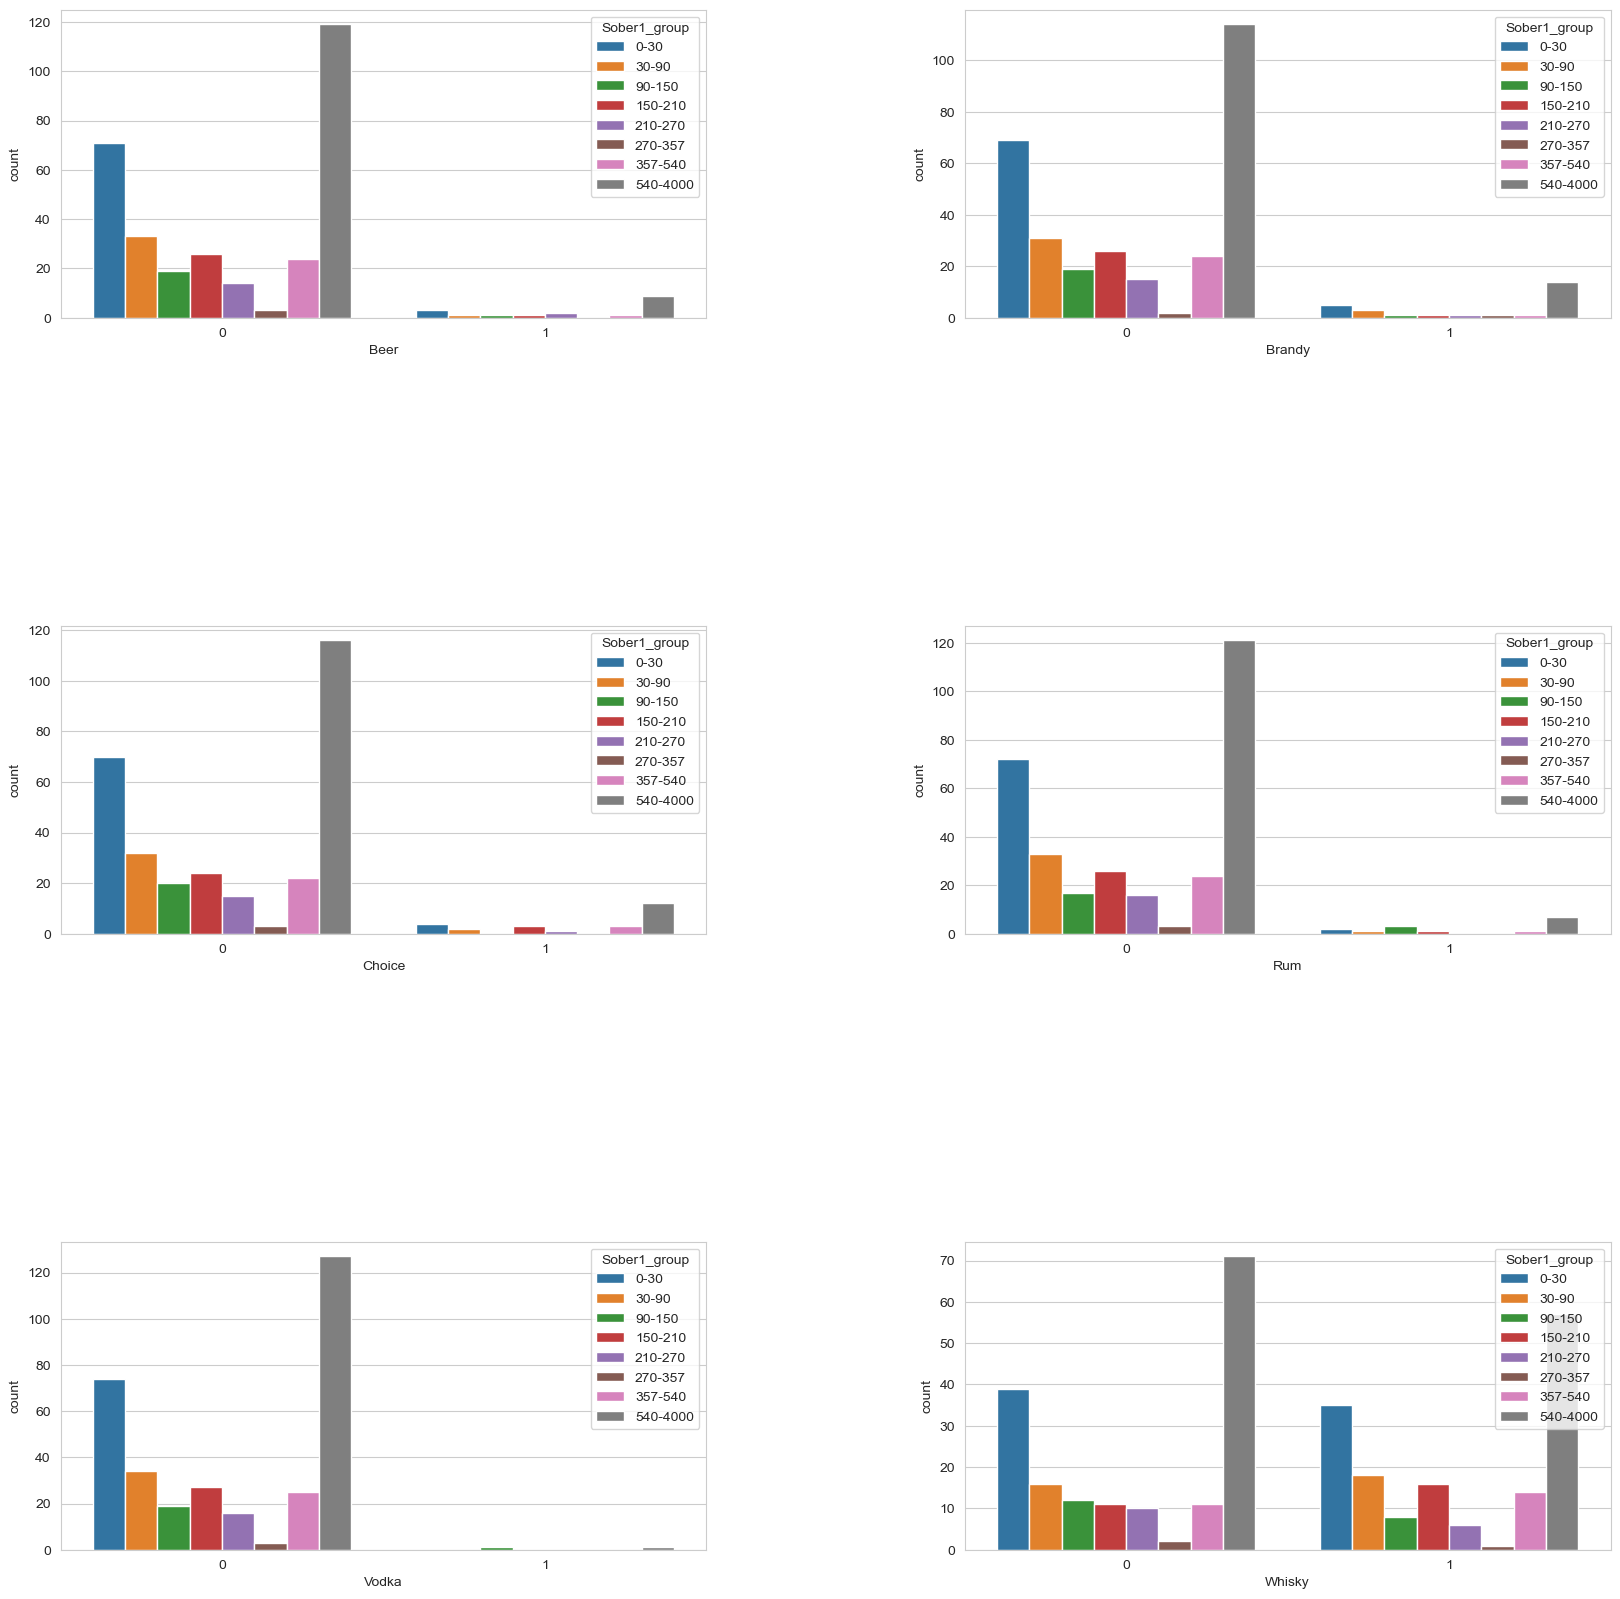

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a list of variables or column names
variables = ['Beer','Brandy','Choice','Rum','Vodka','Whisky']

# Calculate the number of rows and columns for the subplots
num_rows = 3
num_cols = 2

# Create subplots for the variables
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))


# Flatten the axs array for easier indexing
axs = axs.flatten()

# Iterate over variables and create countplots
for i, variable in enumerate(variables):
    sns.countplot(x=variable,hue = 'Sober1_group', data=data, ax=axs[i])
    #axs[i].set_title(f'Countplot of {variable}')
    axs[i].set_xlabel(variable)
    #ax.bar_label(ax.containers[0],size=10)
    #ax.bar_label(ax.containers[1],size=10)

# Remove any unused subplots
if len(variables) < num_rows * num_cols:
    for j in range(len(variables), num_rows * num_cols):
        fig.delaxes(axs[j])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=1)  

# Show the plot
plt.show()


# Alcohol Brand WRT to Age Group

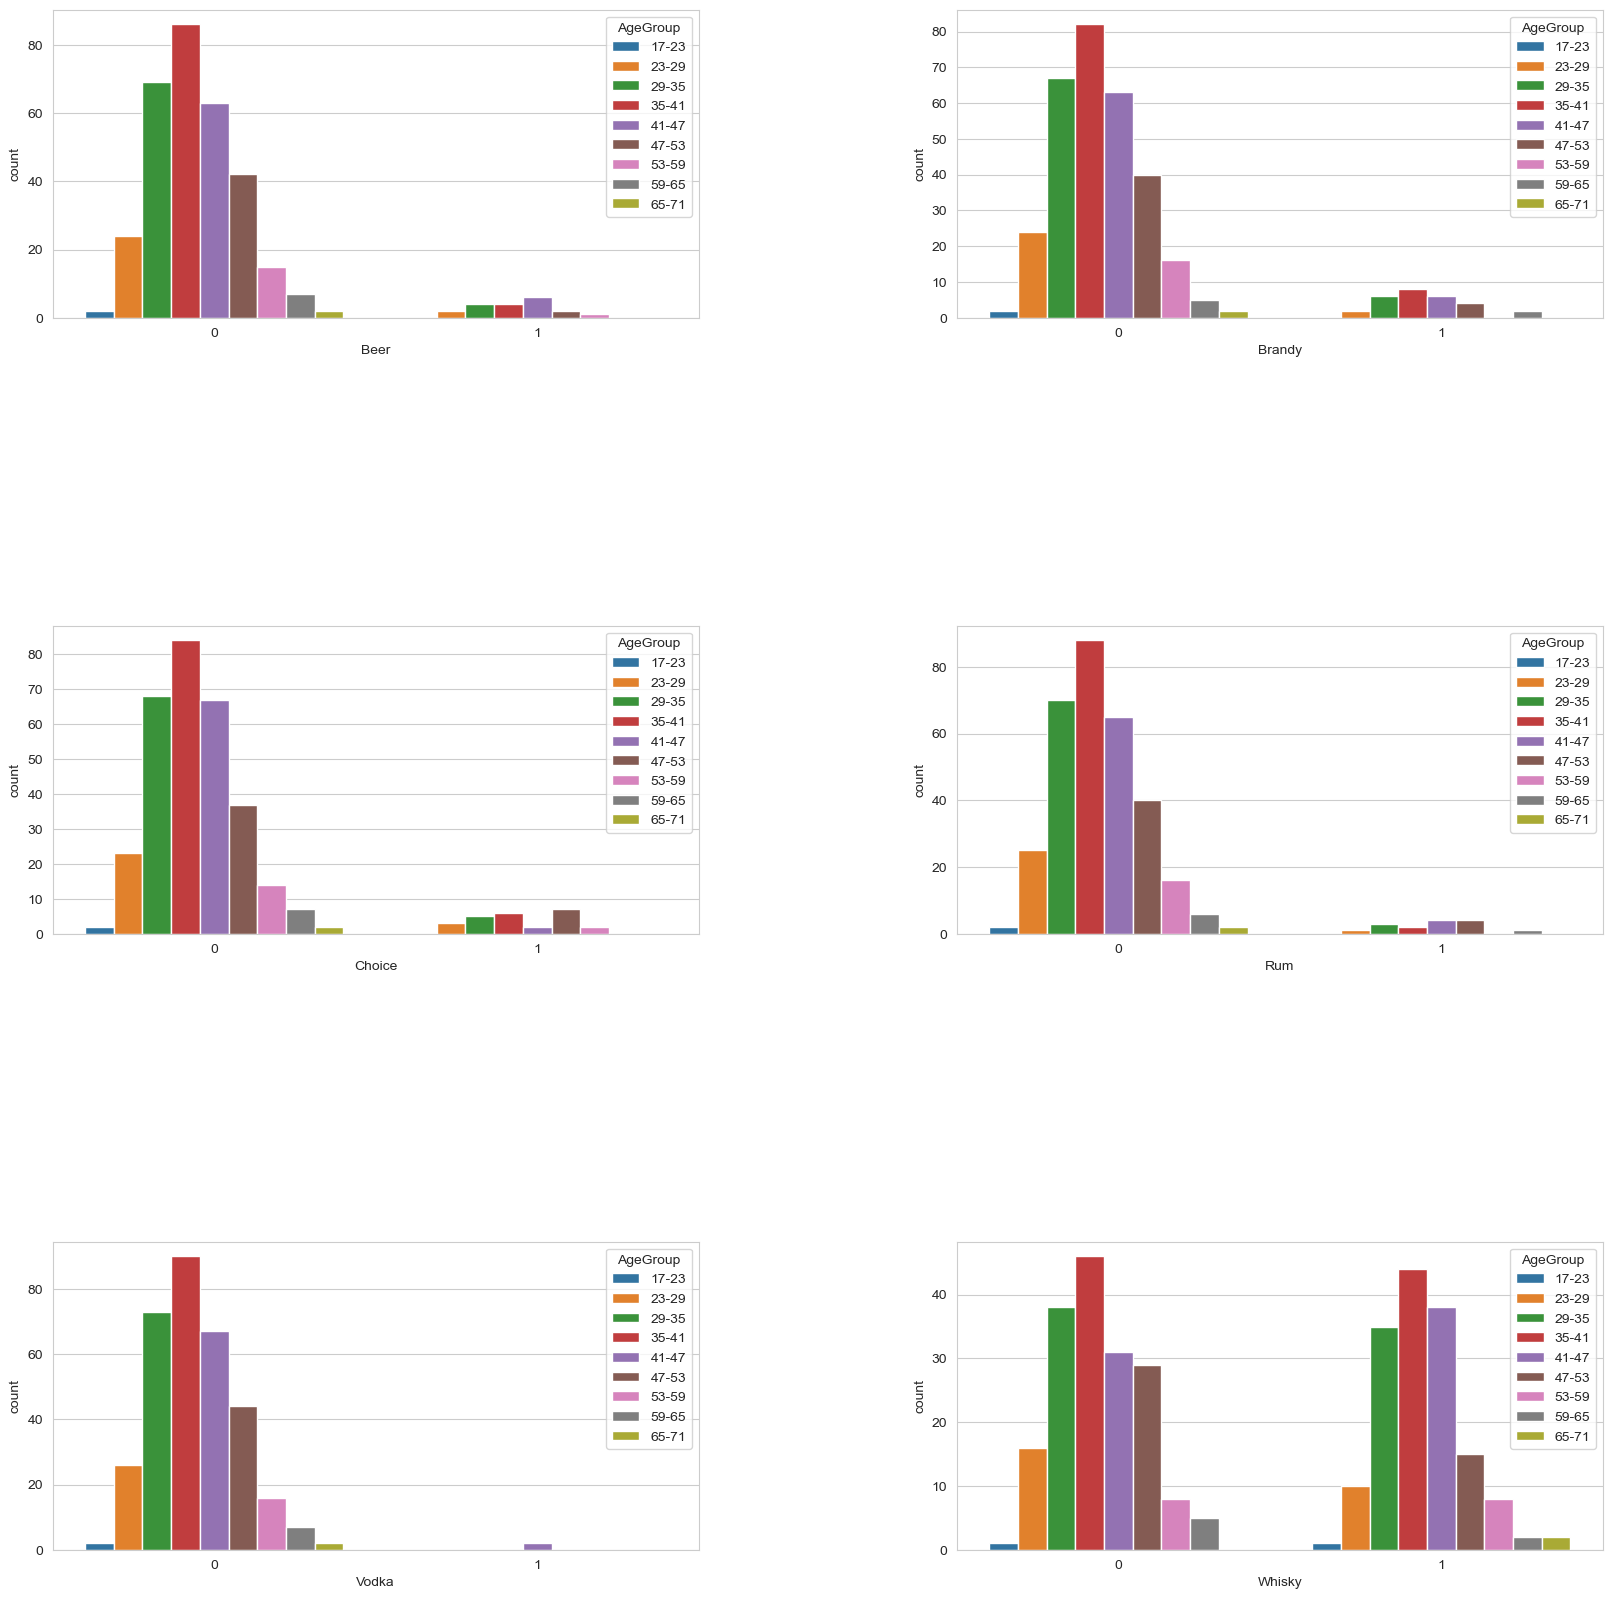

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a list of variables or column names
variables = ['Beer','Brandy','Choice','Rum','Vodka','Whisky']

# Calculate the number of rows and columns for the subplots
num_rows = 3
num_cols = 2

# Create subplots for the variables
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))


# Flatten the axs array for easier indexing
axs = axs.flatten()

# Iterate over variables and create countplots
for i, variable in enumerate(variables):
    sns.countplot(x=variable,hue = 'AgeGroup', data=data, ax=axs[i])
    #axs[i].set_title(f'Countplot of {variable}')
    axs[i].set_xlabel(variable)
    #ax.bar_label(ax.containers[0],size=10)
    #ax.bar_label(ax.containers[1],size=10)

# Remove any unused subplots
if len(variables) < num_rows * num_cols:
    for j in range(len(variables), num_rows * num_cols):
        fig.delaxes(axs[j])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=1)  

# Show the plot
plt.show()

In [81]:
b=0
for index, row in data.iterrows():
    if row['Beer'] == 1 and row['Sober1_group'] == '90-150':
        b += 1
print(b)


br=0
for index, row in data.iterrows():
    if row['Brandy'] == 1 and row['Sober1_group'] == '90-150':
        br += 1
print(br)



v=0
for index, row in data.iterrows():
    if row['Vodka'] == 1 and row['Sober1_group'] == '90-150':
        v += 1
print(v)



w=0
for index, row in data.iterrows():
    if row['Whisky'] == 1 and row['Sober1_group'] == '90-150':
        w += 1
print(w)


r=0
for index, row in data.iterrows():
    if row['Rum'] == 1 and row['Sober1_group'] == '90-150':
        r += 1
print(r)


c=0
for index, row in data.iterrows():
    if row['Choice'] == 1 and row['Sober1_group'] == '90-150':
        c += 1
print(c)


1
1
1
8
3
0


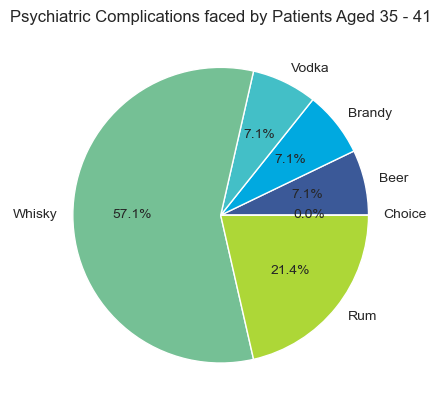

In [82]:
import matplotlib.pyplot as plt

values = [b,br,v,w,r,c]  # Replace with your variable values
labels = ['Beer','Brandy','Vodka','Whisky','Rum','Choice']

# Create a bar graph
colours = ['#3B5998', '#00A9E0', '#43BFC7', '#75C095', '#ADD737', '#F5CB5C', '#FFA11C']

# Create a pie chart with the custom color palette
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colours)

# Set the title
plt.title('Psychiatric Complications faced by Patients Aged 35 - 41')

# Display the chart
plt.show()

# Risk Level WRT to Period of Sober

In [84]:
bins= [0,100,200,300,400,500]
label = ['0-100','100-200','200-300','300-400','400-500']
data['risk_level'] = pd.cut(data['abv_risk'], bins=bins, labels=label, right=False)

In [85]:
data['risk_level'].value_counts()

100-200    157
200-300     80
0-100       64
300-400     22
400-500      4
Name: risk_level, dtype: int64

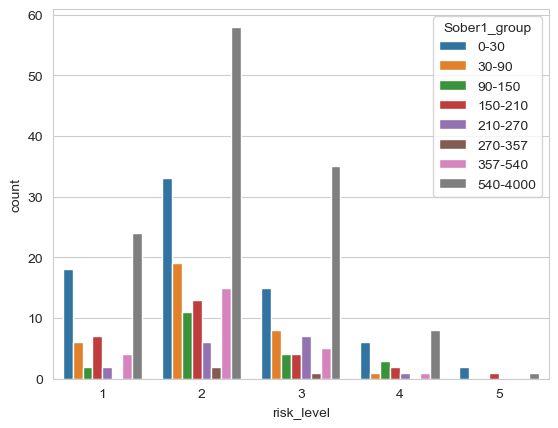

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' and want to create a catplot

# Create the catplot
cat_plot = sns.countplot(data=data, x='risk_level', hue='Sober1_group')

# Customize the x-axis labels
cat_plot.set_xticklabels(['1','2','3','4','5'])

# Set the axis labels


# Show the plot
plt.show()

In [87]:
counts = data.groupby(['Sober1_group', 'risk_level']).size().reset_index(name='Count')
counts

Sober1_group risk_level  Count
0          0-30      0-100     18
1          0-30    100-200     33
2          0-30    200-300     15
3          0-30    300-400      6
4          0-30    400-500      2
5         30-90      0-100      6
6         30-90    100-200     19
7         30-90    200-300      8
8         30-90    300-400      1
9         30-90    400-500      0
10       90-150      0-100      2
11       90-150    100-200     11
12       90-150    200-300      4
13       90-150    300-400      3
14       90-150    400-500      0
15      150-210      0-100      7
16      150-210    100-200     13
17      150-210    200-300      4
18      150-210    300-400      2
19      150-210    400-500      1
20      210-270      0-100      2
21      210-270    100-200      6
22      210-270    200-300      7
23      210-270    300-400      1
24      210-270    400-500      0
25      270-357      0-100      0
26      270-357    100-200      2
27      270-357    200-300      1
28      270-357    300-400      0
29      270-357    400-500      0
30      357-540      0-100      4
31      357-540    100-200     15
32      357-540    200-300      5
33      357-540    300-400      1
34      357-540    400-500      0
35     540-4000      0-100     24
36     540-4000    100-200     58
37     540-4000    200-300     35
38     540-4000    300-400      8
39     540-4000    400-500      1

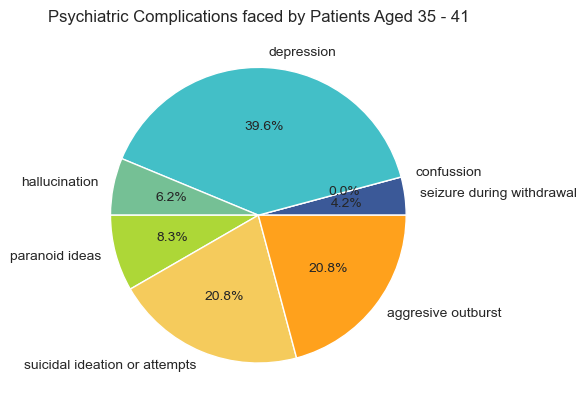

In [88]:
import matplotlib.pyplot as plt

values = [sdw, c, d, h, p, si, ar]  # Replace with your variable values
labels = ['seizure during withdrawal', 'confussion', 'depression', 'hallucination', 'paranoid ideas', 'suicidal ideation or attempts', 'aggresive outburst']

# Create a bar graph
colours = ['#3B5998', '#00A9E0', '#43BFC7', '#75C095', '#ADD737', '#F5CB5C', '#FFA11C']

# Create a pie chart with the custom color palette
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colours)

# Set the title
plt.title('Psychiatric Complications faced by Patients Aged 35 - 41')

# Display the chart
plt.show()

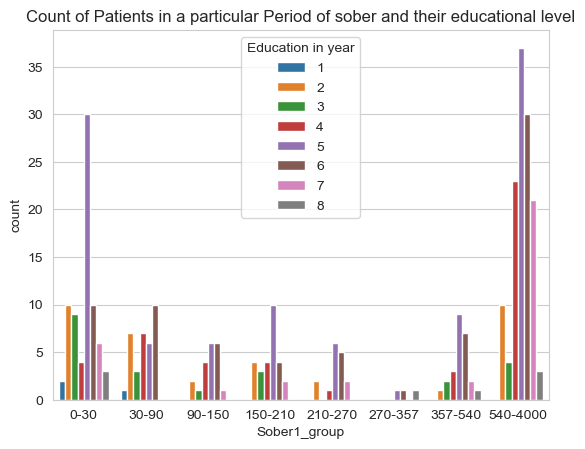

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' and want to create a catplot

# Create the catplot
cat_plot = sns.countplot(data=data, x='Sober1_group', hue='Education in year')

# Customize the x-axis labels
#cat_plot.set_xticklabels(['1','2','3','4','5','6','7'])

# Set the axis labels
plt.title('Count of Patients in a particular Period of sober and their educational level')

# Show the plot
plt.show()

In [90]:
data['Occupation'].value_counts()

1    99
2    90
3    64
4    33
5    20
6    17
7     6
Name: Occupation, dtype: int64

# Education v/s Period of Sober

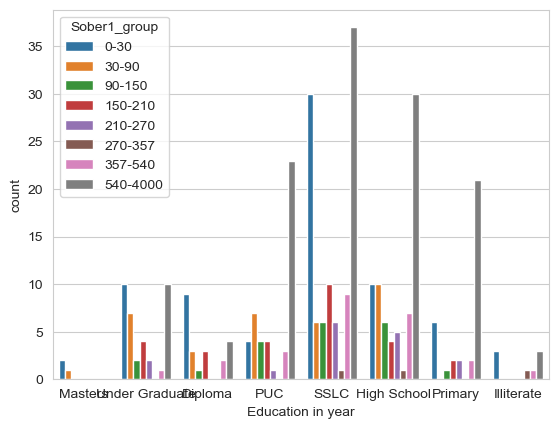

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' and want to create a catplot

# Create the catplot
cat_plot = sns.countplot(data=data, x='Education in year', hue='Sober1_group')

# Customize the x-axis labels
cat_plot.set_xticklabels(['Masters', 'Under Graduate', 'Diploma', 'PUC', 'SSLC', 'High School', 'Primary','Illiterate'])


# Show the plot
plt.show()

# Education V/s AgeGroup

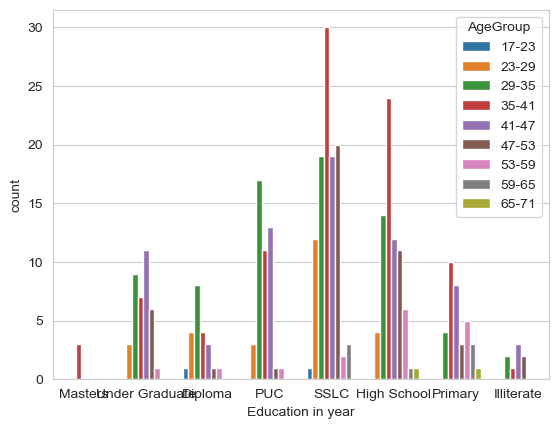

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' and want to create a catplot

# Create the catplot
cat_plot = sns.countplot(data=data, x='Education in year', hue='AgeGroup')

# Customize the x-axis labels
cat_plot.set_xticklabels(['Masters', 'Under Graduate', 'Diploma', 'PUC', 'SSLC', 'High School', 'Primary','Illiterate'])


# Show the plot
plt.show()

In [93]:
data

S.N  Age  Education in year  Occupation  Annual Income  Marital Status  \
0      1   48                  6           4          15000               1   
1      2   31                  6           3          80000               1   
2      3   34                  3           4          60000               0   
3      4   35                  3           4          75000               1   
4      5   41                  5           1          10000               1   
5      6   30                  4           1          50000               0   
6      7   45                  8           3          10000               1   
7      8   49                  2           6         600000               1   
8      9   50                  5           4         150000               1   
9     10   33                  2           4         600000               1   
10    11   46                  2           6         120000               1   
11    12   38                  5           2          50000               0   
12    13   29                  6           3          95000               0   
13    14   36                  5           1          50000               1   
14    15   41                  6           1         200000               1   
15    16   27                  4           4          30000               0   
16    17   39                  6           2          15000               0   
17    18   47                  6           2          80000               1   
18    19   45                  5           6         200000               0   
19    20   38                  5           1          20000               1   
20    21   23                  3           2         200000               0   
21    22   47                  3           1         100000               1   
22    23   42                  4           1          20000               0   
23    24   26                  5           1          35000               0   
24    25   41                  7           3          50000               1   
25    26   42                  4           3          35000               1   
26    27   44                  4           1          20000               1   
27    28   38                  6           2         100000               1   
28    29   33                  7           3          50000               1   
29    30   43                  2           5         150000               1   
30    31   61                  7           1          90000               1   
31    32   37                  2           6          50000               1   
32    33   27                  5           4          50000               0   
33    34   30                  5           2          15000               0   
34    35   45                  7           3          90000               1   
35    36   42                  2           5         200000               1   
36    37   49                  6           1          20000               1   
37    38   34                  5           2          30000               1   
38    39   39                  4           4         100000               1   
39    40   46                  4           6         100000               1   
40    41   45                  2           1         300000               1   
41    42   41                  2           3          50000               1   
42    43   25                  3           7          50000               0   
43    44   28                  2           7          50000               0   
44    45   46                  5           3          15000               1   
45    46   62                  7           2         100000               1   
46    47   42                  4           5         300000               1   
47    48   38                  7           3          50000               1   
48    49   42                  5           5          30000               1   
49    50   33                  6           2          5

IndexError: index 10 is out of bounds for axis 0 with size 10

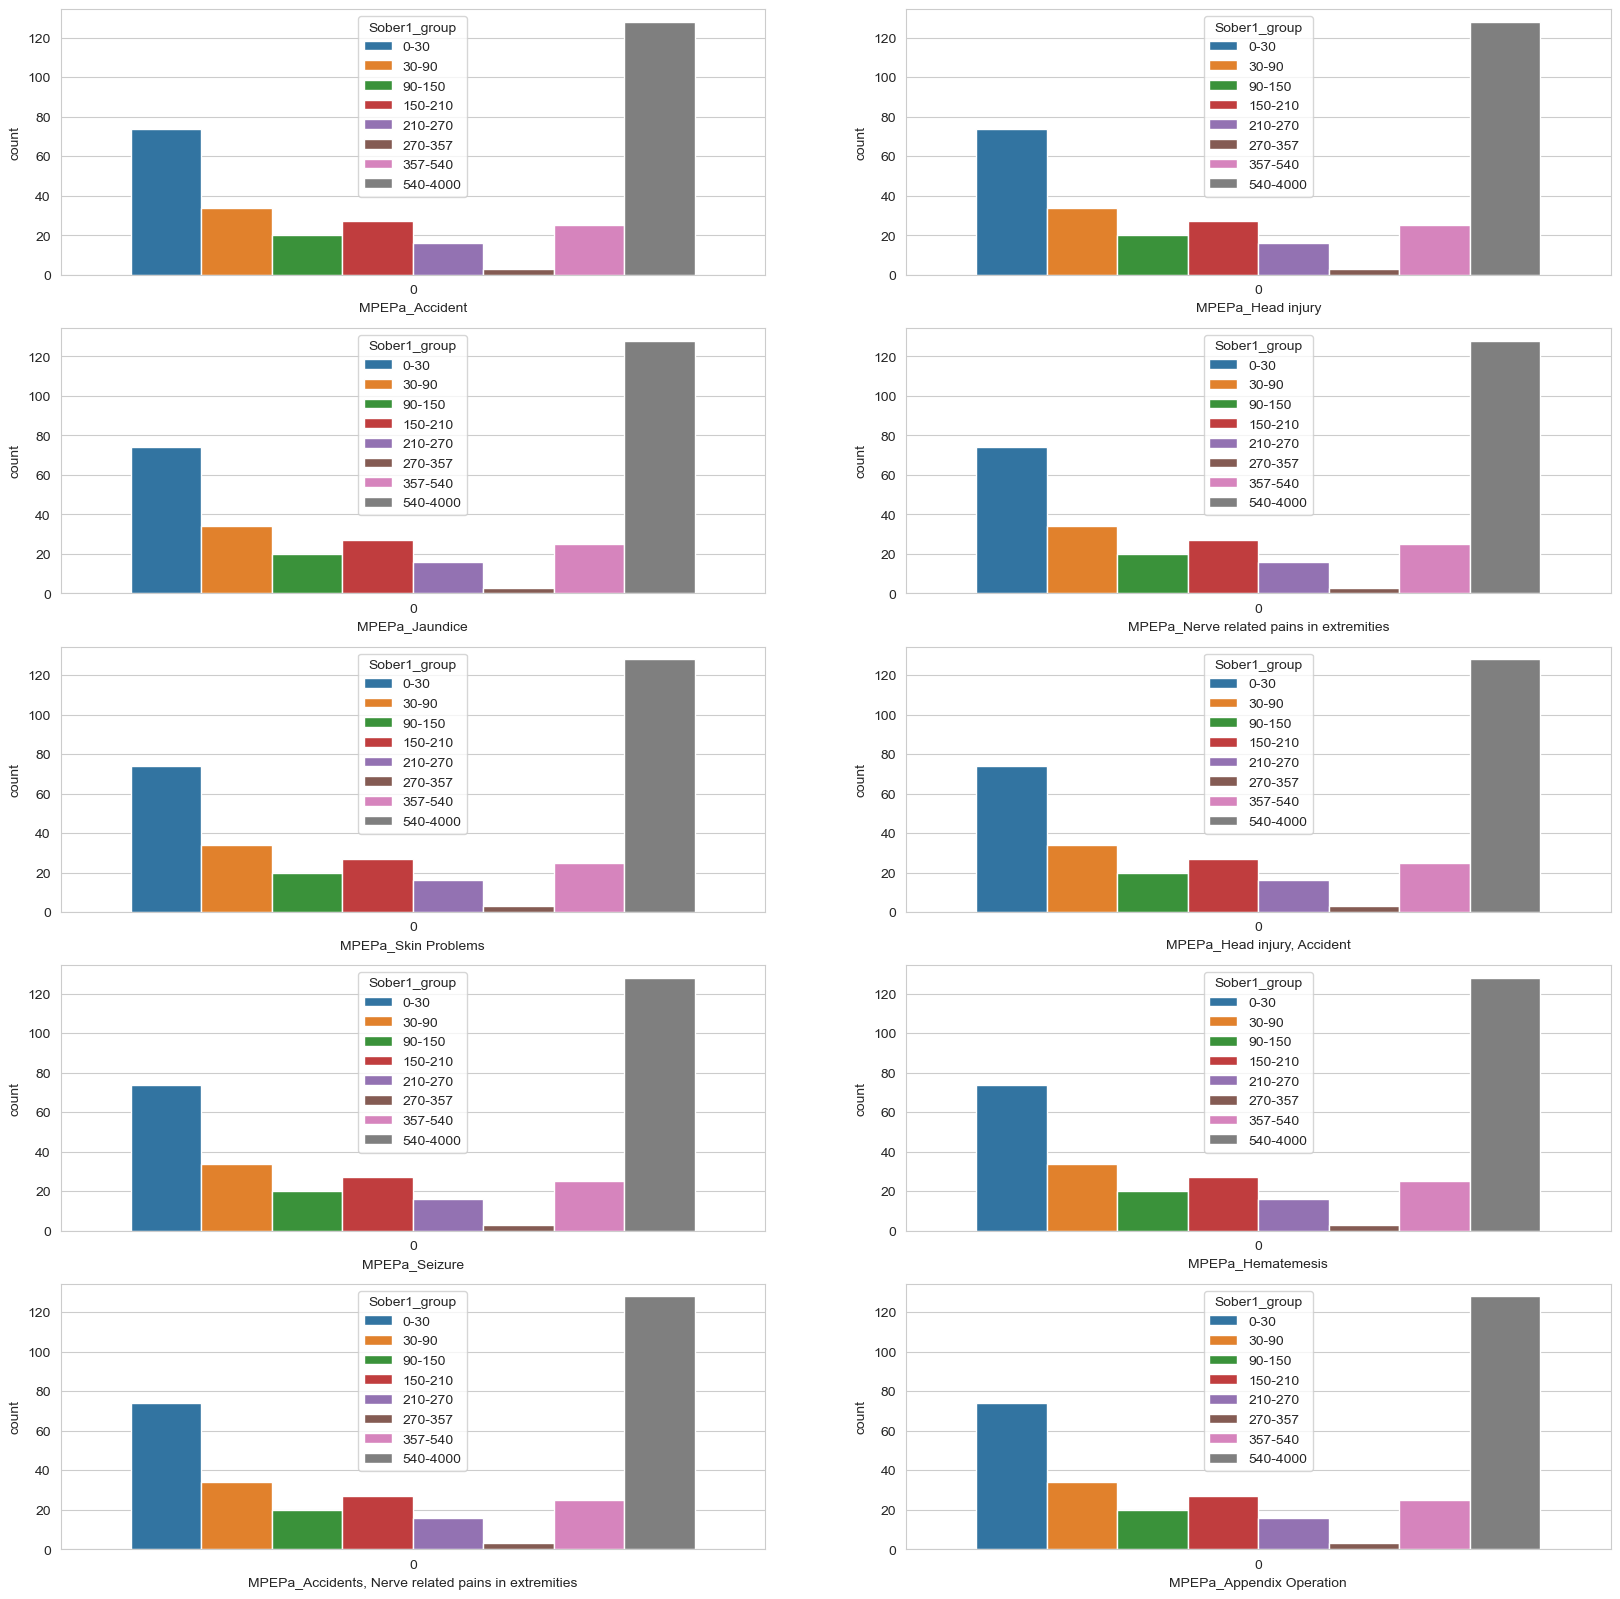

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a list of variables or column names
variables = ['MPEPa_Accident','MPEPa_Head injury','MPEPa_Jaundice','MPEPa_Nerve related pains in extremities','MPEPa_Skin Problems','MPEPa_Head injury, Accident','MPEPa_Seizure','MPEPa_Hematemesis','MPEPa_Accidents, Nerve related pains in extremities','MPEPa_Appendix Operation','MPEPa_Bleeding Piles','MPEPa_Accident, Bleeding Piles']

# Calculate the number of rows and columns for the subplots
num_rows = 5
num_cols = 2

# Create subplots for the variables
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))


# Flatten the axs array for easier indexing
axs = axs.flatten()

# Iterate over variables and create countplots
for i, variable in enumerate(variables):
    sns.countplot(x=variable,hue = 'Sober1_group', data=data, ax=axs[i])
    #axs[i].set_title(f'Countplot of {variable}')
    axs[i].set_xlabel(variable)
    #ax.bar_label(ax.containers[0],size=10)
    #ax.bar_label(ax.containers[1],size=10)

# Remove any unused subplots
if len(variables) < num_rows * num_cols:
    for j in range(len(variables), num_rows * num_cols):
        fig.delaxes(axs[j])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=3)  

# Show the plot
plt.show()

# Model Building

In [102]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# Step 1: Load the data


# Step 2: Preprocess the data (if necessary)
# Perform any required preprocessing steps, such as handling missing values or encoding categorical variables.

# Step 3: Split the data into train and test sets
X = data.drop('Period of Sober1', axis=1)  # Features (input variables)
y = data['Period of Sober1']  # Target variable (output variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Perform feature selection with SelectKBest
k = 30  # Number of top features to select

# Initialize SelectKBest with the desired score function (e.g., f_classif for classification)
feature_selector = SelectKBest(score_func=f_classif, k=k)

# Fit feature selector to the training data
feature_selector.fit(X_train, y_train)

# Transform the feature matrices to include only the selected features
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

# Get the indices of the selected features
selected_feature_indices = feature_selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X_train.columns[selected_feature_indices]

# Print the selected features
print("Selected features:", selected_features)


Selected features: Index(['S.N', 'Age', 'Education in year', 'Nicotine (yes/NO)',
       'Family history of alcoholism / drug abuse, if any (who and which type of drug)',
       'to feel better and confident or happy',
       'weak mainded & weak personality', 'absent',
       'family or relationship issues', 'PCP_confusion', 'PCP_hallucinations',
       'PCP_confusion and hallucinations', 'Year of Treatment (First time)',
       'Year of Treatment (Second time)',
       'Number of relapses (based on period of sober)', 'Any', 'Beer', 'Rum',
       'Ambivalent', 'Willing', 'High', 'Low', 'Insomnia',
       'Tremors, Insomnia, Anxiety', 'Tremors, Insomnia, Fits',
       'Palpitation, Tremors', 'Insomnia, Anxiety',
       'Insomnia,Transient visual or tactile', 'Tremors, Restlessness',
       'Sweating,Tremors, Insomnia, Anxiety, Restlessness,Auditory hallucinations or illusions'],
      dtype='object')


In [104]:
data=data[['S.N',
 'Age',
 'AAO for alcohol in year',
  'avarage units used in last 30days',
 'duration of use of alcohol',
 'family or relationship issues',
 'Year of Treatment (First time)',
 'Tremors, Insomnia, Fits',
 'Insomnia, Anxiety',
 'Insomnia,Transient visual or tactile',
 'Sweating,Tremors, Insomnia, Anxiety, Restlessness,Auditory hallucinations or illusions',
 'Quantity/day',
 'Period of Treatment1',
'Period of Sober1',
          'Quantity/day','family or relationship issues','financial stress',
           'mentally stress','Number of relapses (based on treatment year)',
          'abv_risk','Whisky']].copy()

In [105]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


label_quality = LabelEncoder()
data['Period of Sober1'] = label_quality.fit_transform(data['Period of Sober1'])

#split the datest into 75% training and 25% test data
x_train,x_test,y_train,y_test = train_test_split(data,data['Period of Sober1'], test_size = 0.30, random_state = 150)

#Model Creation
models = [KNeighborsClassifier(),
         GaussianNB()]
model_names = ['KNearestNeighbors','GaussianNB']

#create model and evaluate accuracy
acc=[]
eval_acc={}

for model in range(len(models)):
    classification_model = models[model]
    classification_model.fit(x_train,y_train)
    pred = classification_model.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
eval_acc = {'Modelling Algorithm':model_names,'Accuracy':acc}
eval_acc

{'Modelling Algorithm': ['KNearestNeighbors', 'GaussianNB'],
 'Accuracy': [0.08080808080808081, 0.9090909090909091]}

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data from Excel
#data = pd.read_excel('data.xlsx', sheet_name='Sheet1')

# Prepare the data
X = data.iloc[:, :-1]  # Input features (all columns except the target variable column)
y = data['Period of Sober1']  # Target variable (specify the column name of the target variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Display the results
print("Coefficient of Determination (R-squared):", model.score(X_test, y_test))
print("Mean Squared Error:", mse)
print("Predictions:", y_pred)


# Co-relation Between Attributes And Period of Sober(0-30 days)

In [17]:
dataLessMonth=data[data['Sober1_group']=="0-30"].copy()

In [18]:
import pandas as pd
import scipy.stats as stats

# Assuming you have a DataFrame named 'data' and the target column is 'target_column_name'
target_column_name = 'Period of Sober1'

# Calculate the Spearman correlation coefficient and p-values
correlation_dict = {}
p_value_dict = {}
for column in dataLessMonth.columns:
    if column != target_column_name:  # Exclude the target column itself
        correlation, p_value = stats.spearmanr(dataLessMonth[target_column_name], dataLessMonth[column])
        correlation_dict[column] = correlation
        p_value_dict[column] = p_value

# Create a DataFrame to store the results
result_df = pd.DataFrame({'Spearman Correlation': correlation_dict, 'p-value': p_value_dict})

# Display the result
print(result_df)

                                                    Spearman Correlation  \
S.N                                                            -0.328693   
Age                                                             0.390330   
Education in year                                               0.072776   
Occupation                                                      0.069414   
Annual Income                                                   0.110743   
Marital Status                                                  0.189622   
Living arrangement                                              0.042971   
AAO for alcohol in year                                         0.285945   
duration of use of alcohol                                      0.196619   
duration of excessive use of alcohol                            0.080522   
avarage units used in last 30days                              -0.074483   
quantity of last drink                                         -0.079986   
Nicotine (ye

# Co-relation Between Attributes And Period of Sober(30-90 days)

In [19]:
dataLessMonth1=data[data['Sober1_group']=="30-90"].copy()

In [21]:
import pandas as pd
import scipy.stats as stats

# Assuming you have a DataFrame named 'data' and the target column is 'target_column_name'
target_column_name = 'Period of Sober1'

# Calculate the Spearman correlation coefficient and p-values
correlation_dict = {}
p_value_dict = {}
for column in dataLessMonth1.columns:
    if column != target_column_name:  # Exclude the target column itself
        correlation, p_value = stats.spearmanr(dataLessMonth1[target_column_name], dataLessMonth1[column])
        correlation_dict[column] = correlation
        p_value_dict[column] = p_value

# Create a DataFrame to store the results
result_df = pd.DataFrame({'Spearman Correlation': correlation_dict, 'p-value': p_value_dict})

# Display the result
print(result_df)


                                                    Spearman Correlation  \
S.N                                                             0.015031   
Age                                                            -0.100298   
Education in year                                               0.240142   
Occupation                                                      0.036757   
Annual Income                                                  -0.214964   
Marital Status                                                 -0.018691   
Living arrangement                                              0.148257   
AAO for alcohol in year                                        -0.194485   
duration of use of alcohol                                      0.035223   
duration of excessive use of alcohol                           -0.246806   
avarage units used in last 30days                               0.045019   
quantity of last drink                                         -0.113101   
Nicotine (ye